In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/llm-qa-eval


In [3]:
from dotenv import find_dotenv, load_dotenv
from app_modules.utils import *
from eval_modules.calc_repetitions import *

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=False)

force_recalculate = os.getenv("FORCE_RECALCULATE", "False").lower() == "true"
print(f"force_recalculate: {force_recalculate}")

loading: /Users/inflaton/code/engd/papers/llm-qa-eval/eval_modules/calc_repetitions.py
loading env vars from: /Users/inflaton/code/engd/papers/llm-qa-eval/.env
force_recalculate: False


In [4]:
import pandas as pd

csv_result_files = [
    "data/results/gemma-1.1-2b-it_mm_true_false.csv",
    "data/results/gemma-1.1-2b-it_mm_true.csv",
    "data/results/gemma-1.1-2b-it_mm_true_false_non_rag.csv",
    "data/results/Phi-3-mini-128k-instruct_mm_false.csv",
    "data/results/Phi-3-mini-128k-instruct_mm_true.csv",
    "data/results/Phi-3-mini-128k-instruct_mm_non_rag.csv",
    "data/results/gemma-1.1-7b-it_mm_false.csv",
    "data/results/gemma-1.1-7b-it_mm_true.csv",
    "data/results/gemma-1.1-7b-it_mm_non_rag.csv",
    "data/results/Llama-2-7b-chat-hf_mm_true_false.csv",
    "data/results/Llama-2-7b-chat-hf_mm_true.csv",
    "data/results/Llama-2-7b-chat-hf_mm_true_false_non_rag.csv",
    "data/results/Mistral-7B-Instruct-v0.2_mm_false.csv",
    "data/results/Mistral-7B-Instruct-v0.2_mm_true.csv",
    "data/results/Mistral-7B-Instruct-v0.2_mm_non_rag.csv",
    "data/results/Meta-Llama-3-8B-Instruct_mm_true_false.csv",
    "data/results/Meta-Llama-3-8B-Instruct_mm_true.csv",
    "data/results/Meta-Llama-3-8B-Instruct_mm_true_false_non_rag.csv",
    "data/results/Llama-2-13b-chat-hf_mm_false.csv",
    "data/results/Llama-2-13b-chat-hf_mm_true.csv",
    "data/results/Llama-2-13b-chat-hf_mm_non_rag.csv",
    "data/results/Llama-2-70b-chat-hf_mm_false.csv",
    "data/results/Llama-2-70b-chat-hf_mm_true.csv",
    "data/results/Llama-2-70b-chat-hf_mm_non_rag.csv",
    "data/results/Meta-Llama-3-70B-Instruct_mm_true.csv",
    "data/results/Meta-Llama-3-70B-Instruct_mm_false.csv",
    "data/results/Meta-Llama-3-70B-Instruct_mm_non_rag.csv",
]

## Performance Scores


In [5]:
%%time

model_name_exts = {
    "true": "(RAG - chat template)",
    "false": "(RAG - generic prompt)",
    "rag": "(Non-RAG)",
}

result = {}
for csv_result_file in csv_result_files:
    try:
        print(f"Processing: {csv_result_file}")
        df = pd.read_csv(csv_result_file)

        parts = re.split(r"[_\.]", csv_result_file)
        model_name = f'{df["model"][0]}{model_name_exts[parts[-2]]}'

        print(f"\tmodel_name: {model_name}")
        dfs = [
            load_for_repetition_penalty_ms_macro(
                csv_result_file, repetition_penalty, force_recalculate=force_recalculate
            )
            for repetition_penalty in df["repetition_penalty"]
        ]
        result[model_name] = {
            "df_overall": df,
            "df_list_repetition_penalty": dfs,
            "file": csv_result_file,
        }
    except Exception as e:
        print(f"Error: {e}")

Processing: data/results/gemma-1.1-2b-it_mm_true_false.csv
	model_name: gemma-1.1-2b-it(RAG - generic prompt)
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.000.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.020.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.040.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.060.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.080.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.100.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.120.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.140.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.160.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.180.csv
loading result file: data/results/gemma-1.1-2b-it_mm_true_false_RP_1.200.csv
loading result file: data/results/gemma-1.1

In [6]:
list(result.keys())

['gemma-1.1-2b-it(RAG - generic prompt)',
 'gemma-1.1-2b-it(RAG - chat template)',
 'gemma-1.1-2b-it(Non-RAG)',
 'Phi-3-mini-128k-instruct(RAG - generic prompt)',
 'Phi-3-mini-128k-instruct(RAG - chat template)',
 'Phi-3-mini-128k-instruct(Non-RAG)',
 'gemma-1.1-7b-it(RAG - generic prompt)',
 'gemma-1.1-7b-it(RAG - chat template)',
 'gemma-1.1-7b-it(Non-RAG)',
 'Llama-2-7b-chat-hf(RAG - generic prompt)',
 'Llama-2-7b-chat-hf(RAG - chat template)',
 'Llama-2-7b-chat-hf(Non-RAG)',
 'Mistral-7B-Instruct-v0.2(RAG - generic prompt)',
 'Mistral-7B-Instruct-v0.2(RAG - chat template)',
 'Mistral-7B-Instruct-v0.2(Non-RAG)',
 'Meta-Llama-3-8B-Instruct(RAG - generic prompt)',
 'Meta-Llama-3-8B-Instruct(RAG - chat template)',
 'Meta-Llama-3-8B-Instruct(Non-RAG)',
 'Llama-2-13b-chat-hf(RAG - generic prompt)',
 'Llama-2-13b-chat-hf(RAG - chat template)',
 'Llama-2-13b-chat-hf(Non-RAG)',
 'Llama-2-70b-chat-hf(RAG - generic prompt)',
 'Llama-2-70b-chat-hf(RAG - chat template)',
 'Llama-2-70b-chat-hf(N

In [7]:
for key, value in result.items():
    df = value["df_overall"]
    if "bleu1" not in df.columns or force_recalculate:
        print(f"calc metrics for model: {key}")
        bleu_scores = []
        rouge_scores = []
        for df2 in value["df_list_repetition_penalty"]:
            scores = calc_metrics(df2)
            bleu_scores.append(scores["bleu_scores"]["bleu"])
            rouge_scores.append(scores["rouge_scores"]["rougeL"])

        df["bleu1"] = bleu_scores
        df["rougeL"] = rouge_scores

        df.to_csv(value["file"], index=False)

model: gemma-1.1-2b-it(RAG - generic prompt)
model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)
model: gemma-1.1-7b-it(RAG - generic prompt)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)
model: Llama-2-7b-chat-hf(RAG - generic prompt)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Mistral-7B-Instruct-v0.2(RAG - generic prompt)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)
model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - generic prompt)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non-RAG)
model: Llama-2-70b-chat-hf(RAG - generic prompt)
mo

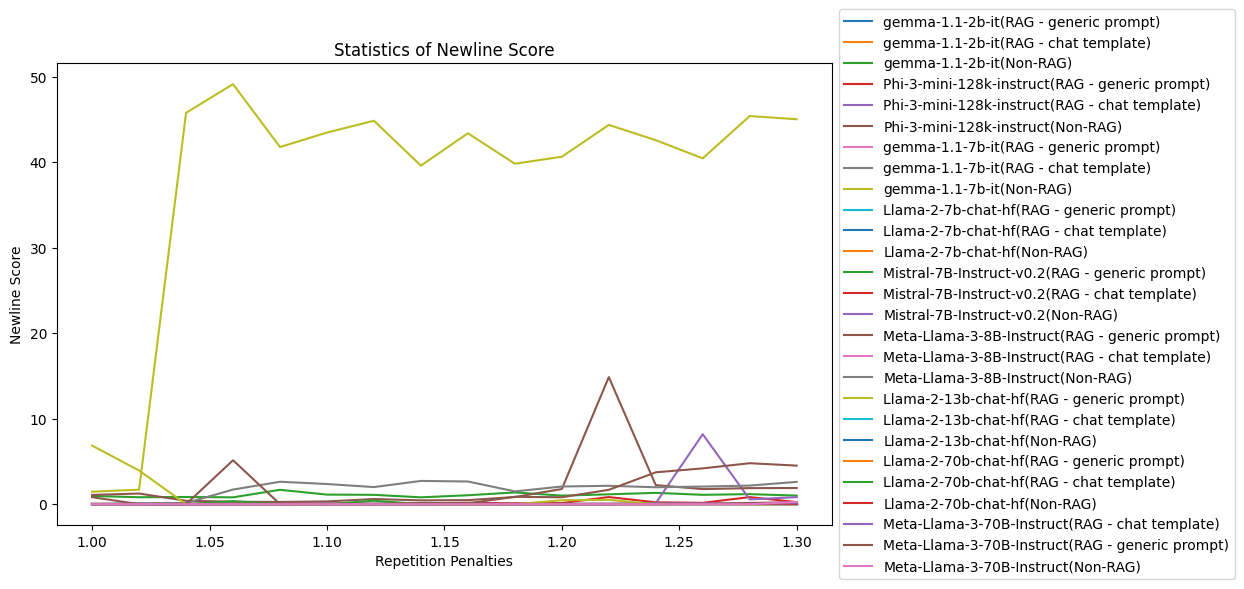

In [8]:
# draw the plot for mean, std, max, min of newline_score for all items in dfs
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the statistics
plt.figure(figsize=(10, 6))

for model in result.keys():
    print(f"model: {model}")
    df = result[model]["df_overall"]
    repetition_panelties = [
        repetition_penalty for repetition_penalty in df["repetition_penalty"]
    ]

    # Calculate the statistics
    mean_score = [
        df["newline_score"].mean() for df in result[model]["df_list_repetition_penalty"]
    ]
    if len(mean_score) != len(repetition_panelties):
        print(
            f"model: {model} has different length of repetition penalties and mean score"
        )
        print("repetition_panelties:", len(repetition_panelties))
        print("mean_score:", len(mean_score))
        continue

    sns.lineplot(x=repetition_panelties, y=mean_score, label=model)

plt.xlabel("Repetition Penalties")
plt.ylabel("Newline Score")
plt.title("Statistics of Newline Score")
plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left")

# Set y-axis to logarithmic scale
# plt.yscale("log")

plt.show()

model: gemma-1.1-2b-it(RAG - generic prompt)
model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)
model: gemma-1.1-7b-it(RAG - generic prompt)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)
model: Llama-2-7b-chat-hf(RAG - generic prompt)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Mistral-7B-Instruct-v0.2(RAG - generic prompt)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)
model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - generic prompt)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non-RAG)
model: Llama-2-70b-chat-hf(RAG - generic prompt)
mo

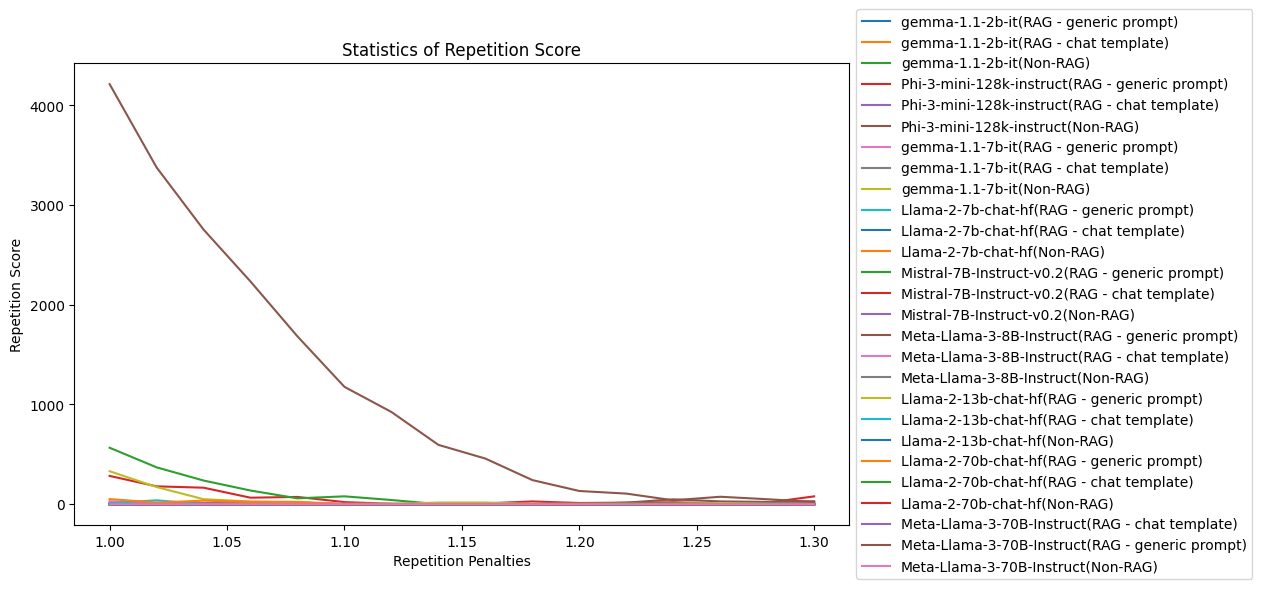

In [9]:
# draw the plot for mean, std, max, min of newline_score for all items in dfs
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the statistics
plt.figure(figsize=(10, 6))

for model in result.keys():
    print(f"model: {model}")
    df = result[model]["df_overall"]
    repetition_panelties = [
        repetition_penalty for repetition_penalty in df["repetition_penalty"]
    ]

    # Calculate the statistics
    mean_score = [
        df["repetition_score"].mean()
        for df in result[model]["df_list_repetition_penalty"]
    ]
    if len(mean_score) != len(repetition_panelties):
        print(
            f"model: {model} has different length of repetition penalties and mean score"
        )
        print("repetition_panelties:", len(repetition_panelties))
        print("mean_score:", len(mean_score))
        continue

    sns.lineplot(x=repetition_panelties, y=mean_score, label=model)

plt.xlabel("Repetition Penalties")
plt.ylabel("Repetition Score")
plt.title("Statistics of Repetition Score")
plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left")

# Set y-axis to logarithmic scale
# plt.yscale("log")

plt.show()

In [10]:
import matplotlib.pyplot as plt


def plot_per_question_score_for_dataframe(
    df,
    column="repetition_score",
    title="Repetition Score (Model = gpt-3.5-turbo)",
    threshold=0,
    log_scale=False,
):
    reptition_df = df[df[column] > threshold]
    if len(reptition_df):
        reptition_df.plot(
            x="id",
            y=column,
            kind="scatter",
            rot=90,
            figsize=(10, 5),
            title=title,
            grid=True,
        )
        if log_scale:
            plt.yscale("log")

        plt.show()
    else:
        print(f"No repetition found for title: {title}")


def plot_per_question_score(
    result,
    model,
    repetition_penalty,
    column="repetition_score",
    title="Repetition Score",
    threshold=0,
    log_scale=False,
):
    df_overall = result[model]["df_overall"]
    filtered = df_overall[df_overall["repetition_penalty"] == repetition_penalty]
    if len(filtered) == 0:
        print(
            f"No data found for model: {model}, repetition_penalty: {repetition_penalty}"
        )
        return
    index = filtered.index[0]
    print(f"index: {index}")
    df = result[model]["df_list_repetition_penalty"][index]
    plot_per_question_score_for_dataframe(
        df,
        column=column,
        title=f"{title} (Model = {model}, Repetition Penalty = {repetition_penalty:.3f})",
        threshold=threshold,
        log_scale=log_scale,
    )

In [11]:
def plot_per_question_score_for_model_group(result, model_group, rps):
    for repetition_penalty in rps:
        for model in result.keys():
            if model_group in model.lower():
                plot_per_question_score(result, model, repetition_penalty)

index: 0


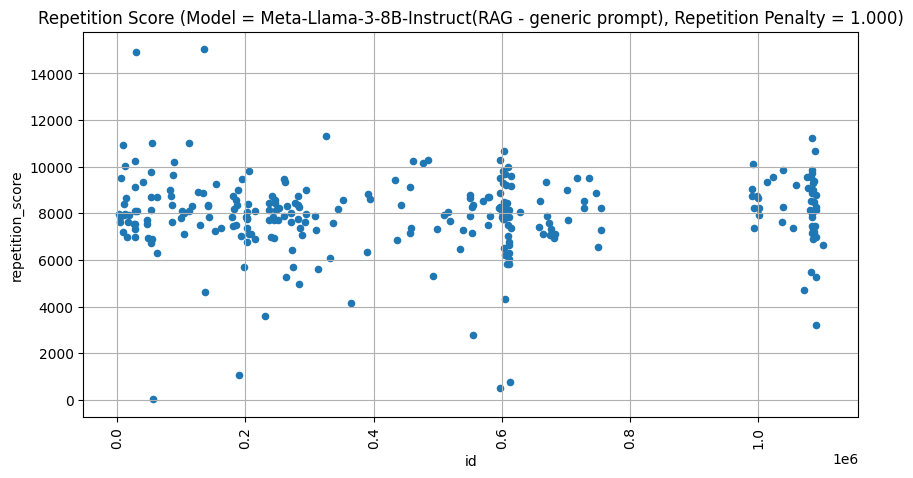

index: 0


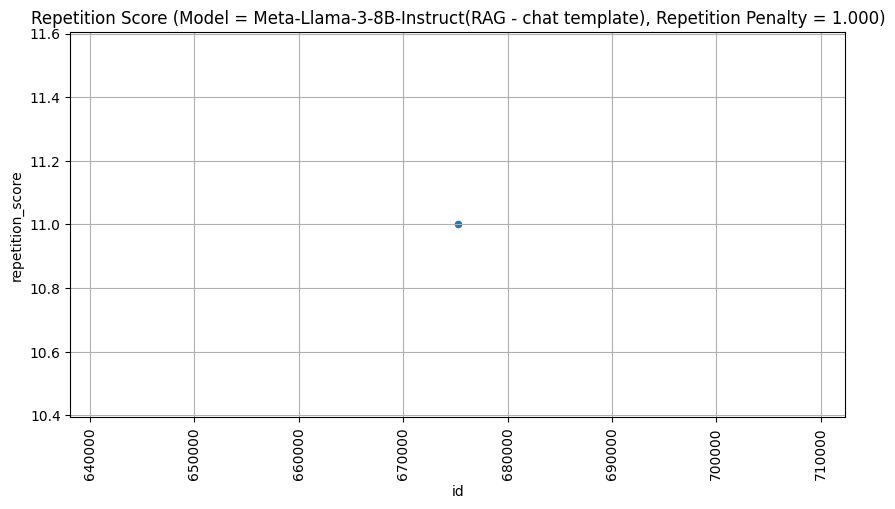

index: 0


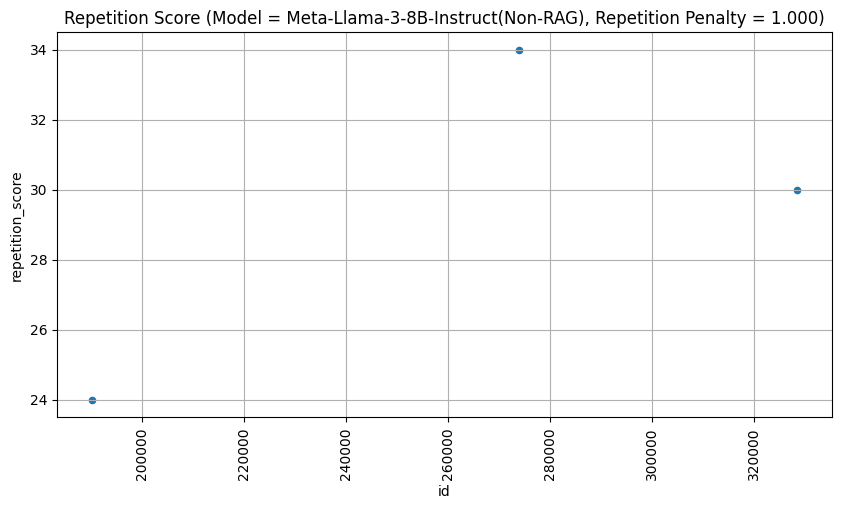

index: 0


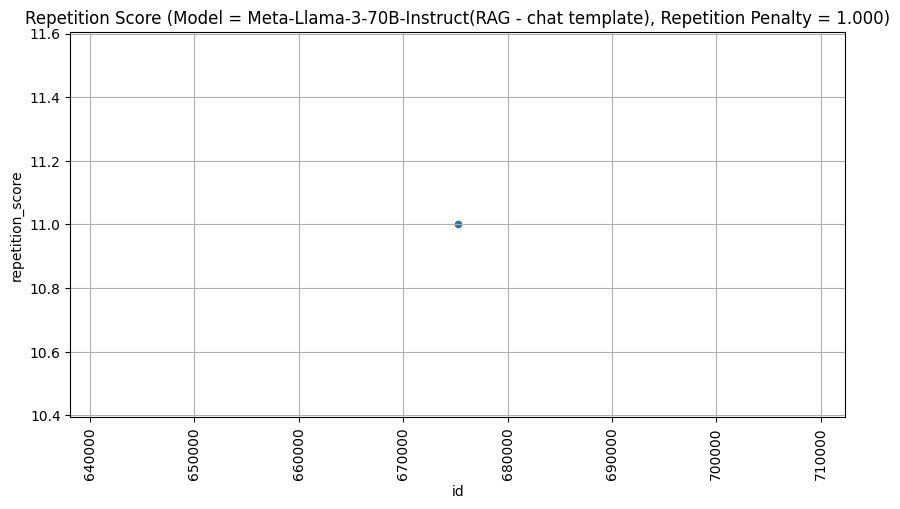

index: 0
No repetition found for title: Repetition Score (Model = Meta-Llama-3-70B-Instruct(RAG - generic prompt), Repetition Penalty = 1.000)
index: 0
No repetition found for title: Repetition Score (Model = Meta-Llama-3-70B-Instruct(Non-RAG), Repetition Penalty = 1.000)
index: 5


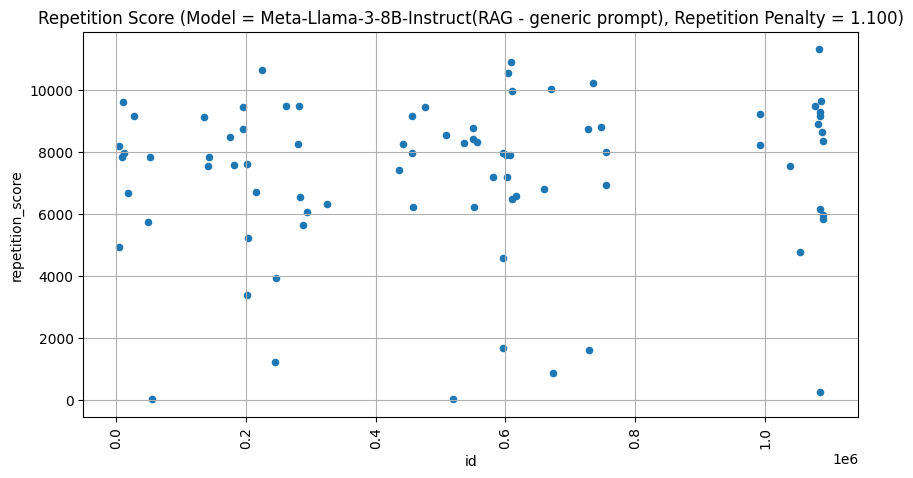

index: 5


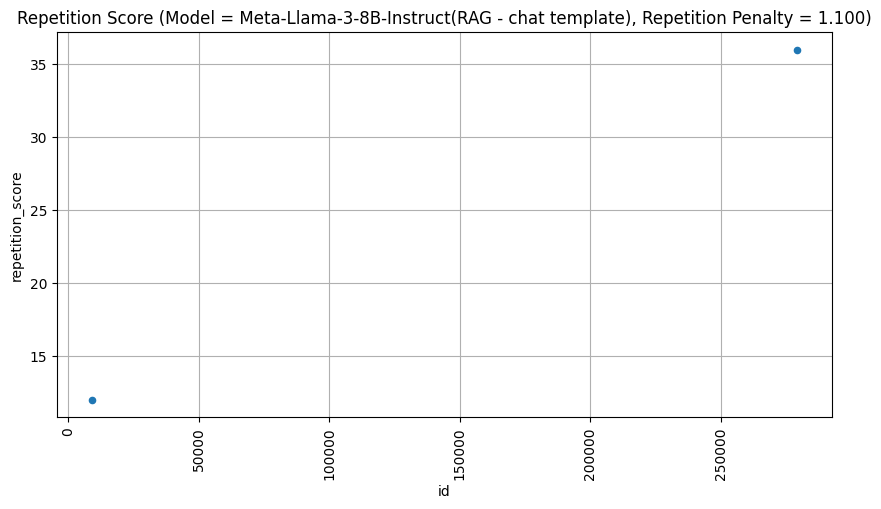

index: 5


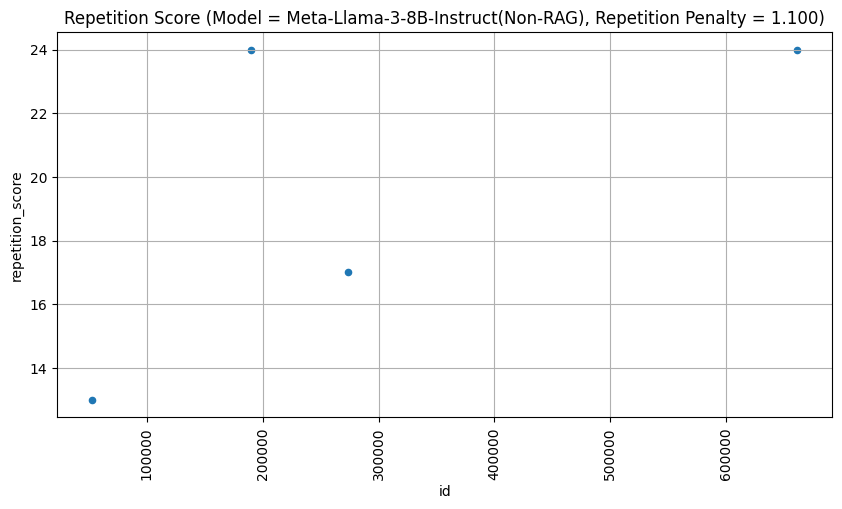

index: 5
No repetition found for title: Repetition Score (Model = Meta-Llama-3-70B-Instruct(RAG - chat template), Repetition Penalty = 1.100)
index: 5


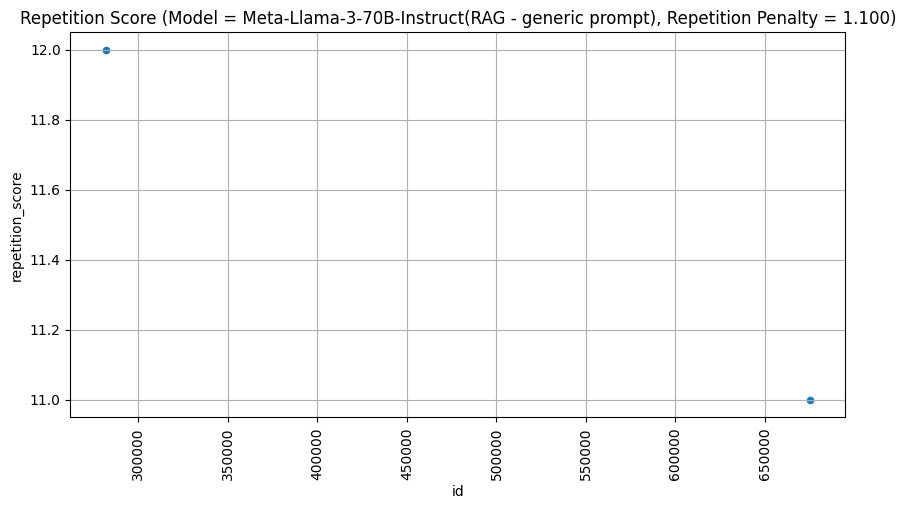

index: 5


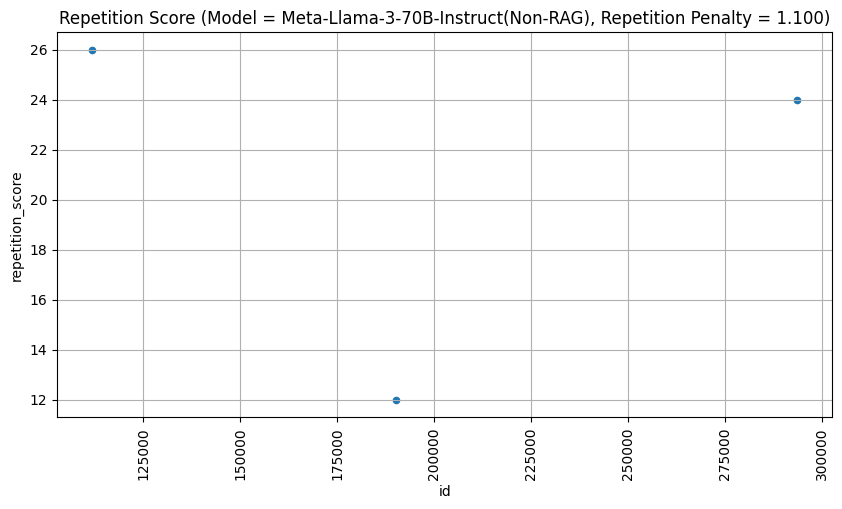

index: 8


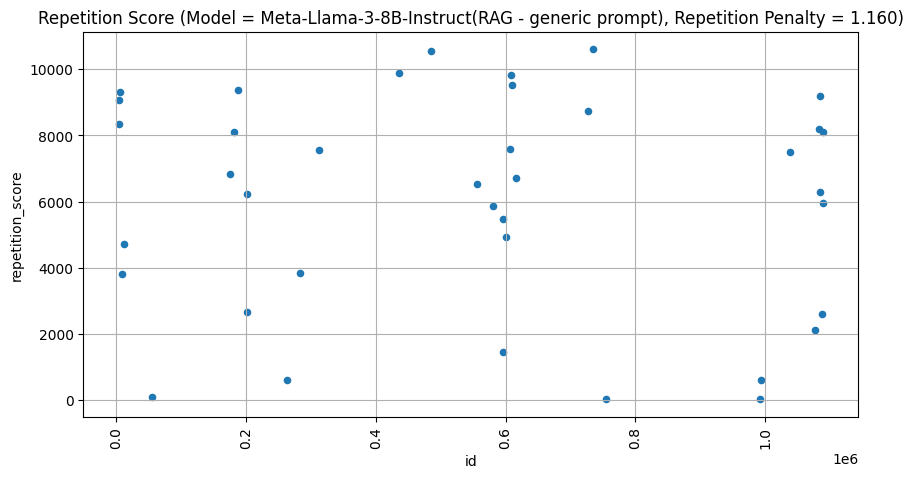

index: 8


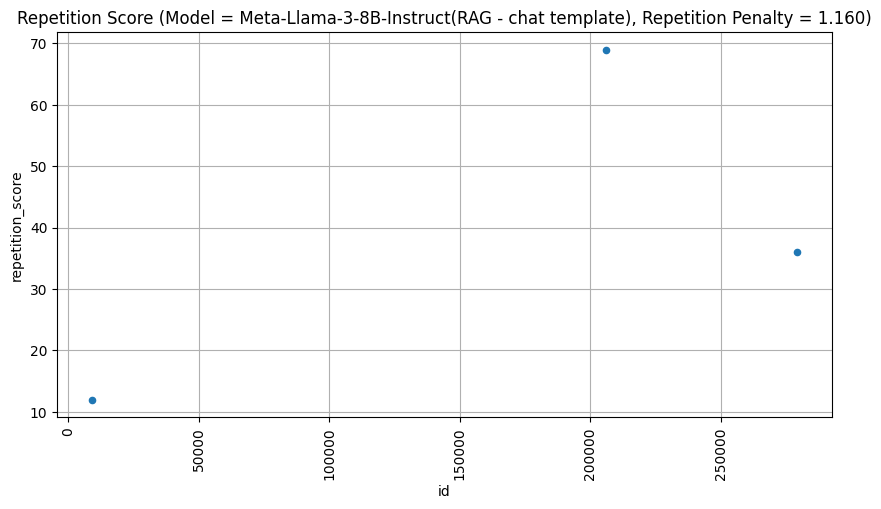

index: 8


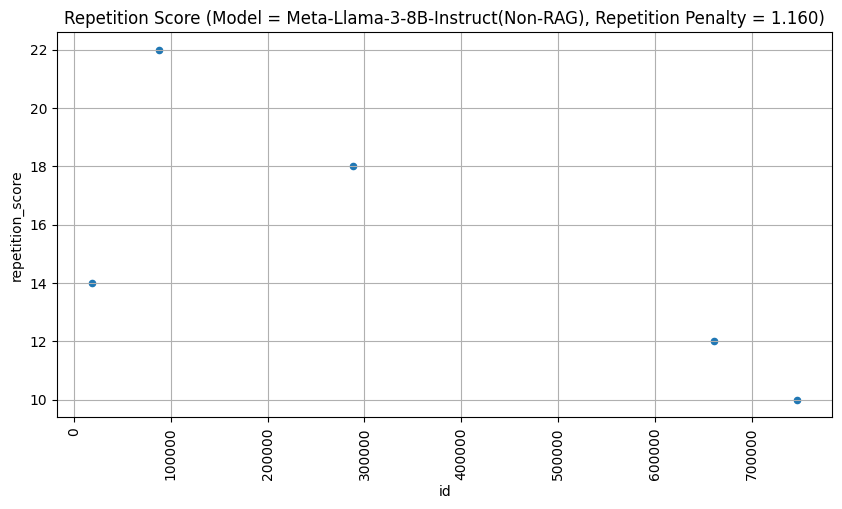

index: 8


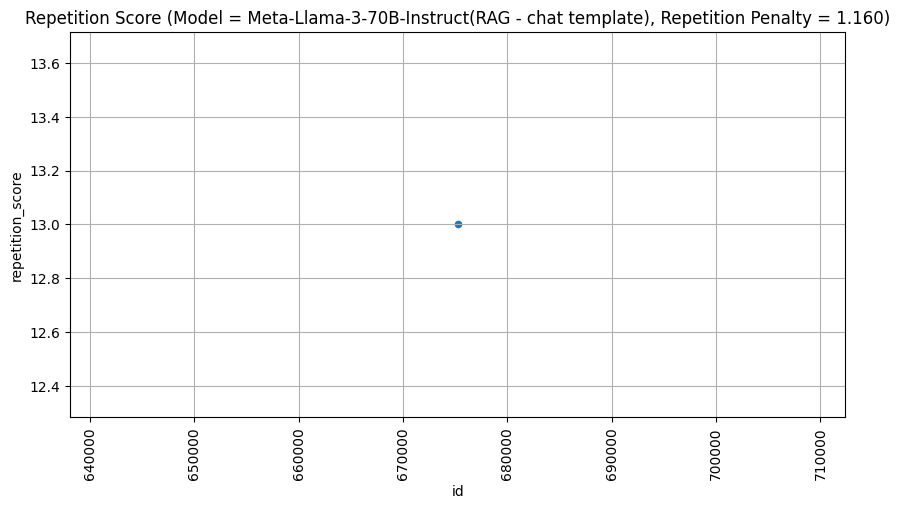

index: 8


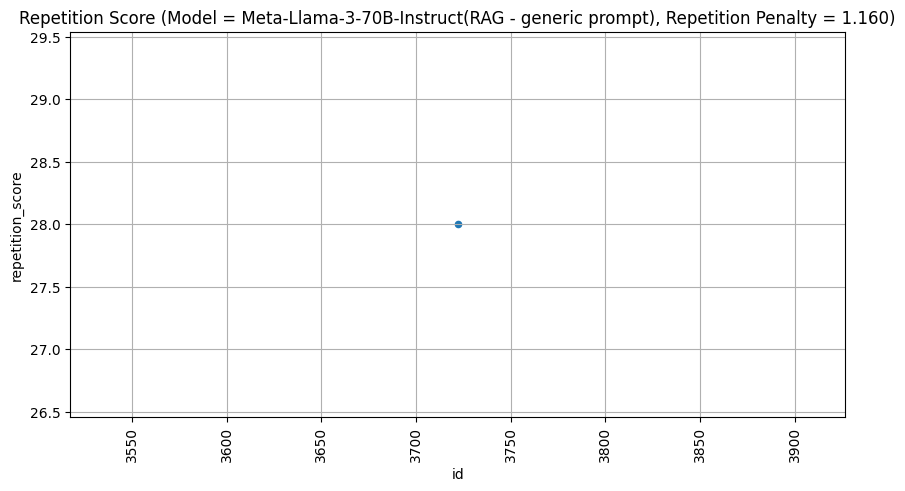

index: 8


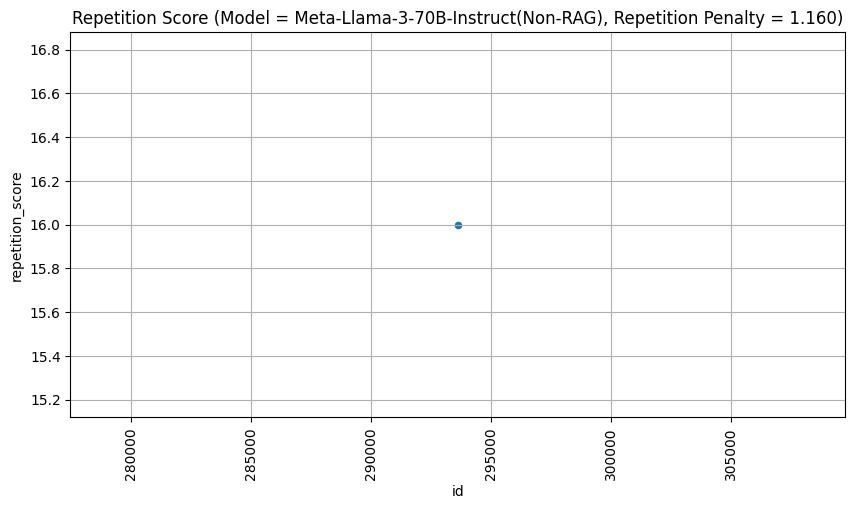

index: 15


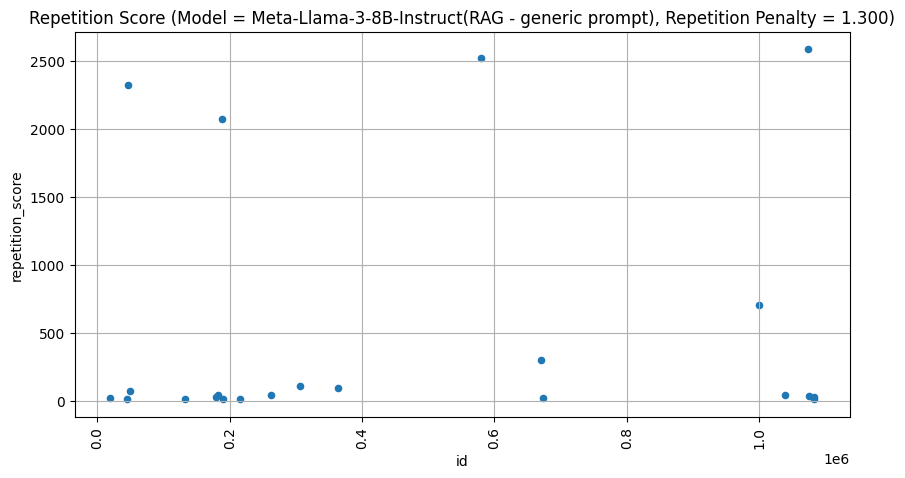

index: 15


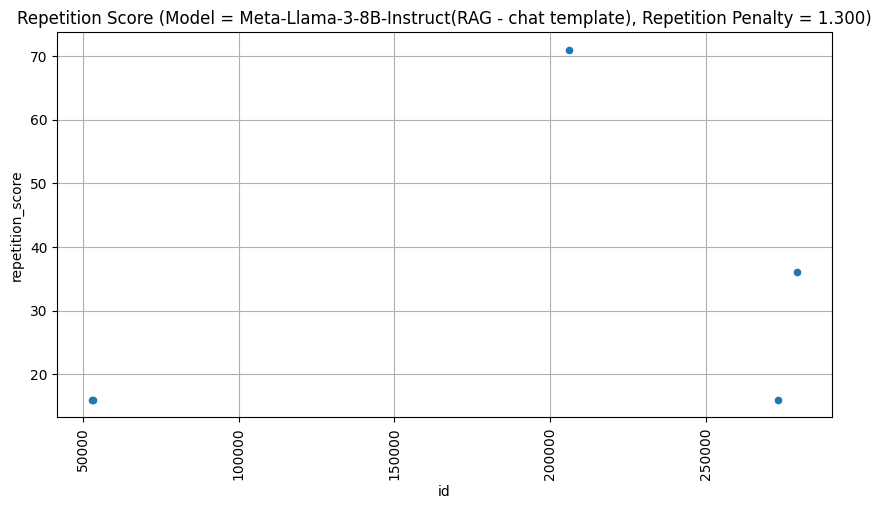

index: 15


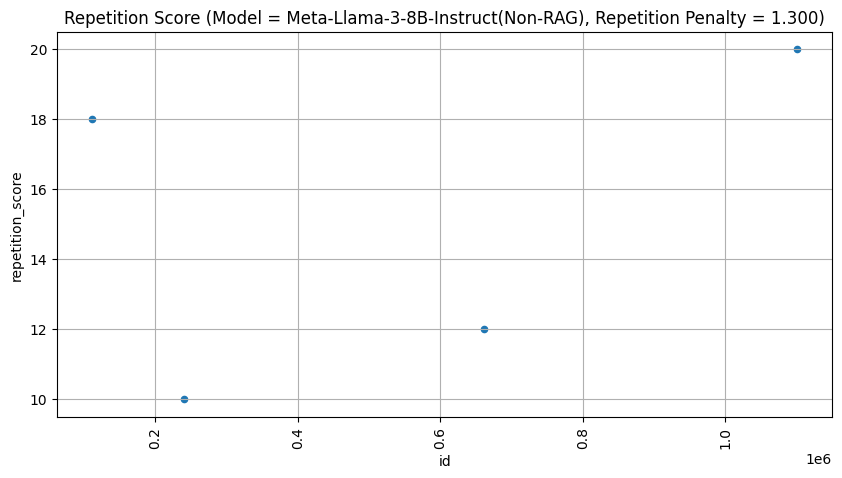

index: 15


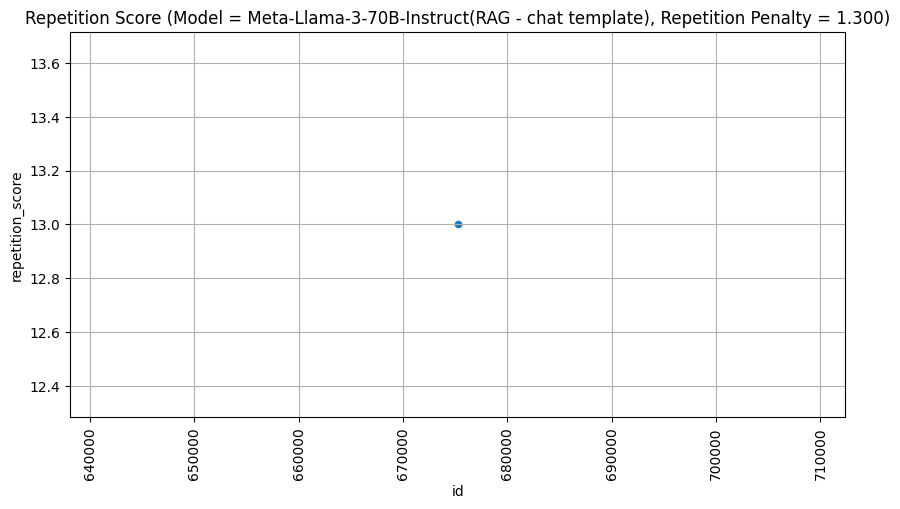

index: 15


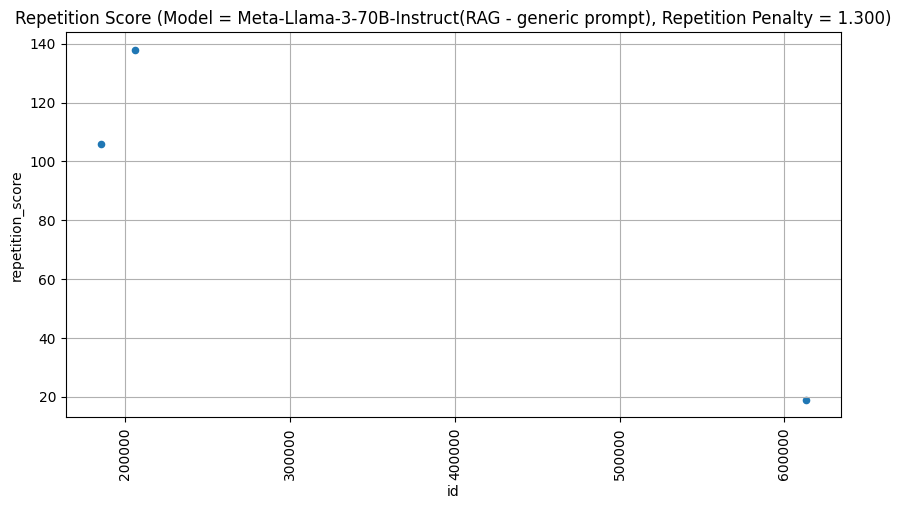

index: 15


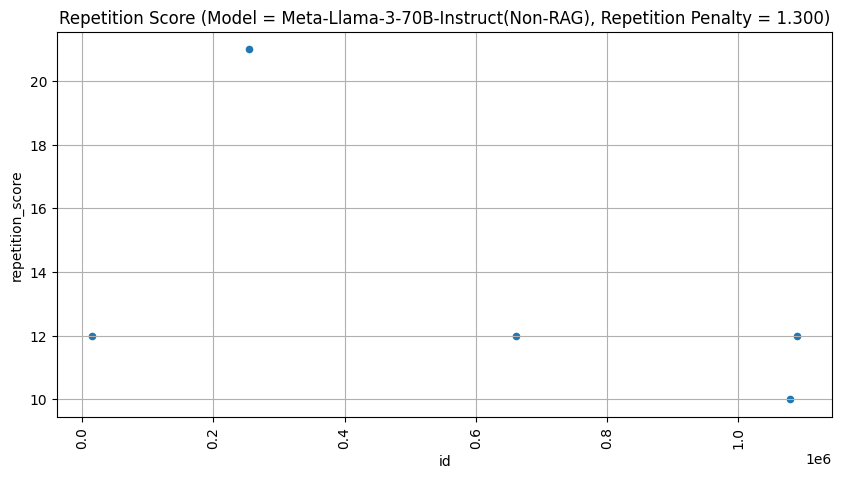

In [12]:
rps = [1, 1.1, 1.16, 1.3]

plot_per_question_score_for_model_group(result, "llama-3", rps)

In [13]:
rows = result["Meta-Llama-3-8B-Instruct(RAG - generic prompt)"][
    "df_list_repetition_penalty"
][-1].query("repetition_score > 2500")
rows

id                                  question  \
212  1074175                 what is a drill in slalom   
418   579638  what book has a character named mr darcy   

                                                answer  word_count  \
212   A drill in slalom refers to any specific exer...        1656   
418   According to various sources, there is only o...        1950   

                                          ground_truth  newline_score  \
212       ['The ladder slalom is a plyometric drill.']              0   
418  ['Pride and Prejudice book has a character nam...              0   

     repetition_score  total_repetitions  
212              2588               2588  
418              2520               2520

In [14]:
row = rows.iloc[0]
print(row["id"], row["question"], "\n\n", row["answer"], end="\n\n")
print("detect_repetitions:", detect_repetitions(row["answer"], debug=True))

1074175 what is a drill in slalom 

  A drill in slalom refers to any specific exercise or activity used by ski racers to improve their performance in various aspects such as technical skill, physical fitness, mental preparation, etc. For example, some common drills in slalom might involve navigating obstacles like gates, cones, or hurdles while maintaining proper form and control over one’s movements. Other examples could include exercises focused on improving balance, flexibility, strength, endurance, reaction time, spatial awareness, visual processing, decision-making under pressure, risk management, tactical strategy, communication between teammates, emotional regulation during high-stress situations, self-awareness about personal strengths/weaknesses, adaptability when faced with unexpected challenges, resilience after setbacks/failure, teamwork coordination, situational problem-solving, strategic planning ahead of competitions, pre-performance routines, post-event analysis/debrie

index: 0


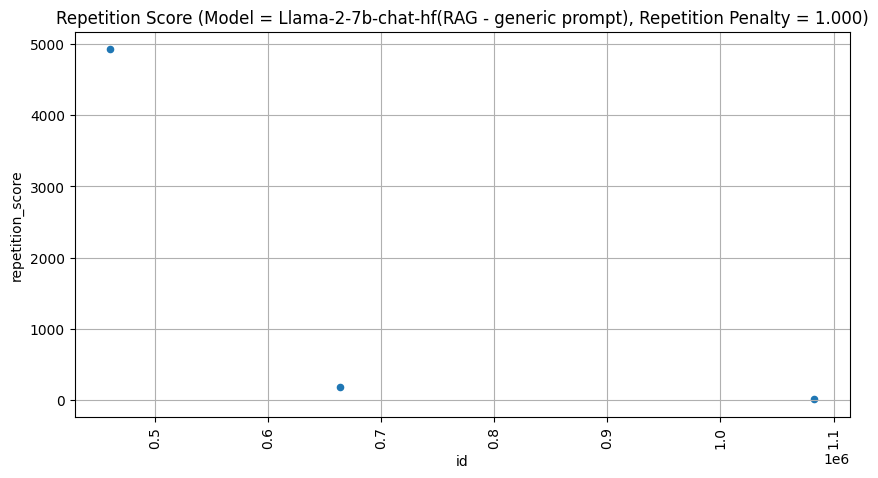

index: 0


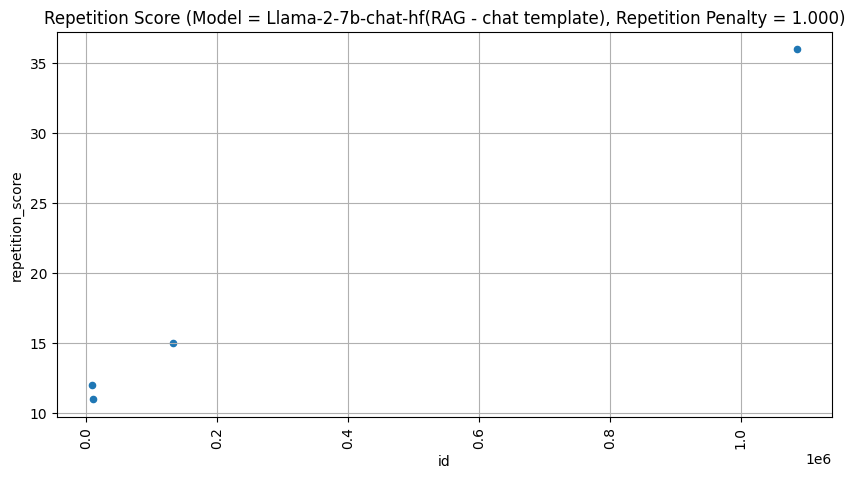

index: 0


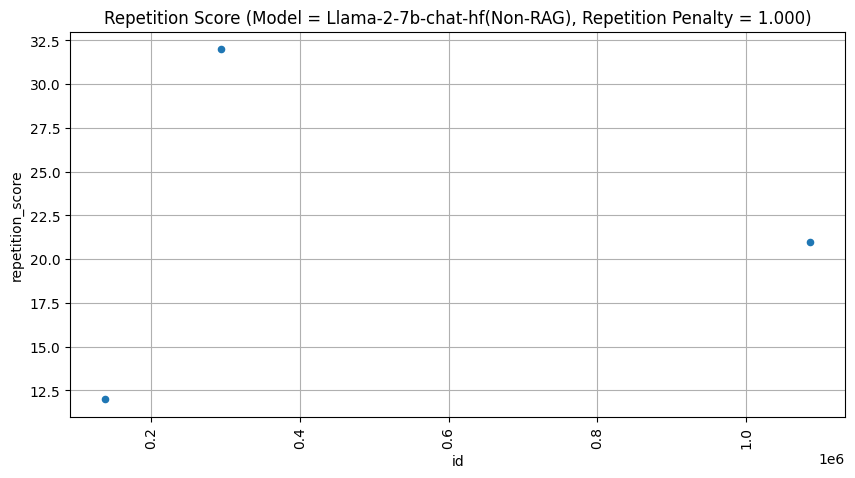

index: 0


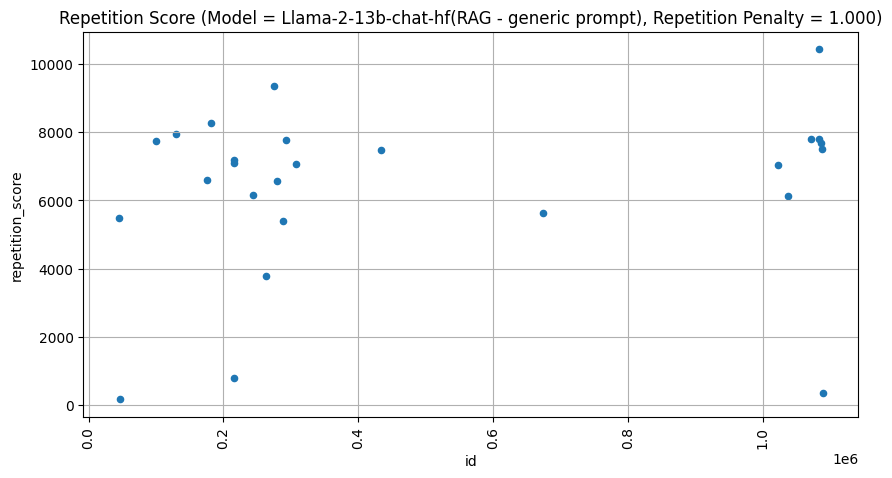

index: 0


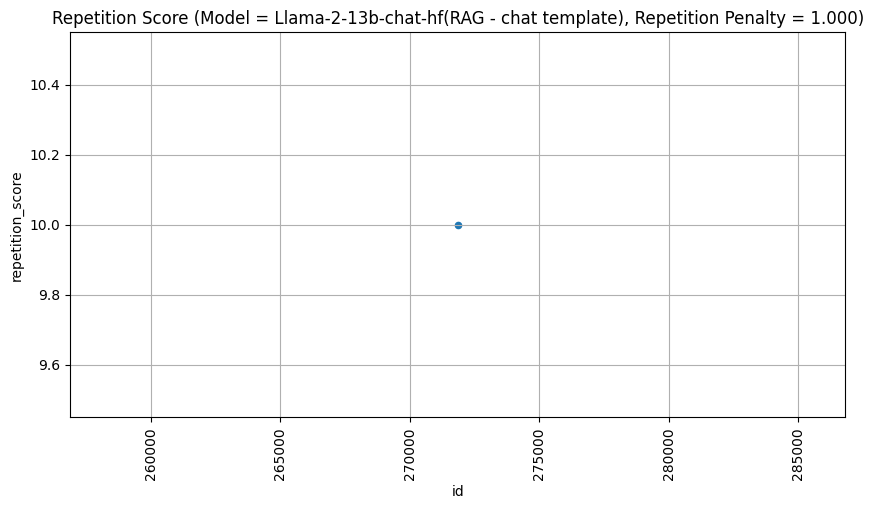

index: 0


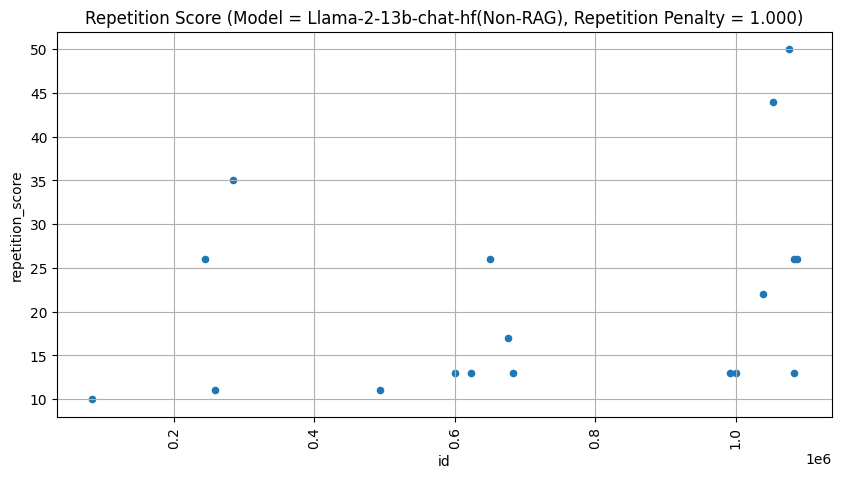

index: 0


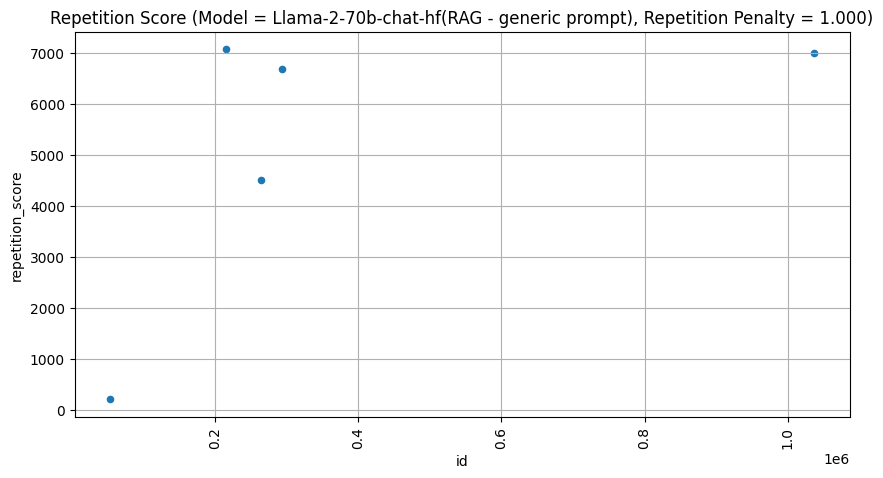

index: 0
No repetition found for title: Repetition Score (Model = Llama-2-70b-chat-hf(RAG - chat template), Repetition Penalty = 1.000)
index: 0


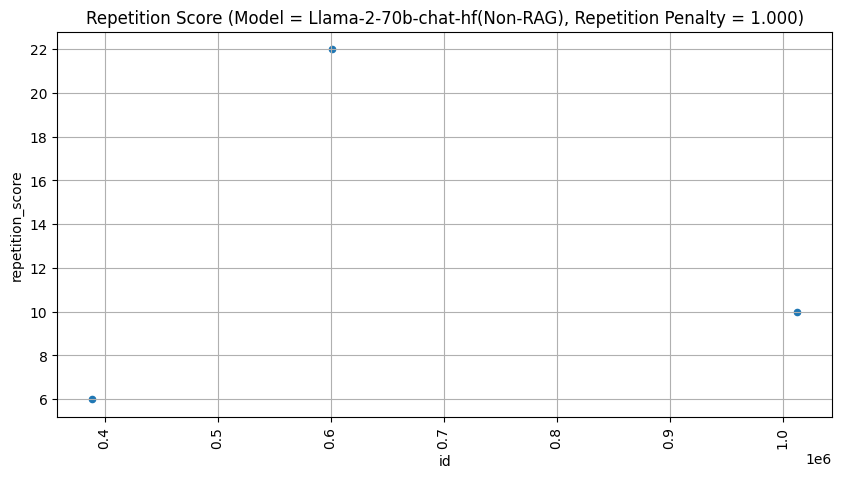

index: 5


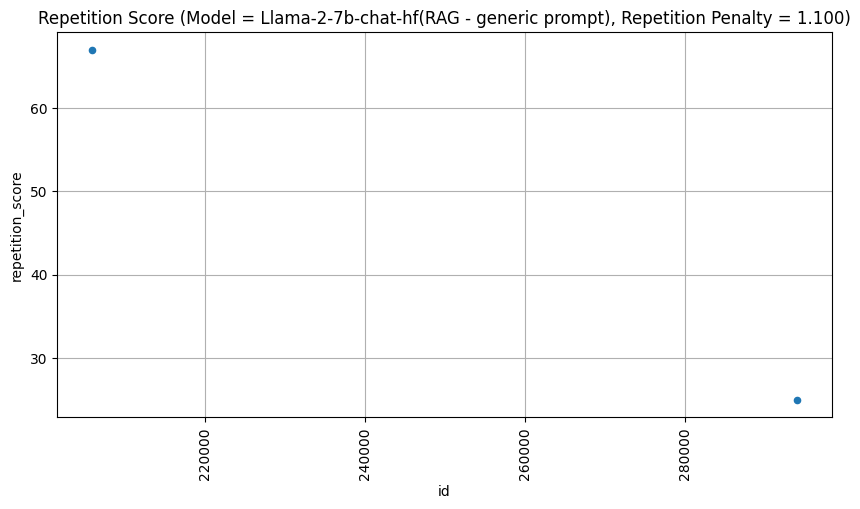

index: 5


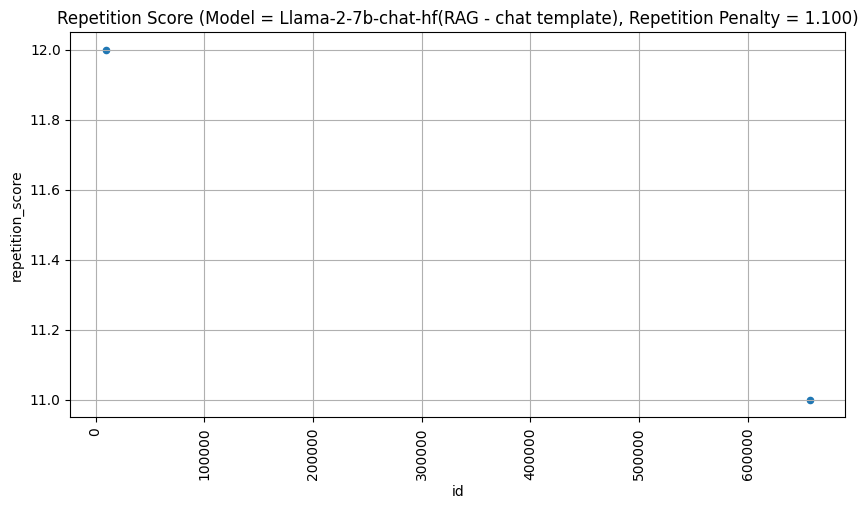

index: 5


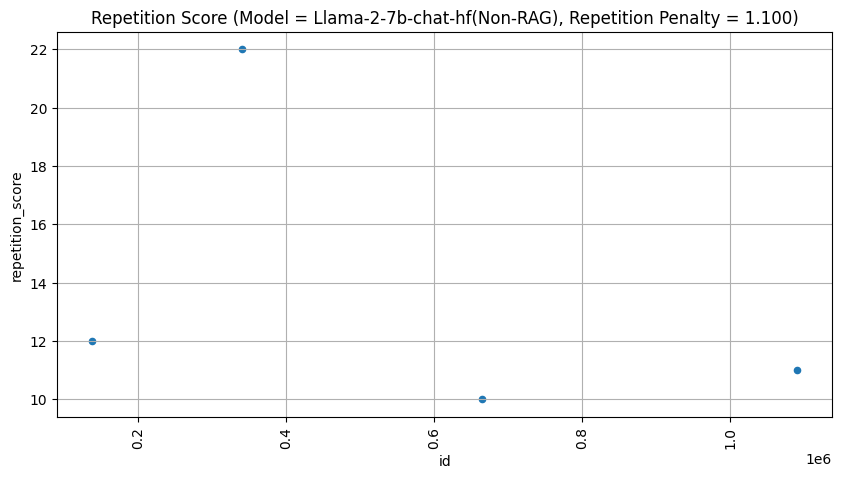

index: 5
No repetition found for title: Repetition Score (Model = Llama-2-13b-chat-hf(RAG - generic prompt), Repetition Penalty = 1.100)
index: 5


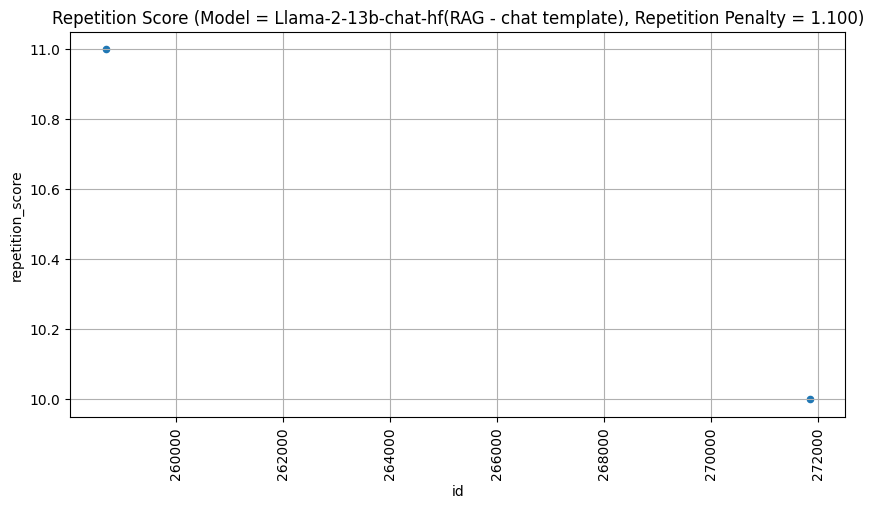

index: 5


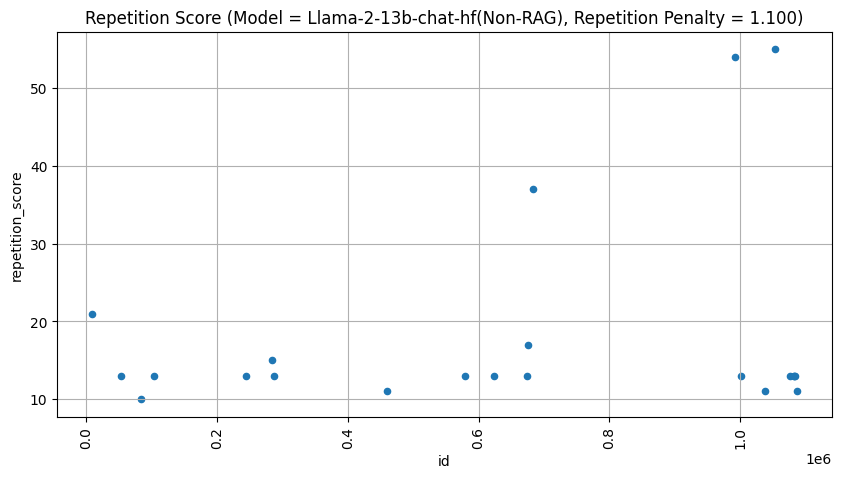

index: 5


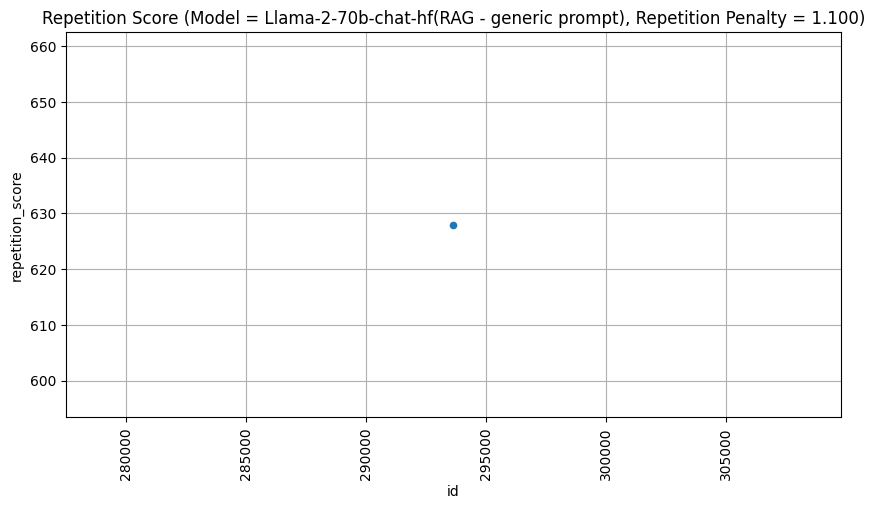

index: 5
No repetition found for title: Repetition Score (Model = Llama-2-70b-chat-hf(RAG - chat template), Repetition Penalty = 1.100)
index: 5


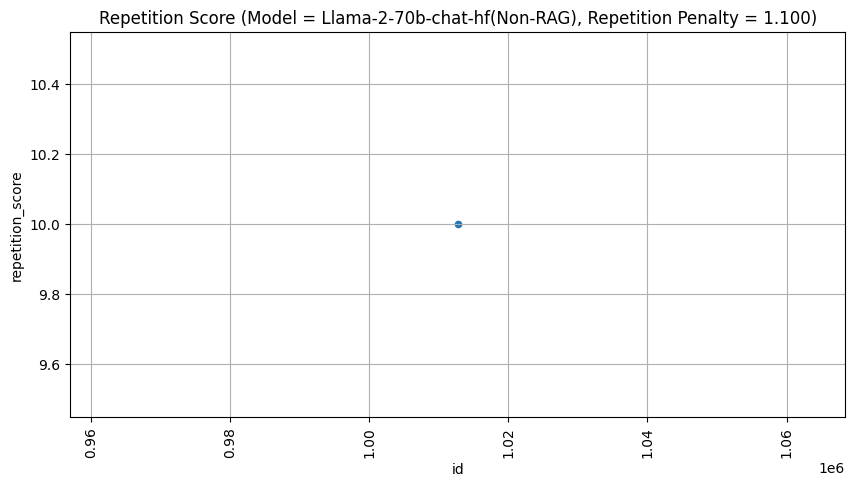

index: 8
No repetition found for title: Repetition Score (Model = Llama-2-7b-chat-hf(RAG - generic prompt), Repetition Penalty = 1.160)
index: 8


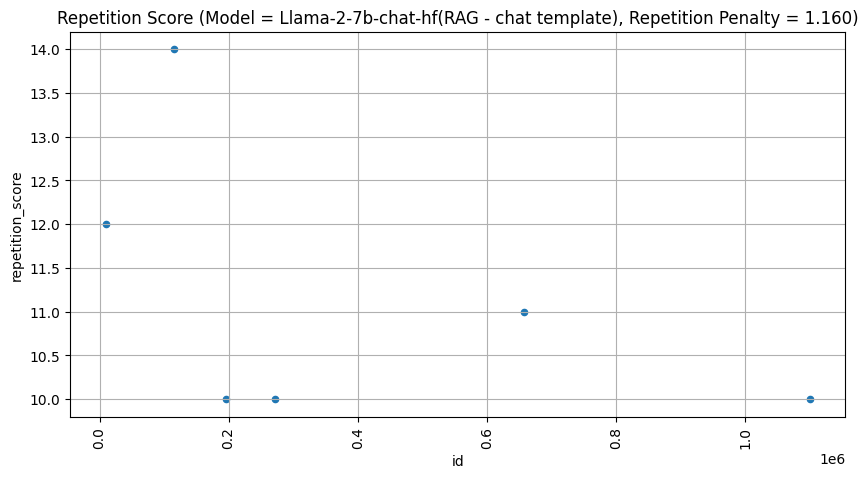

index: 8


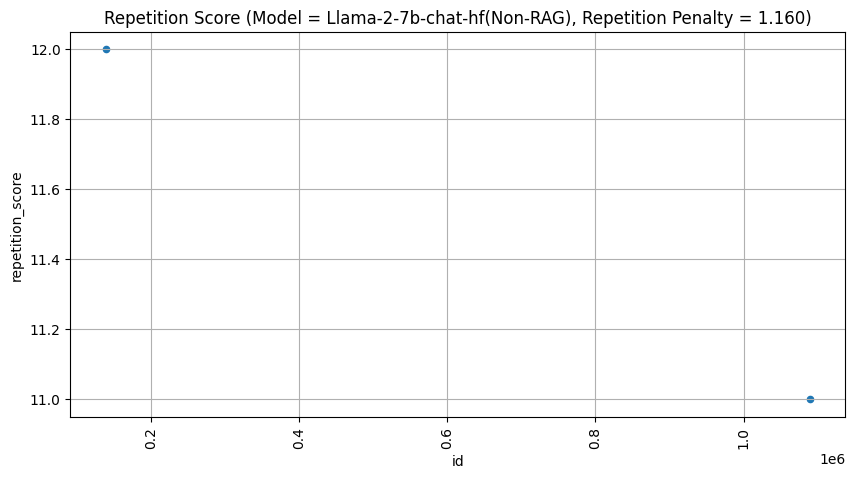

index: 8


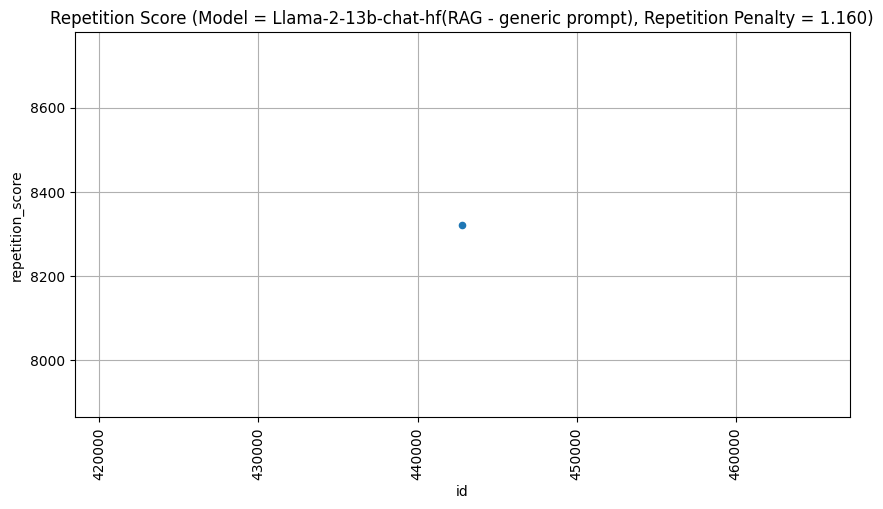

index: 8
No repetition found for title: Repetition Score (Model = Llama-2-13b-chat-hf(RAG - chat template), Repetition Penalty = 1.160)
index: 8


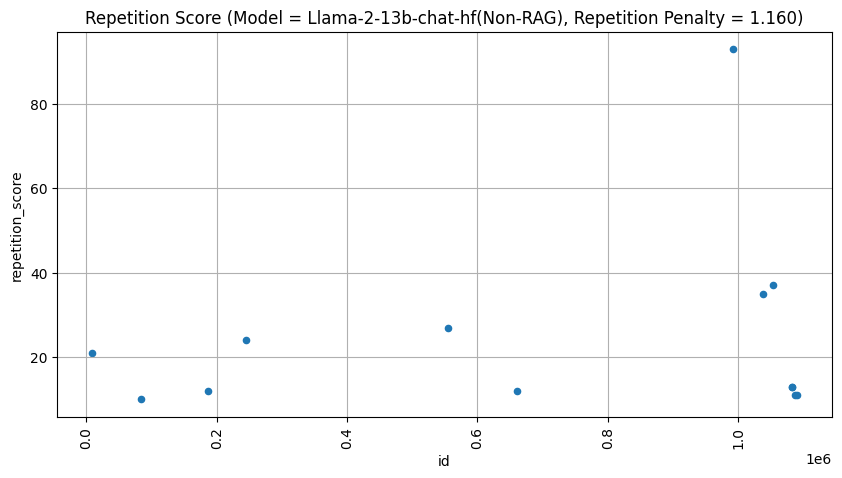

index: 8


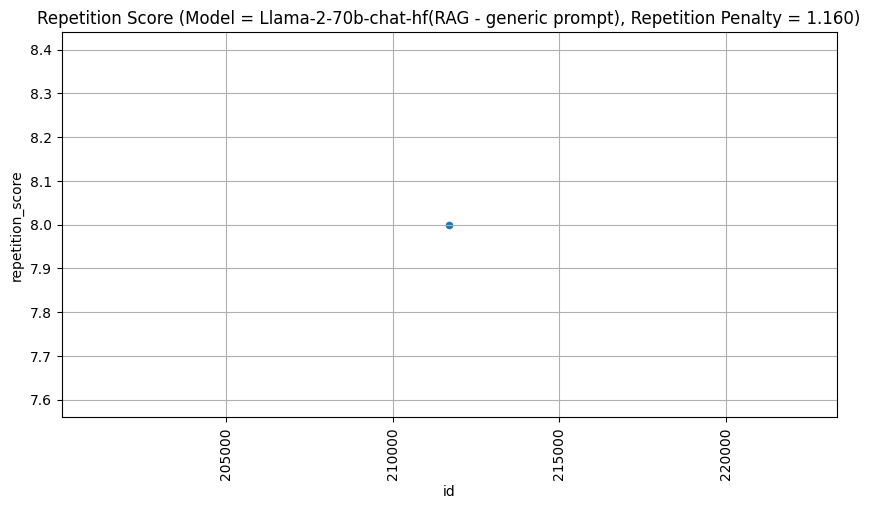

index: 8
No repetition found for title: Repetition Score (Model = Llama-2-70b-chat-hf(RAG - chat template), Repetition Penalty = 1.160)
index: 8


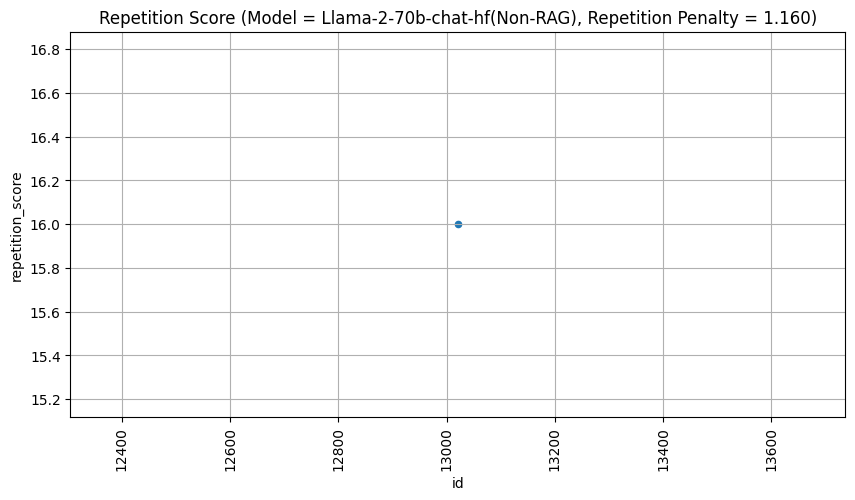

index: 15


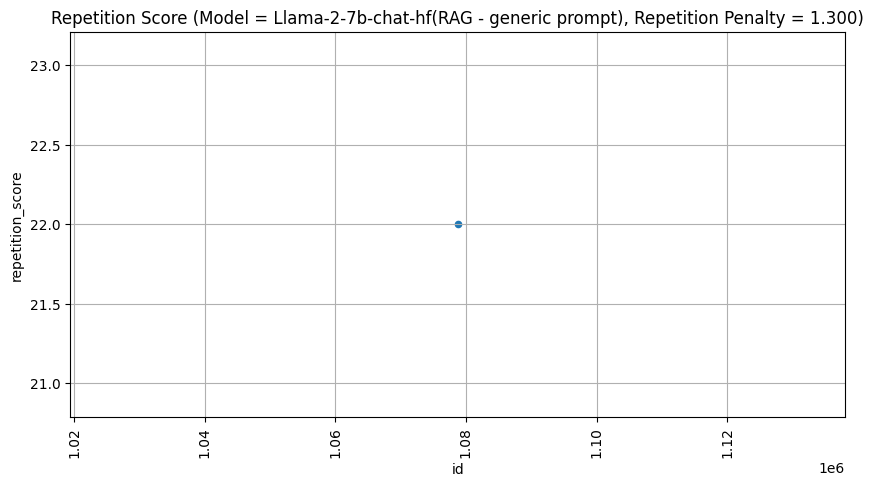

index: 15


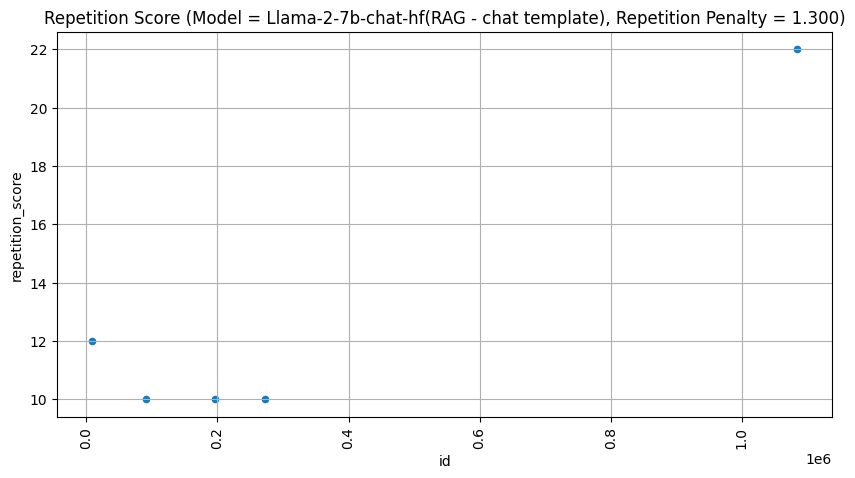

index: 15


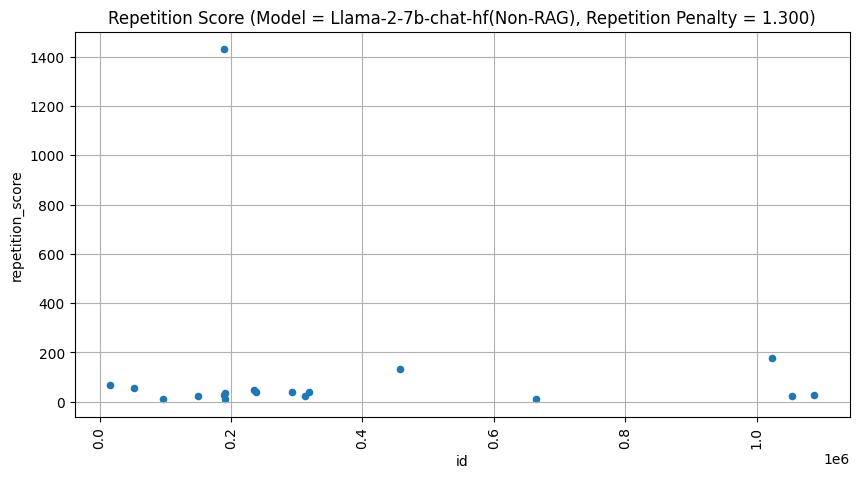

index: 15


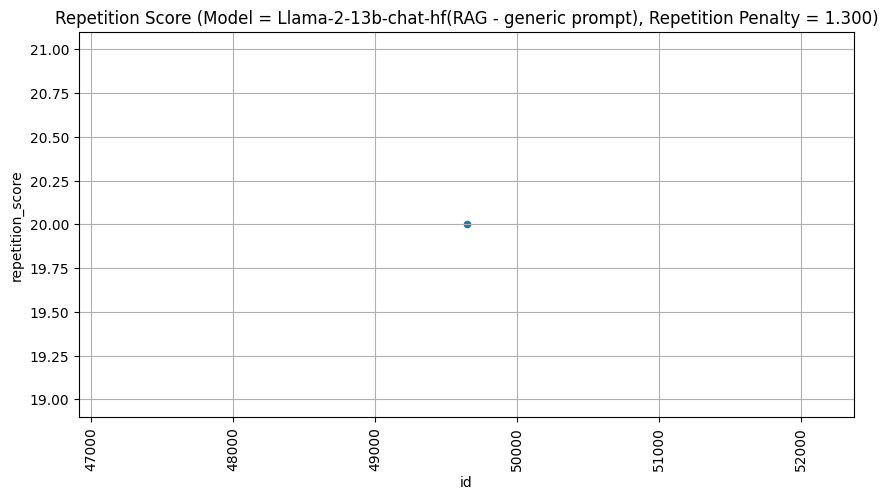

index: 15


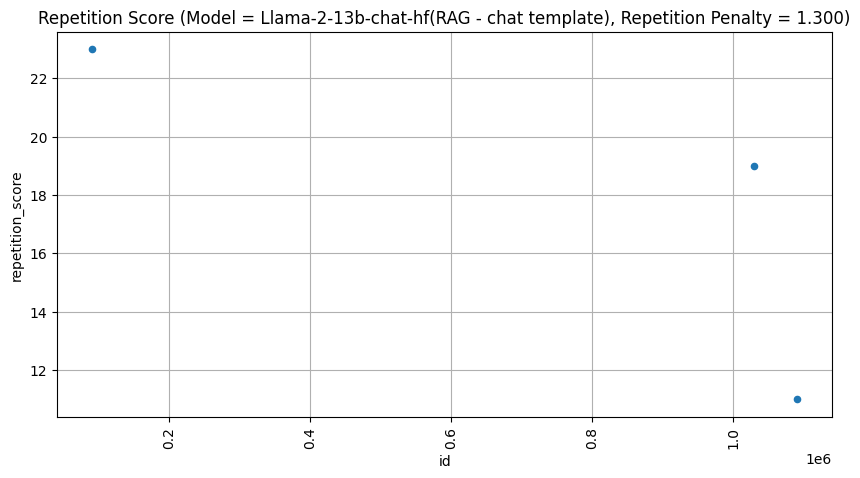

index: 15


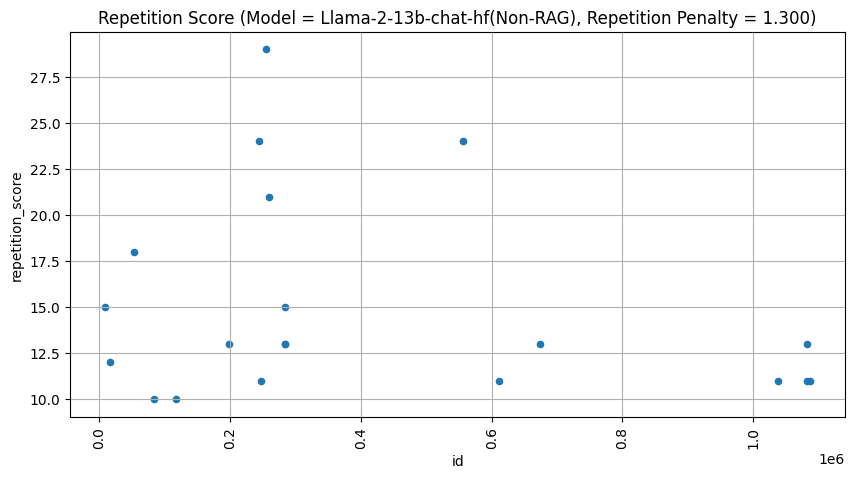

index: 15
No repetition found for title: Repetition Score (Model = Llama-2-70b-chat-hf(RAG - generic prompt), Repetition Penalty = 1.300)
index: 15
No repetition found for title: Repetition Score (Model = Llama-2-70b-chat-hf(RAG - chat template), Repetition Penalty = 1.300)
index: 15
No repetition found for title: Repetition Score (Model = Llama-2-70b-chat-hf(Non-RAG), Repetition Penalty = 1.300)


In [15]:
rps = [1, 1.1, 1.16, 1.3]

plot_per_question_score_for_model_group(result, "llama-2", rps)

index: 0


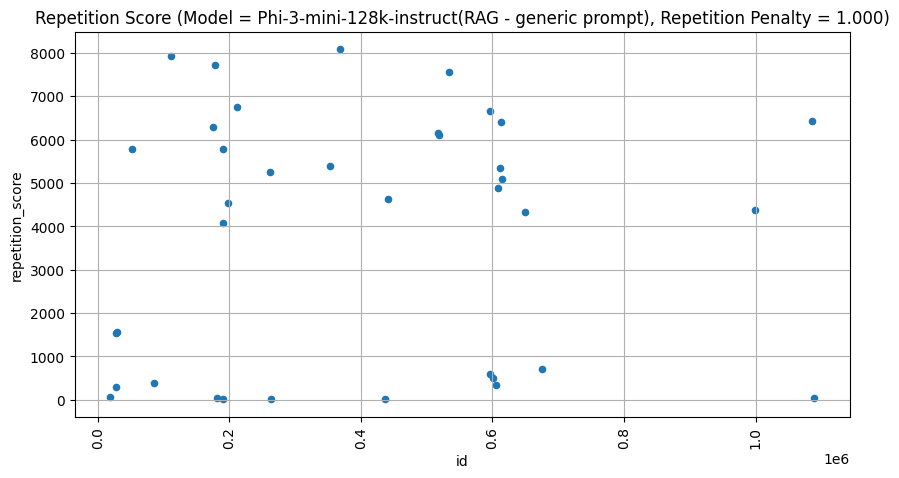

index: 0


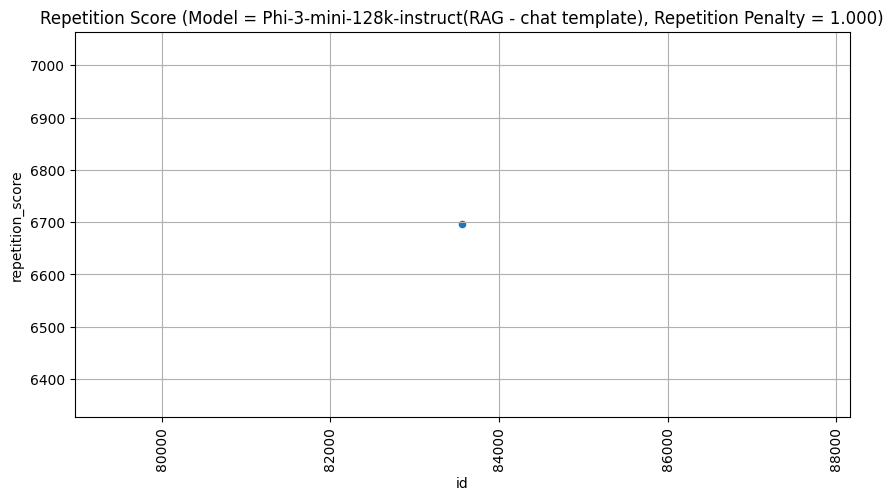

index: 0


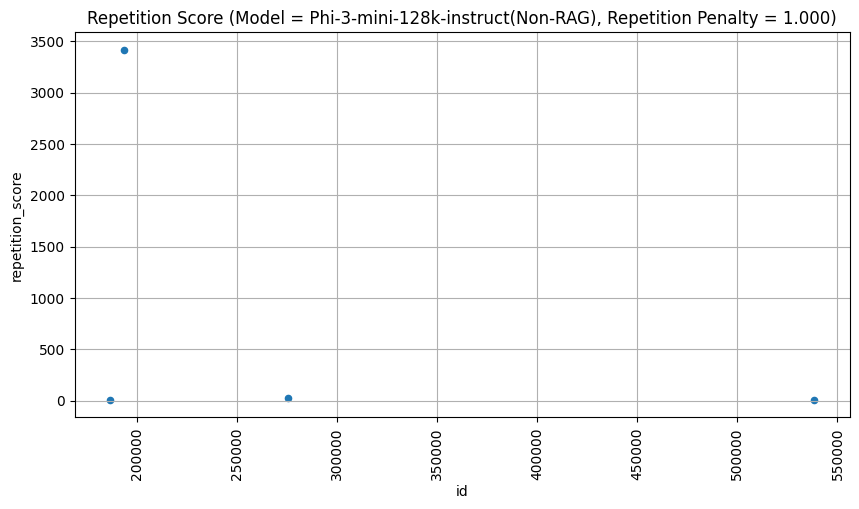

index: 5


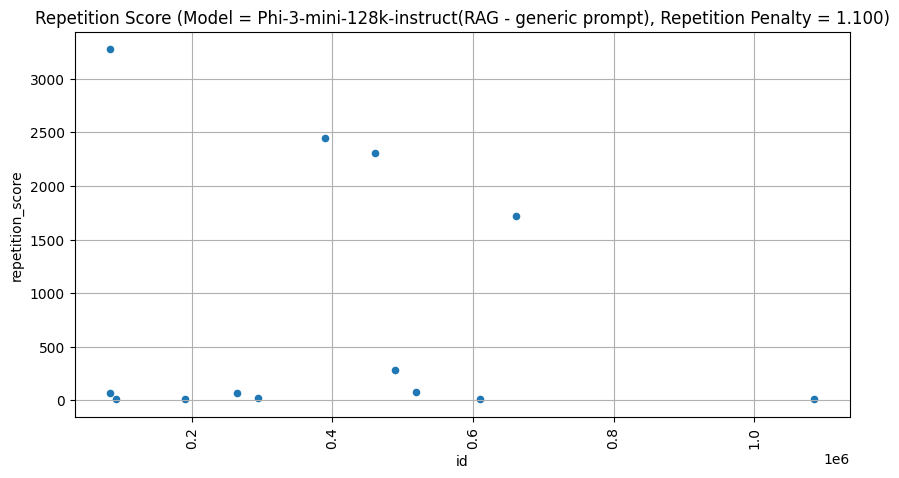

index: 5
No repetition found for title: Repetition Score (Model = Phi-3-mini-128k-instruct(RAG - chat template), Repetition Penalty = 1.100)
index: 5


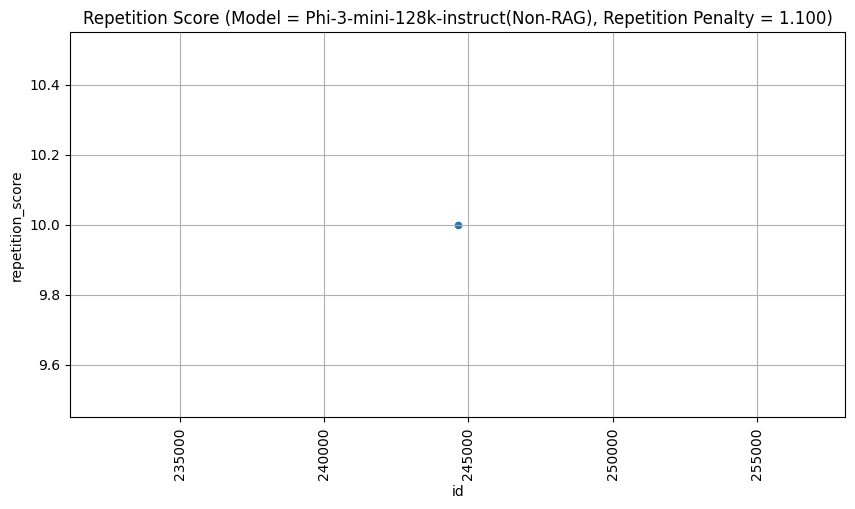

index: 8


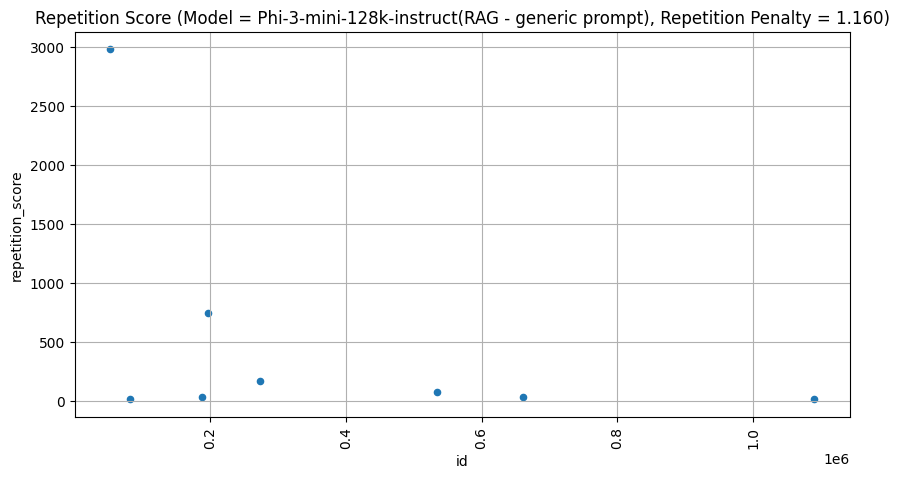

index: 8


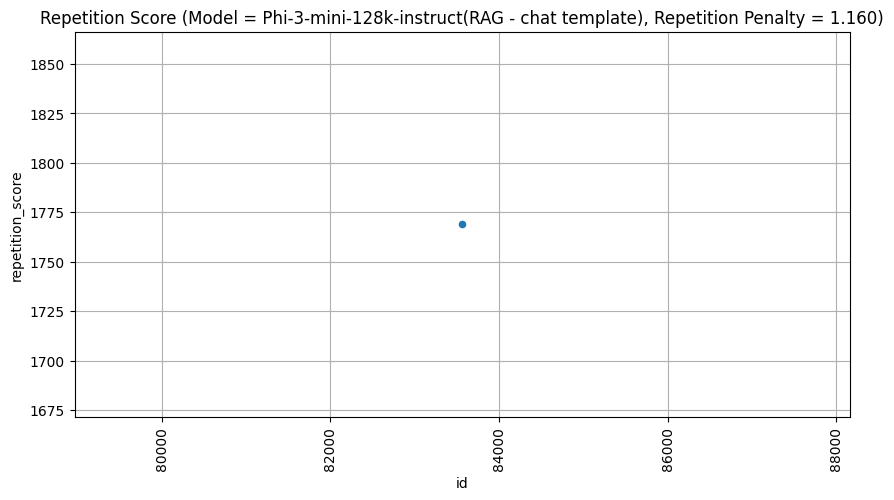

index: 8


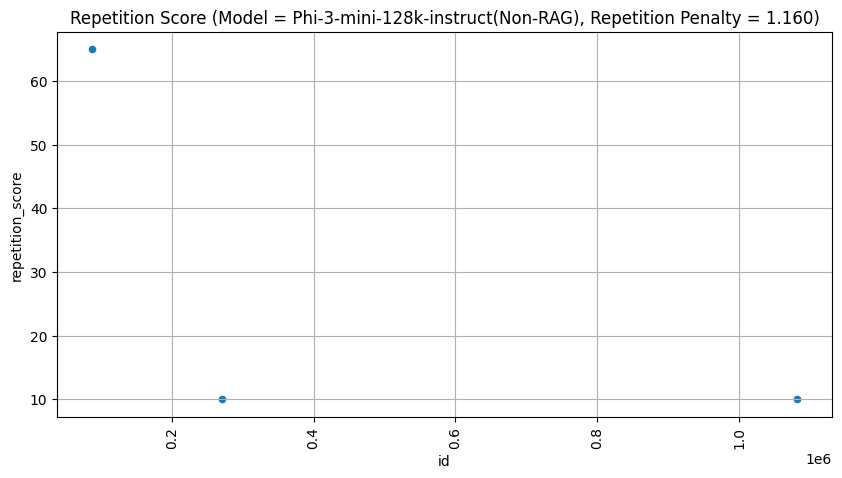

index: 15


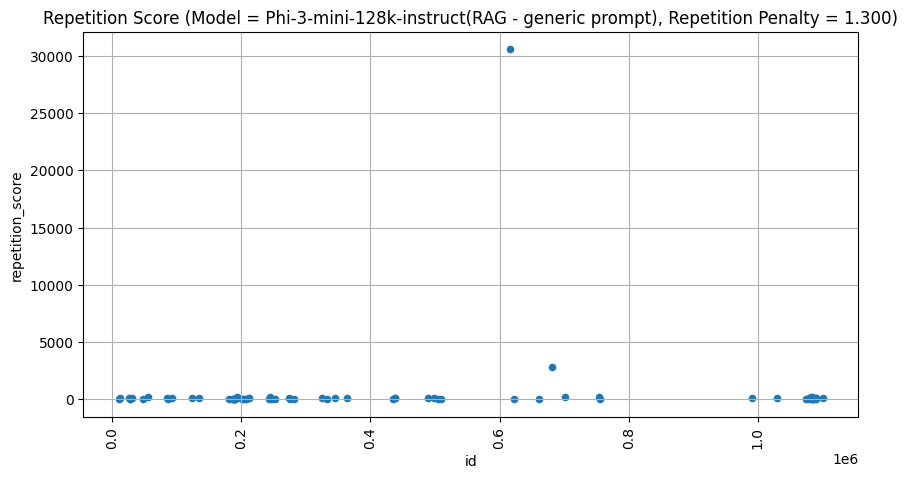

index: 15


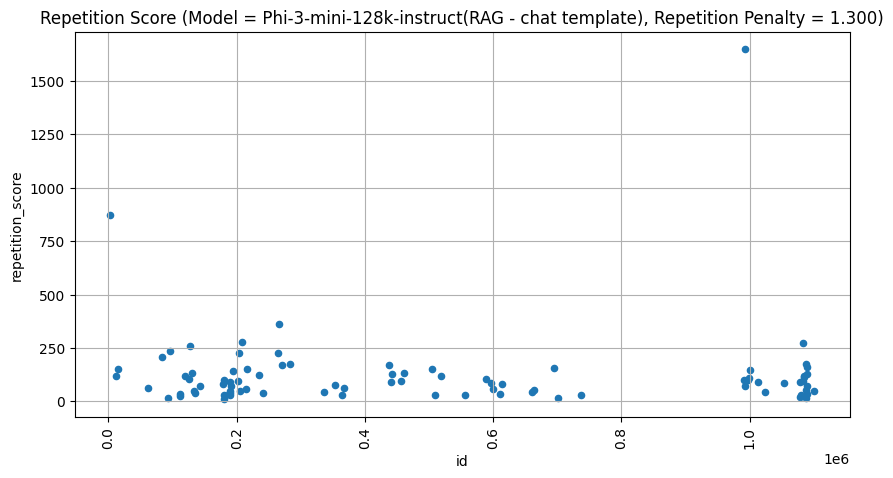

index: 15


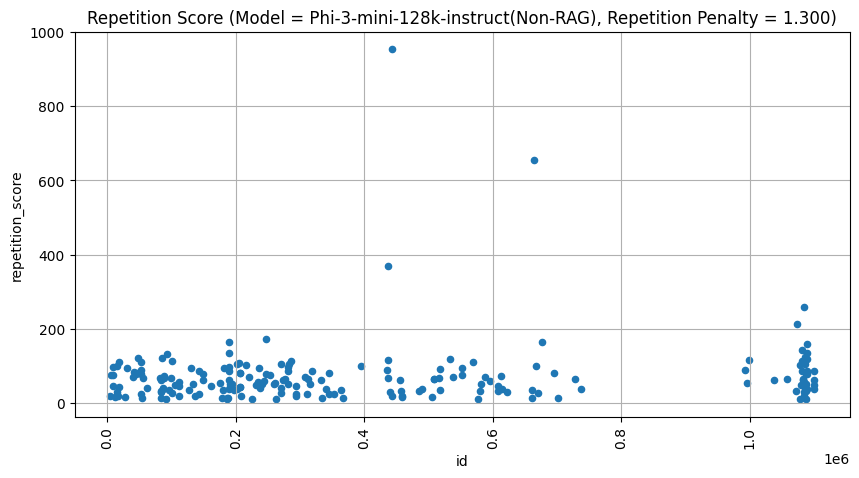

In [16]:
rps = [1, 1.1, 1.16, 1.3]

plot_per_question_score_for_model_group(result, "phi-3", rps)

index: 0


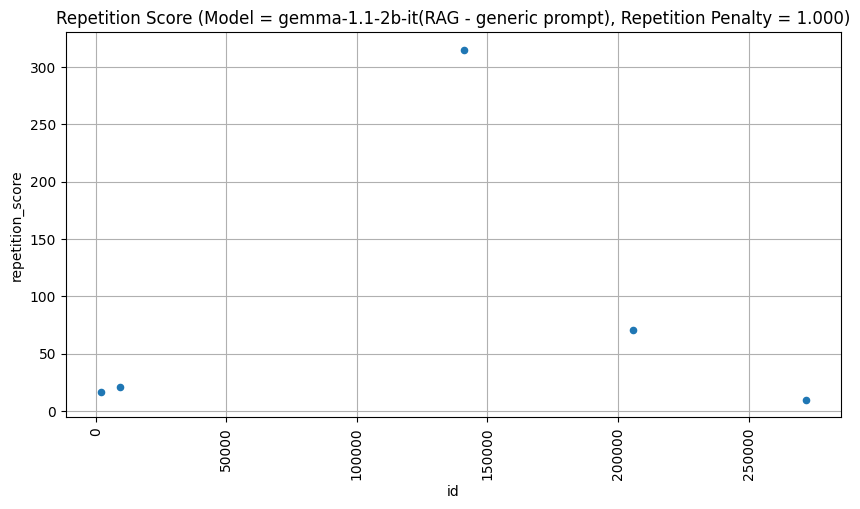

index: 0
No repetition found for title: Repetition Score (Model = gemma-1.1-2b-it(RAG - chat template), Repetition Penalty = 1.000)
index: 0


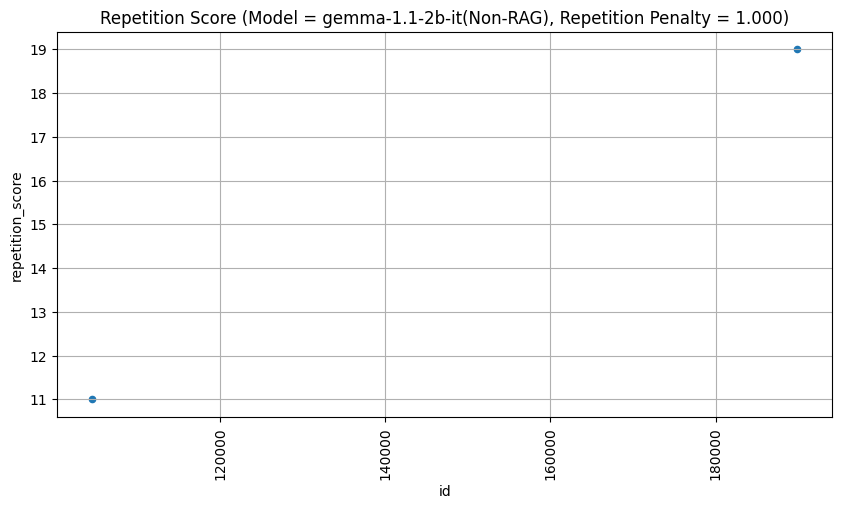

index: 0


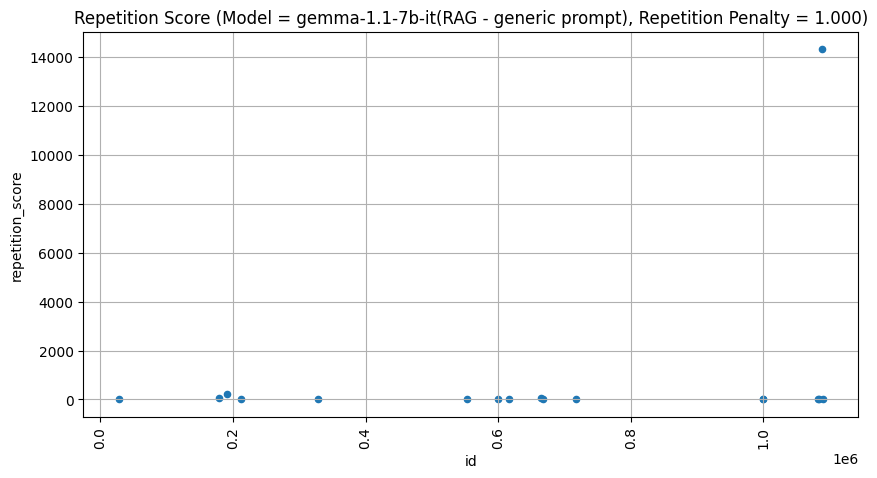

index: 0
No repetition found for title: Repetition Score (Model = gemma-1.1-7b-it(RAG - chat template), Repetition Penalty = 1.000)
index: 0


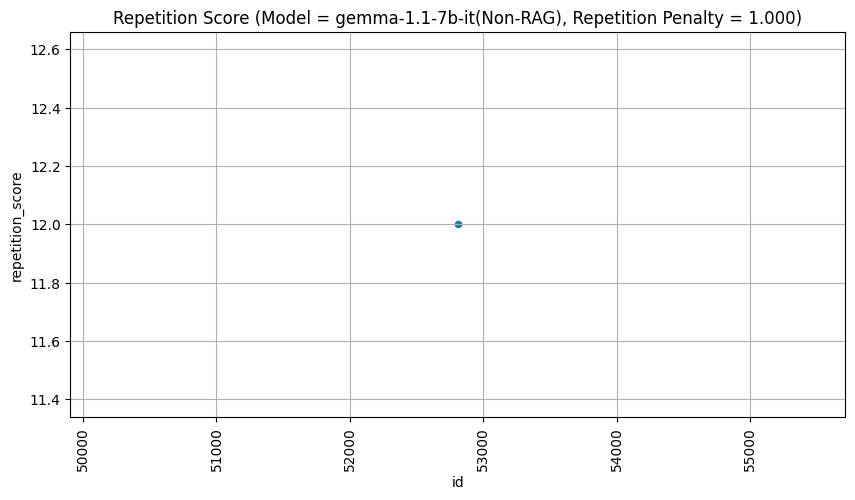

index: 5


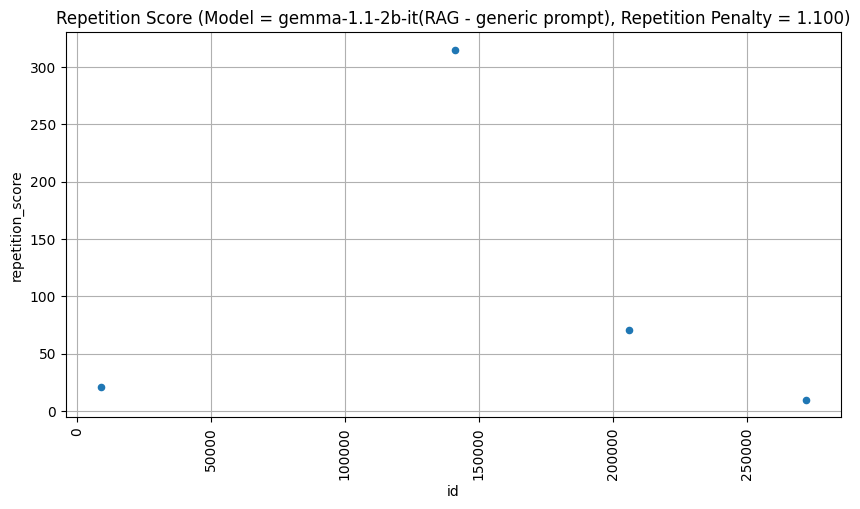

index: 5
No repetition found for title: Repetition Score (Model = gemma-1.1-2b-it(RAG - chat template), Repetition Penalty = 1.100)
index: 5


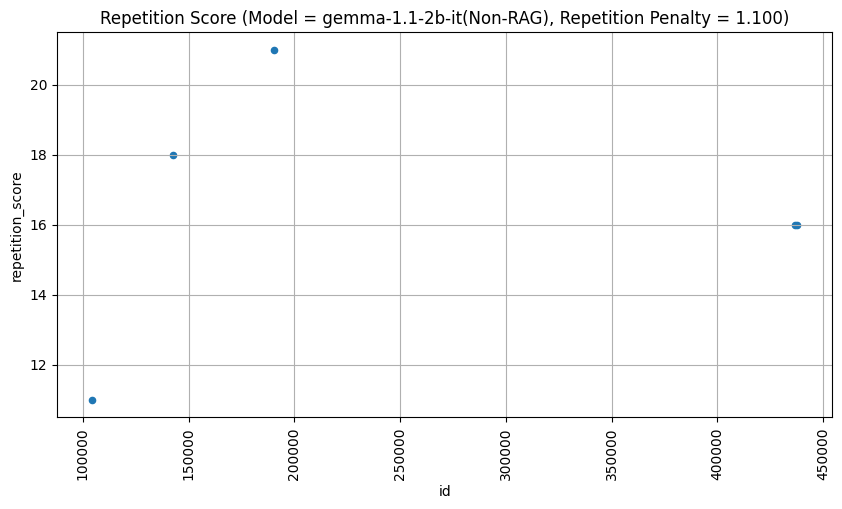

index: 5
No repetition found for title: Repetition Score (Model = gemma-1.1-7b-it(RAG - generic prompt), Repetition Penalty = 1.100)
index: 5


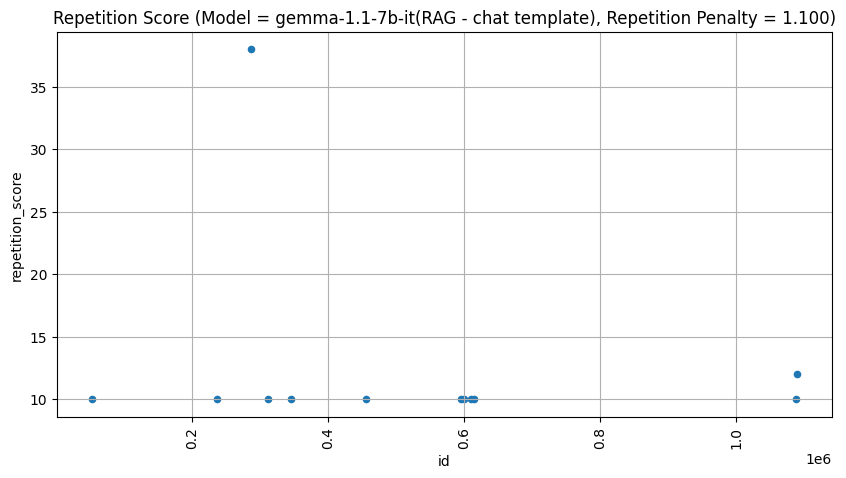

index: 5


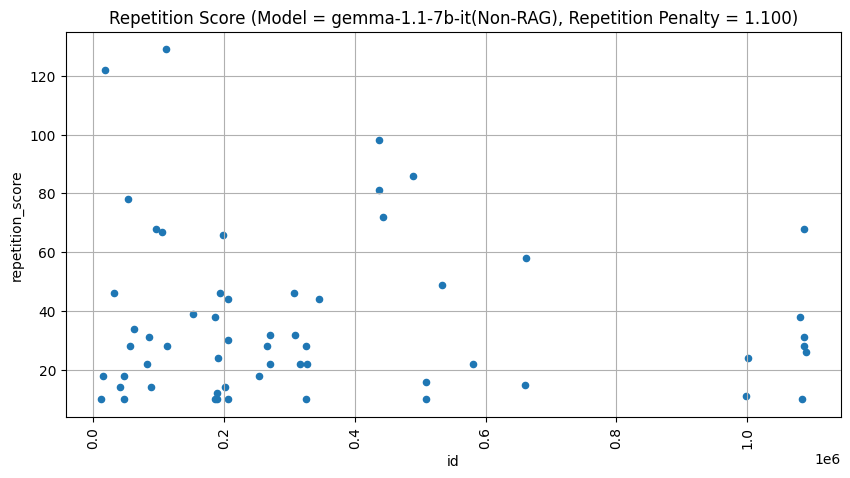

index: 8


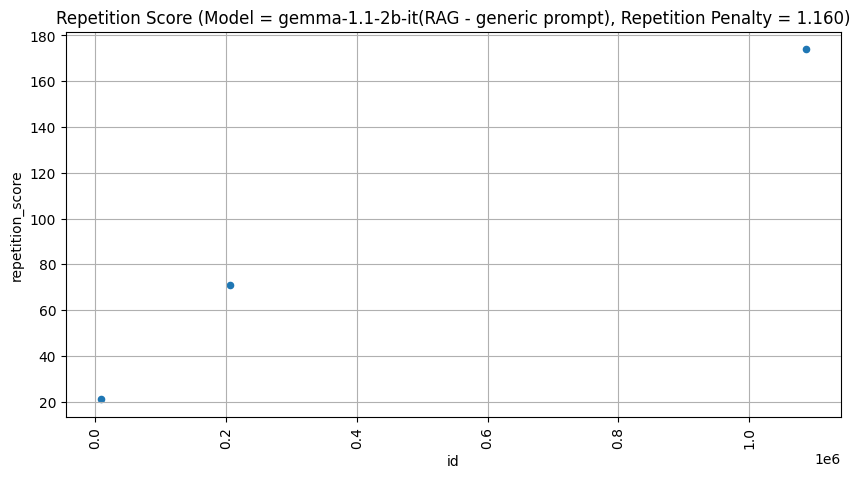

index: 8
No repetition found for title: Repetition Score (Model = gemma-1.1-2b-it(RAG - chat template), Repetition Penalty = 1.160)
index: 8


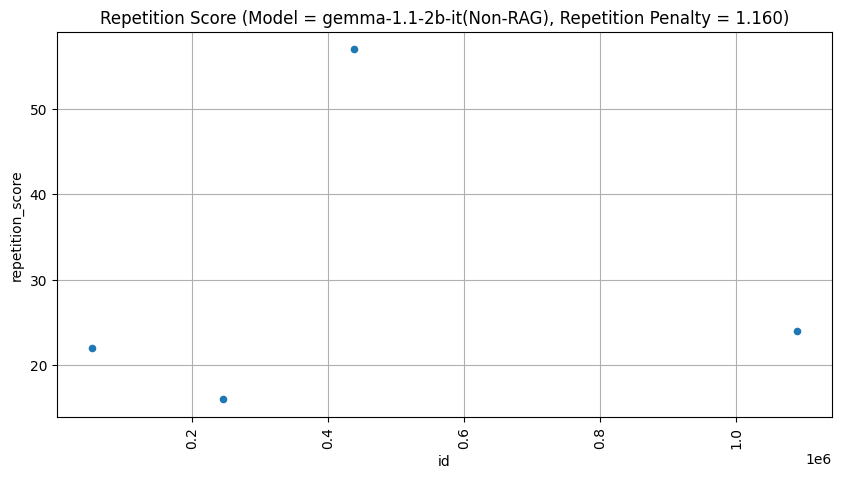

index: 8


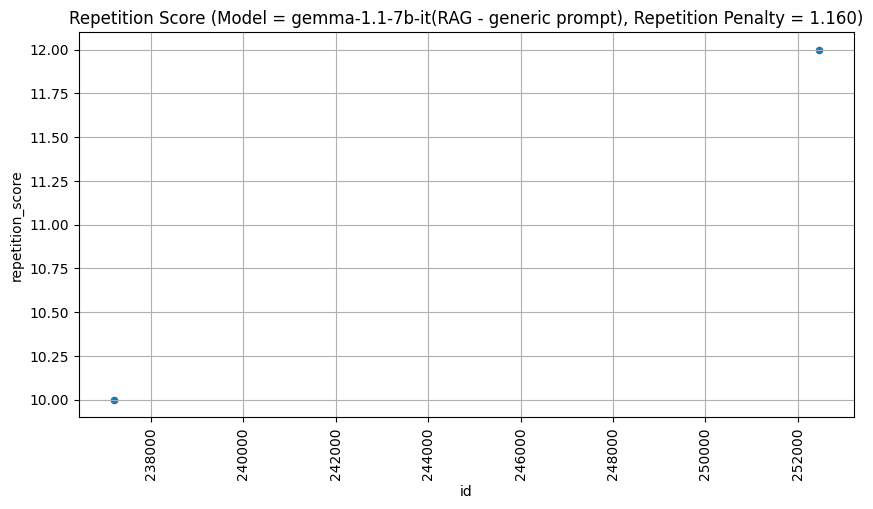

index: 8


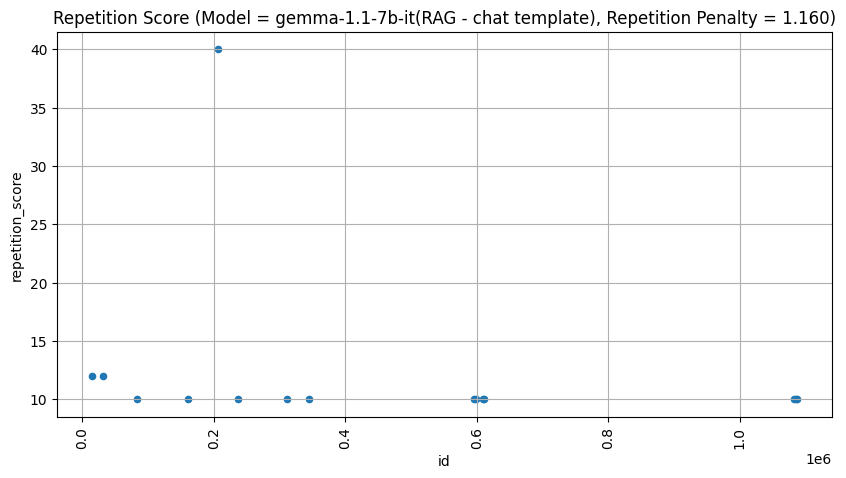

index: 8


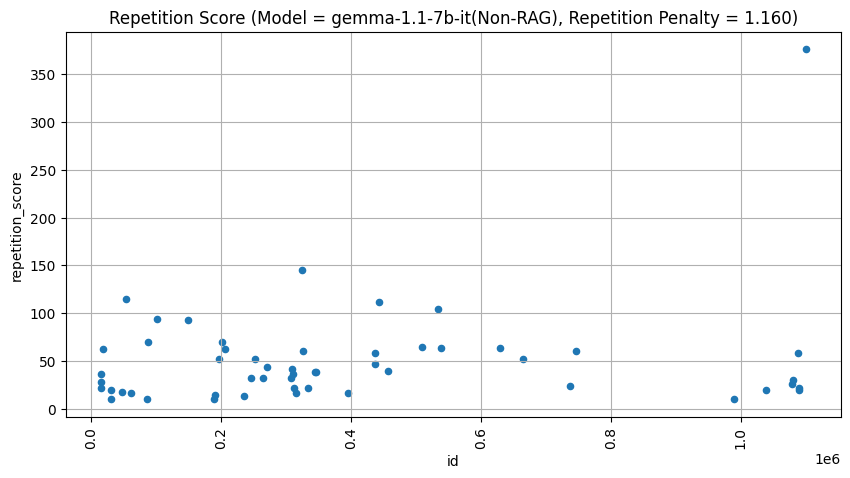

index: 15


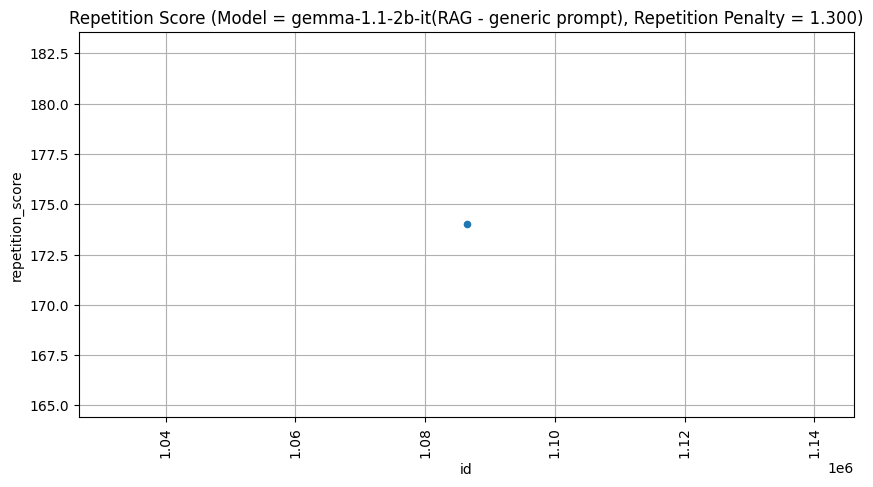

index: 15
No repetition found for title: Repetition Score (Model = gemma-1.1-2b-it(RAG - chat template), Repetition Penalty = 1.300)
index: 15


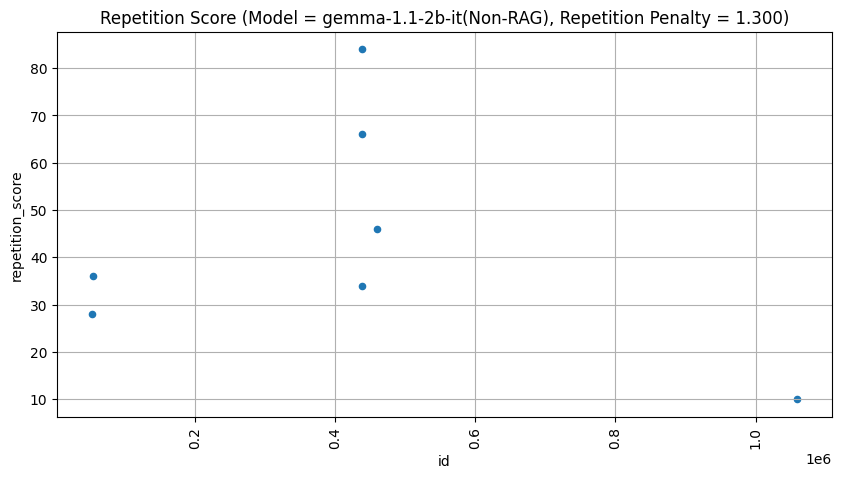

index: 15
No repetition found for title: Repetition Score (Model = gemma-1.1-7b-it(RAG - generic prompt), Repetition Penalty = 1.300)
index: 15


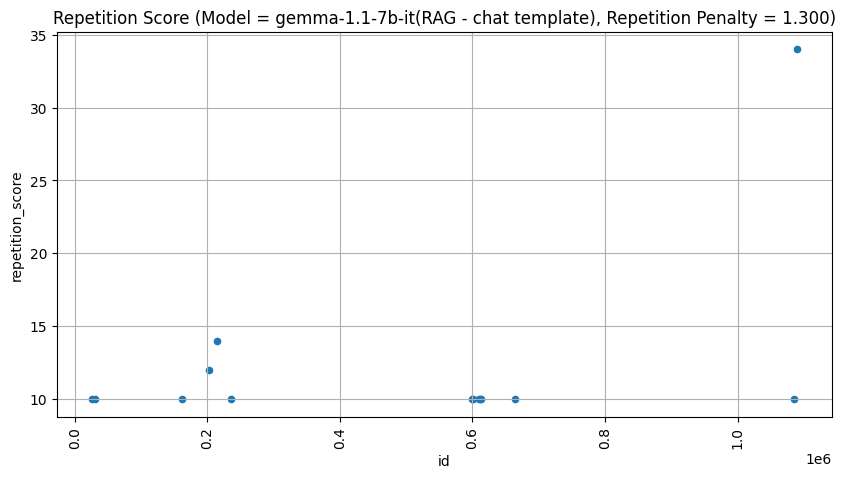

index: 15


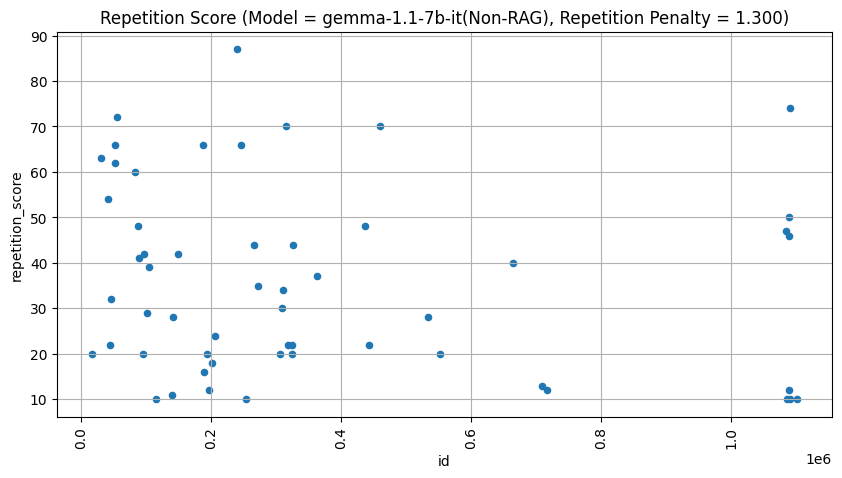

In [17]:
rps = [1, 1.1, 1.16, 1.3]

plot_per_question_score_for_model_group(result, "gemma-1.1", rps)

model: gemma-1.1-2b-it(RAG - generic prompt)
model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)
model: gemma-1.1-7b-it(RAG - generic prompt)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)
model: Llama-2-7b-chat-hf(RAG - generic prompt)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Mistral-7B-Instruct-v0.2(RAG - generic prompt)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)
model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - generic prompt)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non-RAG)
model: Llama-2-70b-chat-hf(RAG - generic prompt)
mo

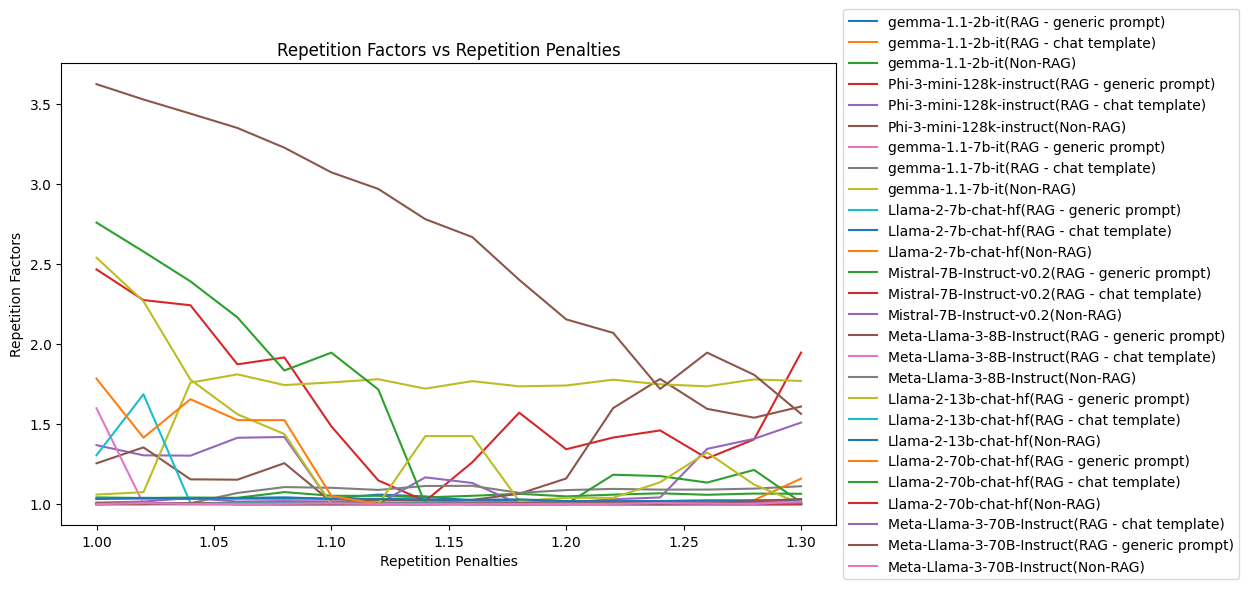

In [18]:
# draw the plot for mean, std, max, min of newline_score for all items in dfs
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the statistics
plt.figure(figsize=(10, 6))

for model in result.keys():
    print(f"model: {model}")
    df = result[model]["df_overall"]
    repetition_panelties = [
        repetition_penalty for repetition_penalty in df["repetition_penalty"]
    ]

    # Calculate the statistics
    mean_score = [
        math.log10(10 + df["total_repetitions"].mean())
        for df in result[model]["df_list_repetition_penalty"]
    ]
    if len(mean_score) != len(repetition_panelties):
        print(
            f"model: {model} has different length of repetition penalties and mean score"
        )
        print("repetition_panelties:", len(repetition_panelties))
        print("mean_score:", len(mean_score))
        continue

    sns.lineplot(x=repetition_panelties, y=mean_score, label=model)

plt.xlabel("Repetition Penalties")
plt.ylabel("Repetition Factors")
plt.title("Repetition Factors vs Repetition Penalties")
plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left")

plt.show()

In [19]:
# draw the plot for mean, std, max, min of newline_score for all items in dfs
import seaborn as sns
import matplotlib.pyplot as plt


def plot_statistics(result, model_group=None):
    # Plot the statistics
    plt.figure(figsize=(10, 6))

    for model in result.keys():
        if model_group is not None and model_group not in model.lower():
            continue
        print(f"model: {model}")
        df = result[model]["df_overall"]
        repetition_panelties = [
            repetition_penalty for repetition_penalty in df["repetition_penalty"]
        ]

        # Calculate the statistics
        bleu1 = [x for x in df["bleu1"]]
        rougeL = [x for x in df["rougeL"]]
        f1 = [2 * (p * r) / (p + r) for p, r in zip(bleu1, rougeL)]

        sns.lineplot(x=repetition_panelties, y=bleu1, label=f"{model} bleu1")
        sns.lineplot(x=repetition_panelties, y=rougeL, label=f"{model} rougeL")
        sns.lineplot(x=repetition_panelties, y=f1, label=f"{model} overall perf score")

    plt.xlabel("Repetition Penalties")
    plt.ylabel("RougeL / BLUE-1 Scores")
    plt.title("Performance vs. Repetition Penalties")

    # Place the legend outside the plot area on the right side
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

    # Set y-axis to logarithmic scale
    # plt.yscale("log")

    plt.show()

model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Meta-Llama-3-70B-Instruct(RAG - chat template)
model: Meta-Llama-3-70B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-70B-Instruct(Non-RAG)


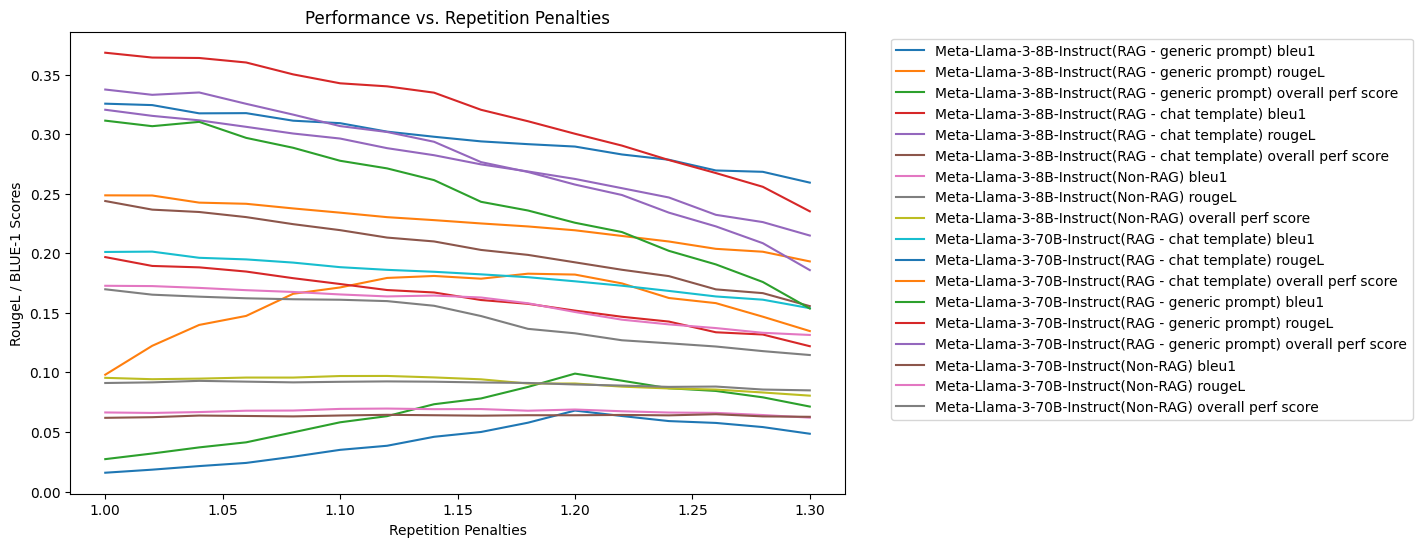

In [20]:
plot_statistics(result, "llama-3")

model: Llama-2-7b-chat-hf(RAG - generic prompt)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - generic prompt)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non-RAG)
model: Llama-2-70b-chat-hf(RAG - generic prompt)
model: Llama-2-70b-chat-hf(RAG - chat template)
model: Llama-2-70b-chat-hf(Non-RAG)


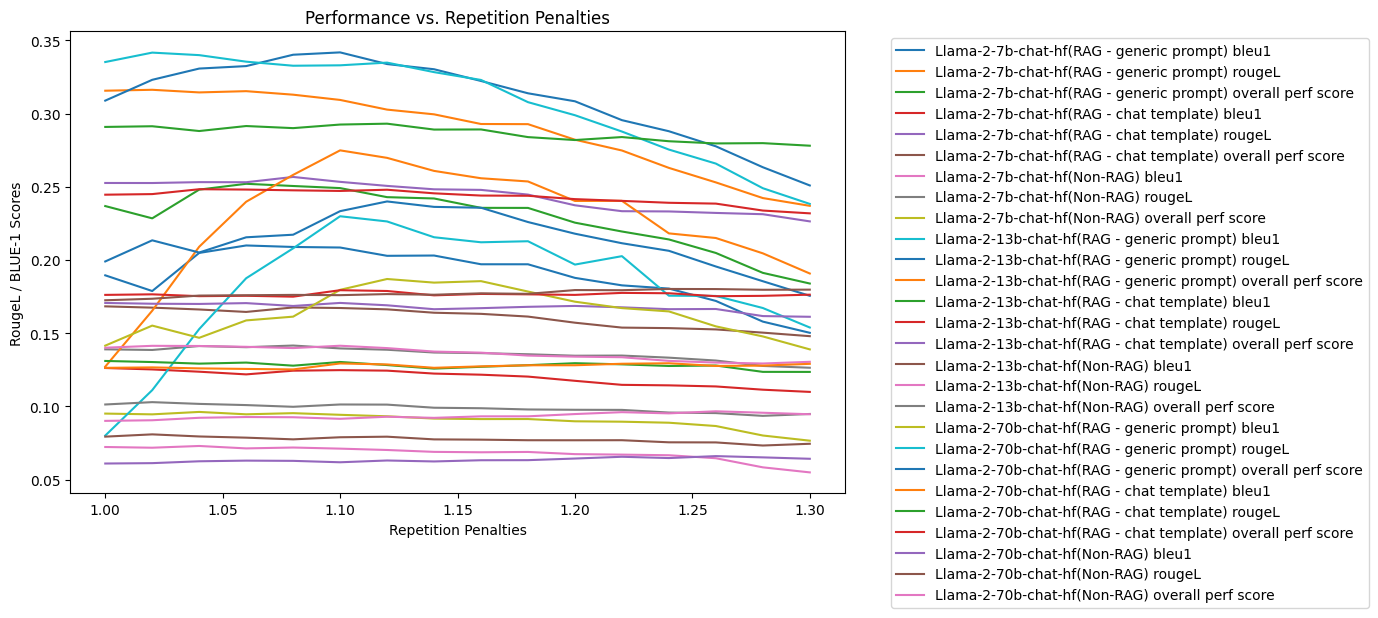

In [21]:
plot_statistics(result, "llama-2")

model: gemma-1.1-2b-it(RAG - generic prompt)
model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: gemma-1.1-7b-it(RAG - generic prompt)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)


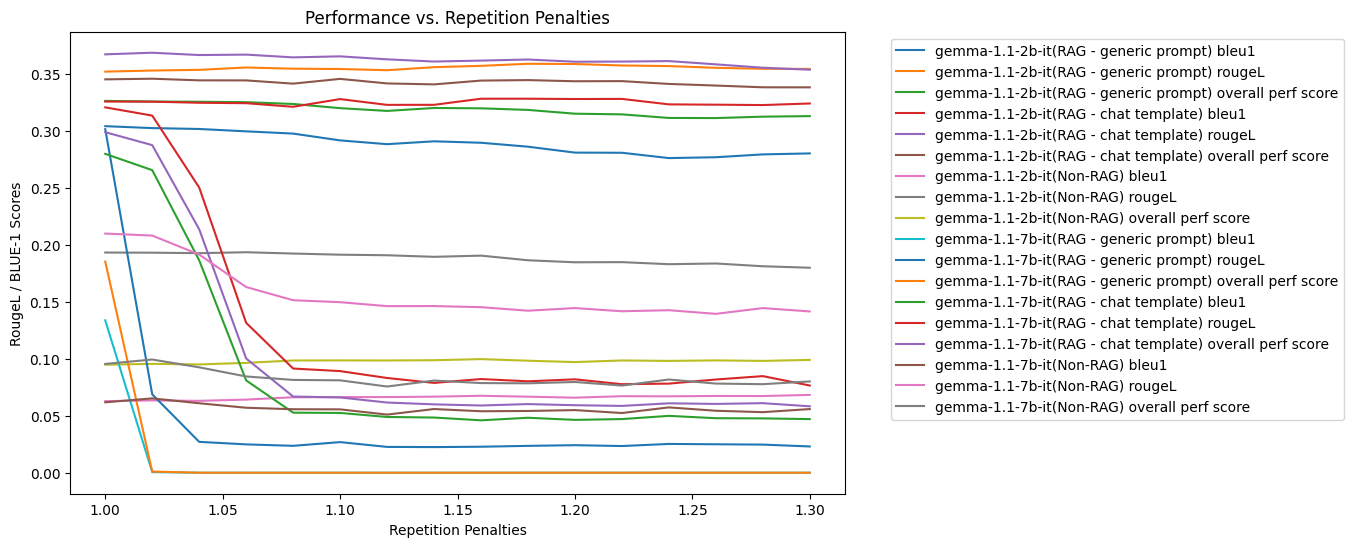

In [22]:
plot_statistics(result, "gemma-1.1")

model: gemma-1.1-2b-it(RAG - generic prompt)


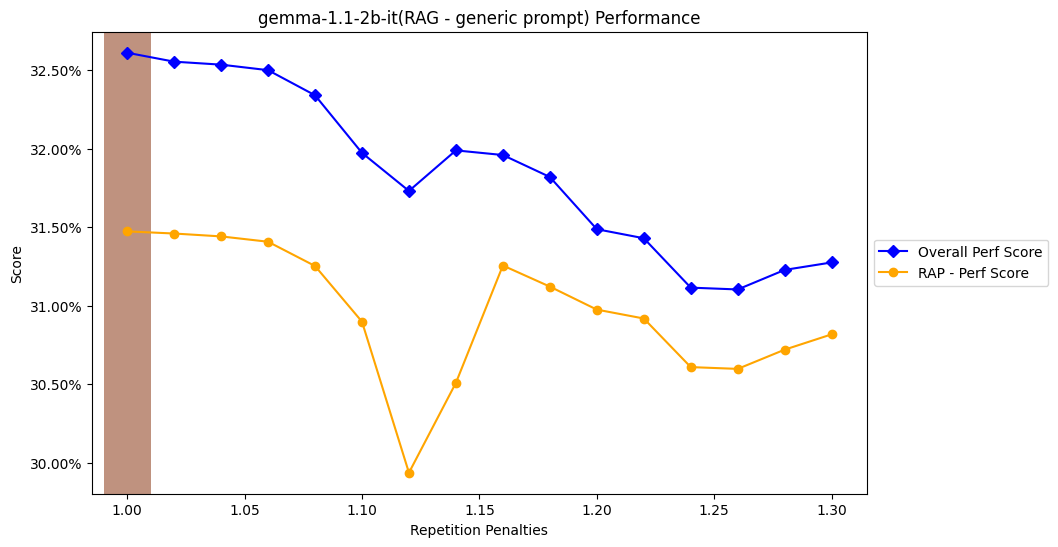

model: gemma-1.1-2b-it(RAG - chat template)


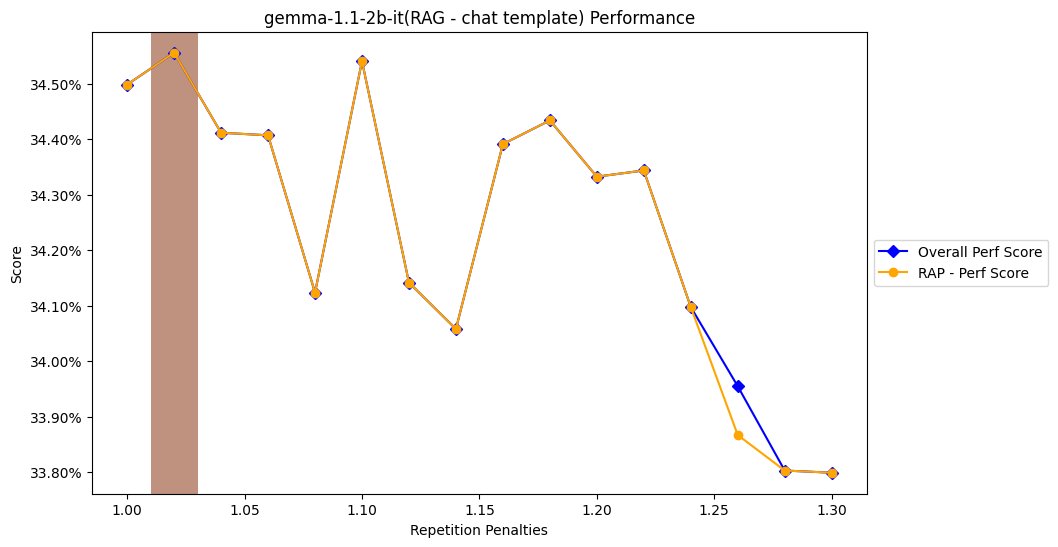

model: gemma-1.1-2b-it(Non-RAG)


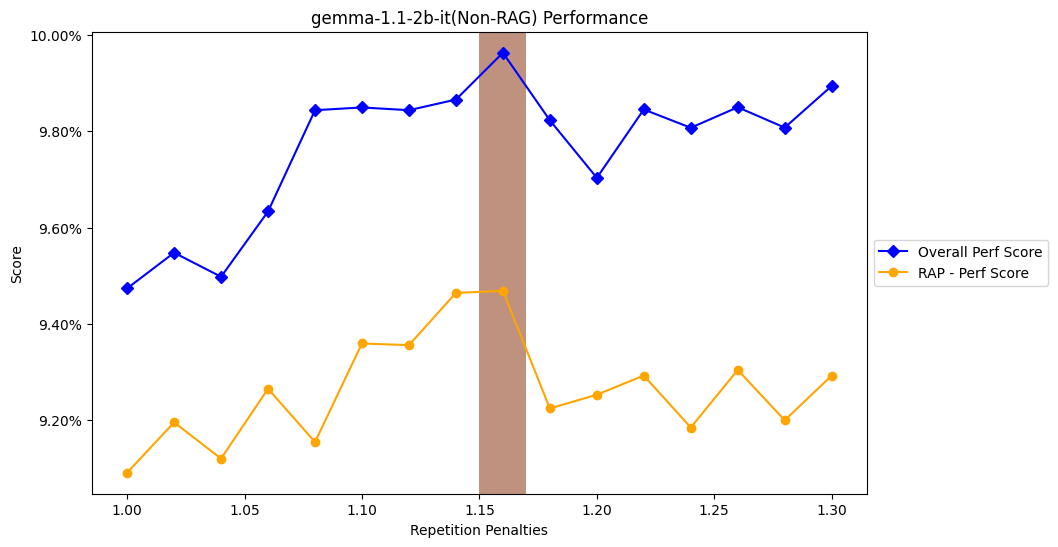

model: Phi-3-mini-128k-instruct(RAG - generic prompt)


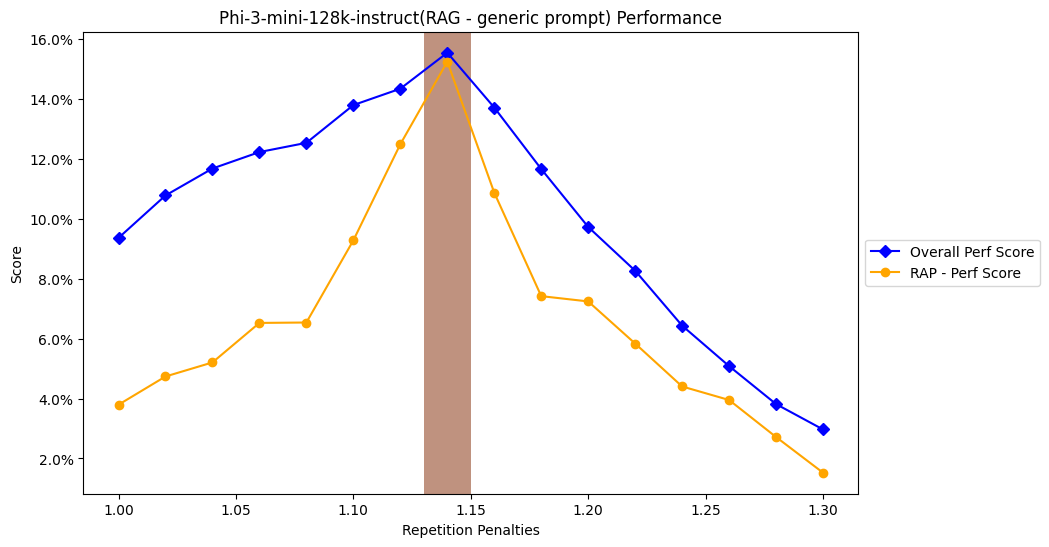

model: Phi-3-mini-128k-instruct(RAG - chat template)


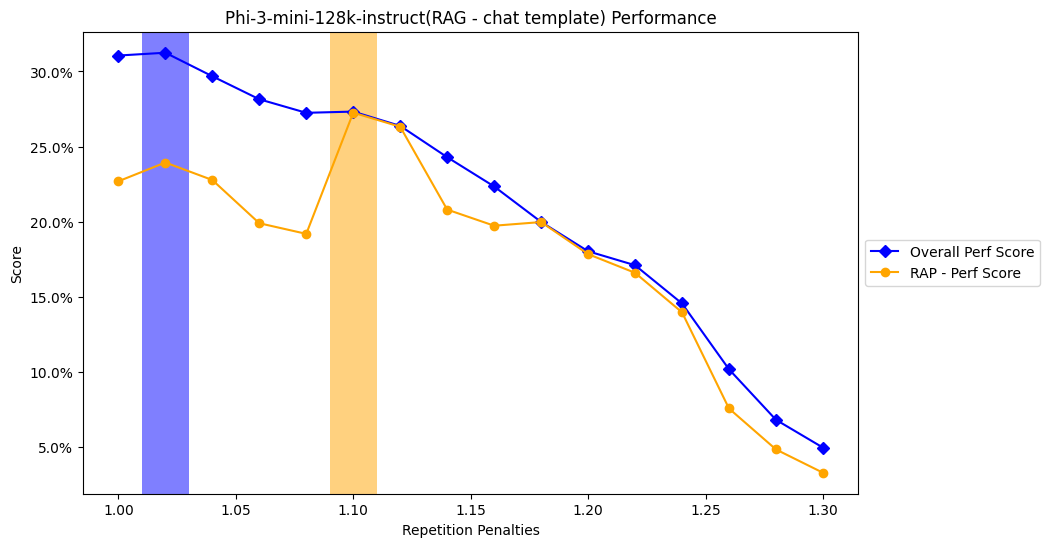

model: Phi-3-mini-128k-instruct(Non-RAG)


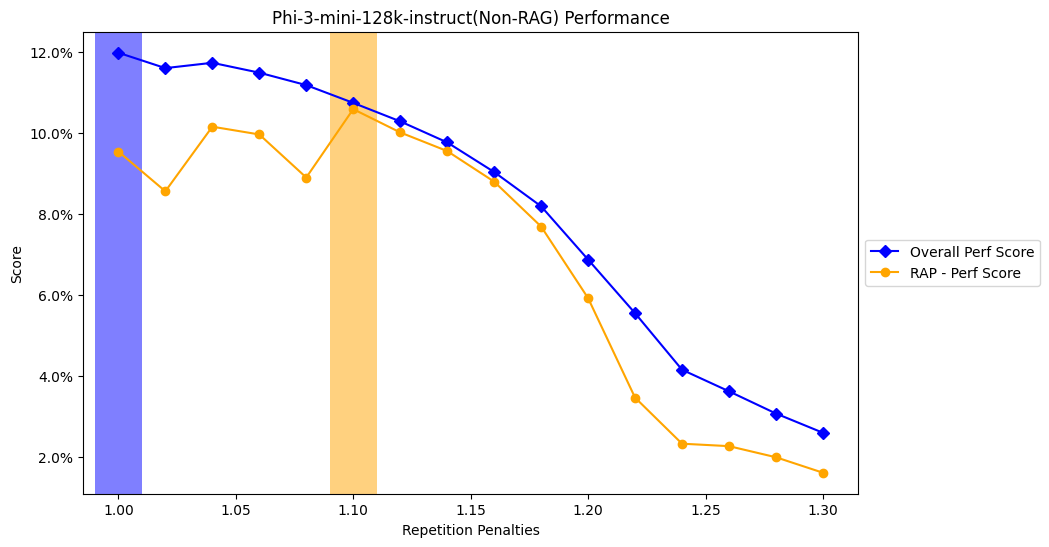

model: gemma-1.1-7b-it(RAG - generic prompt)


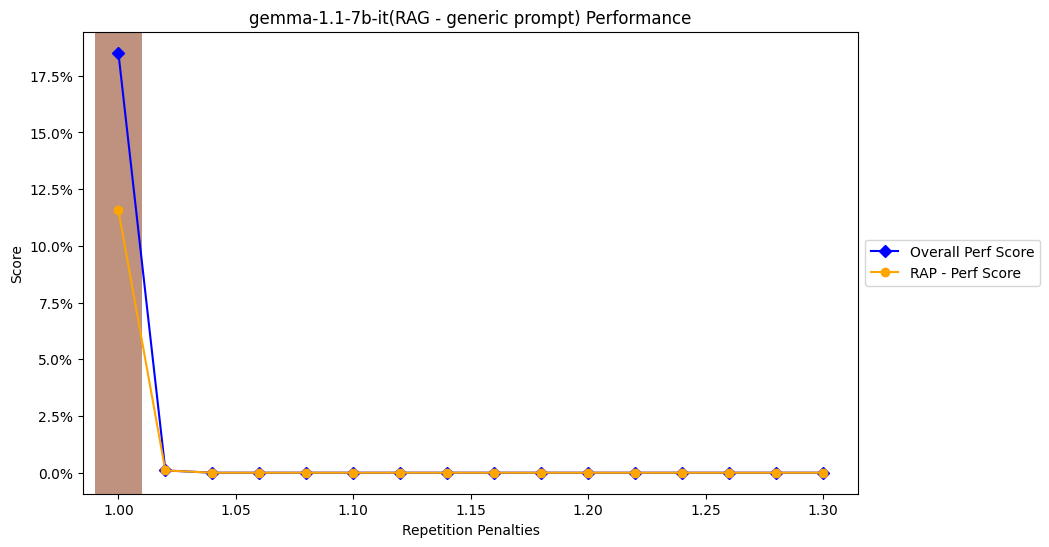

model: gemma-1.1-7b-it(RAG - chat template)


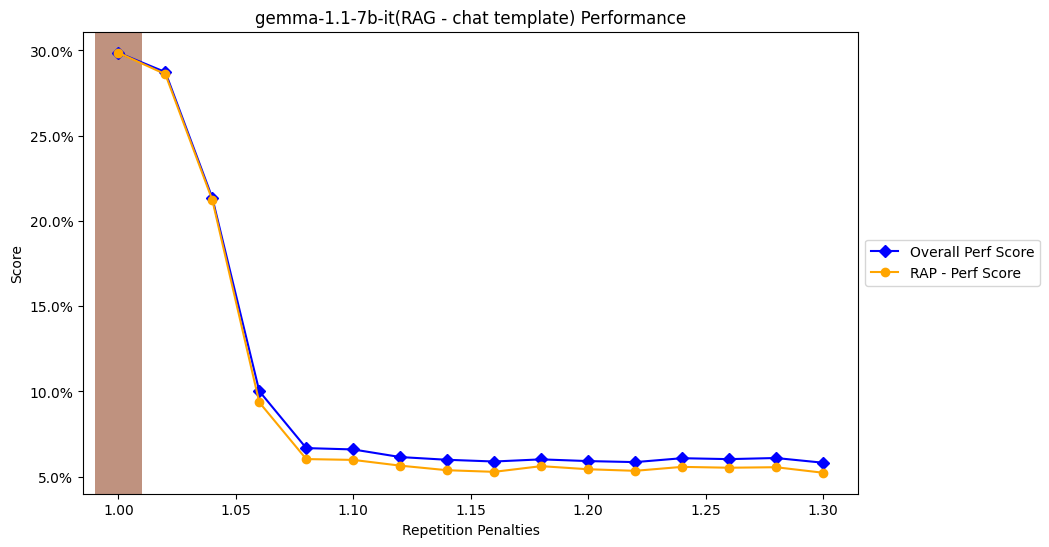

model: gemma-1.1-7b-it(Non-RAG)


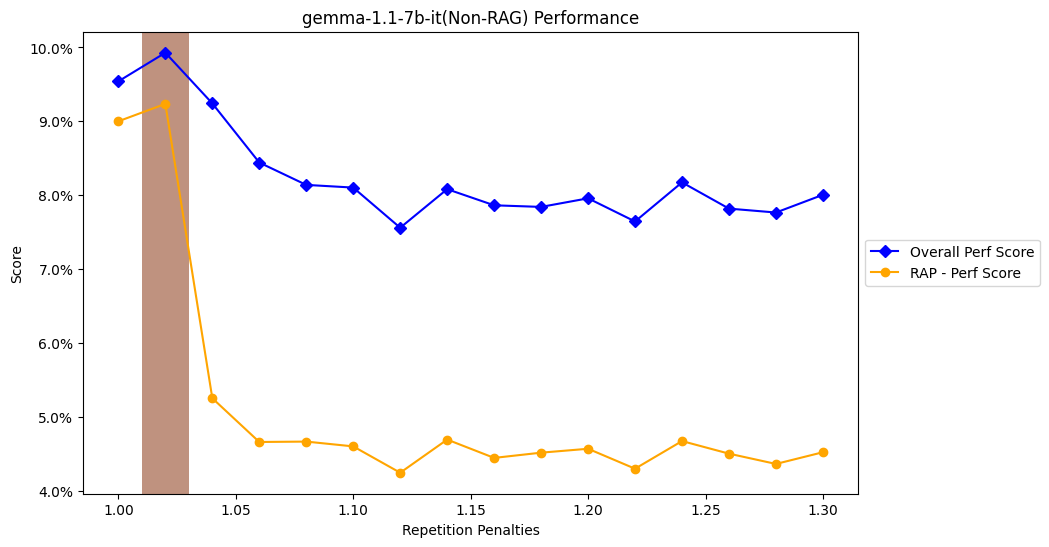

model: Llama-2-7b-chat-hf(RAG - generic prompt)


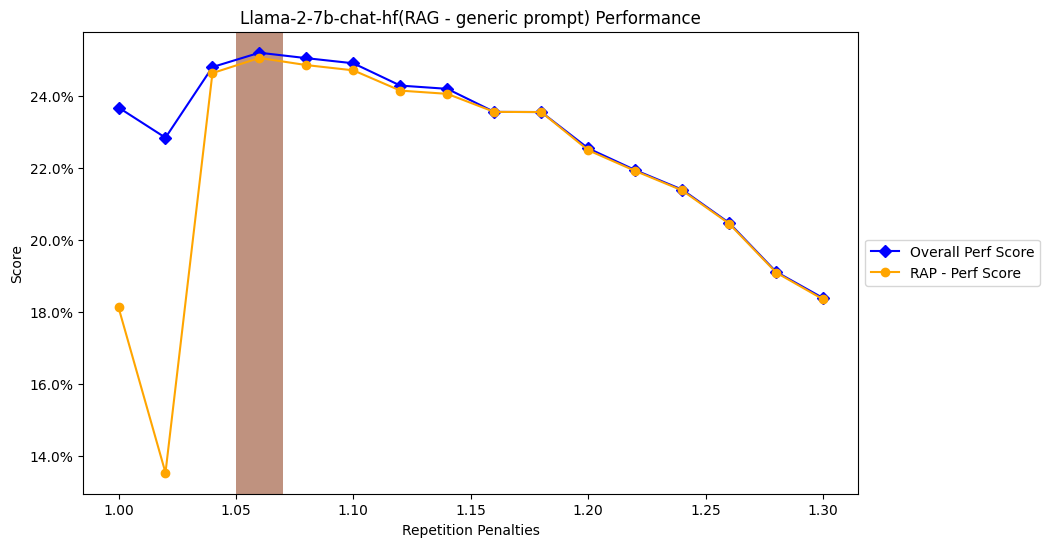

model: Llama-2-7b-chat-hf(RAG - chat template)


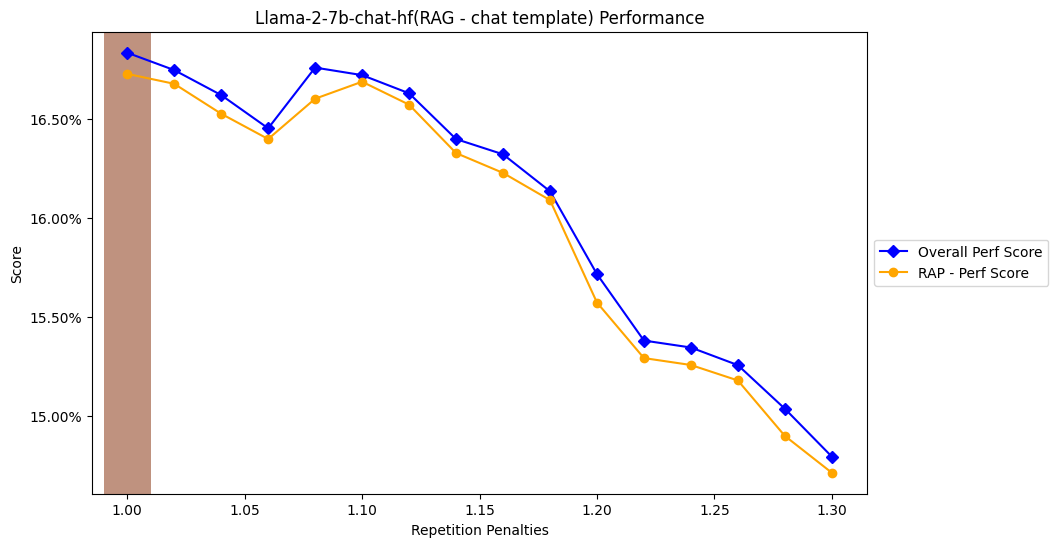

model: Llama-2-7b-chat-hf(Non-RAG)


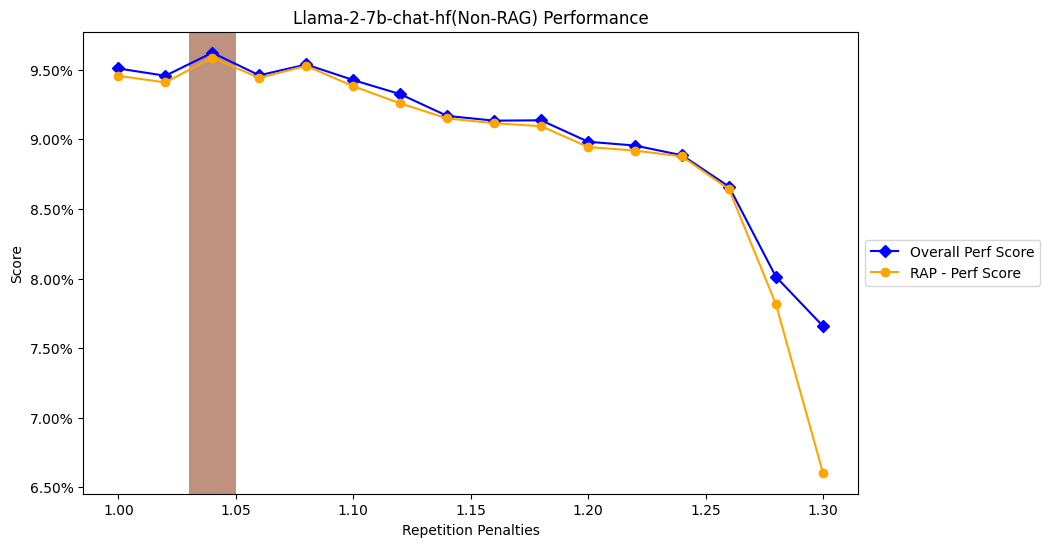

model: Mistral-7B-Instruct-v0.2(RAG - generic prompt)


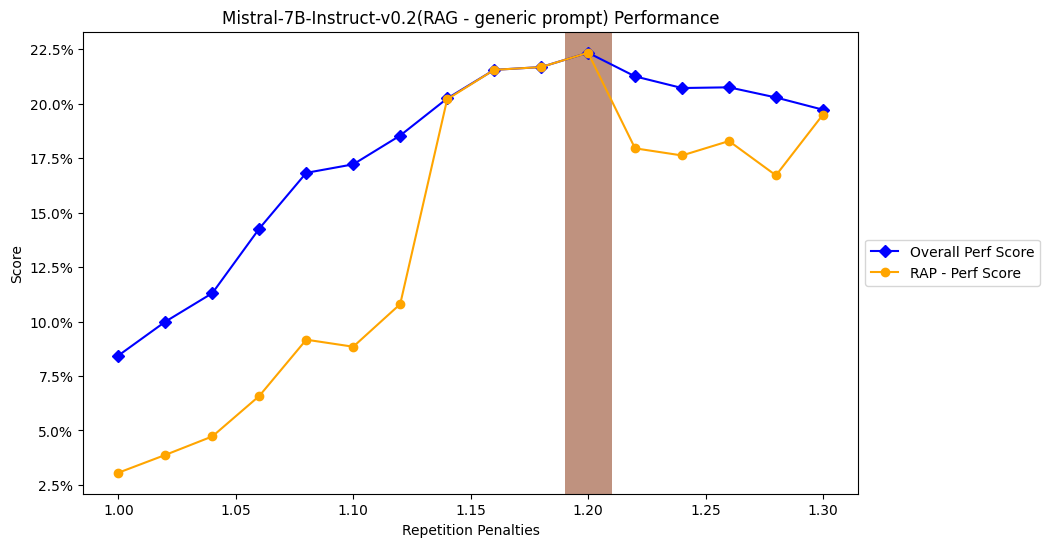

model: Mistral-7B-Instruct-v0.2(RAG - chat template)


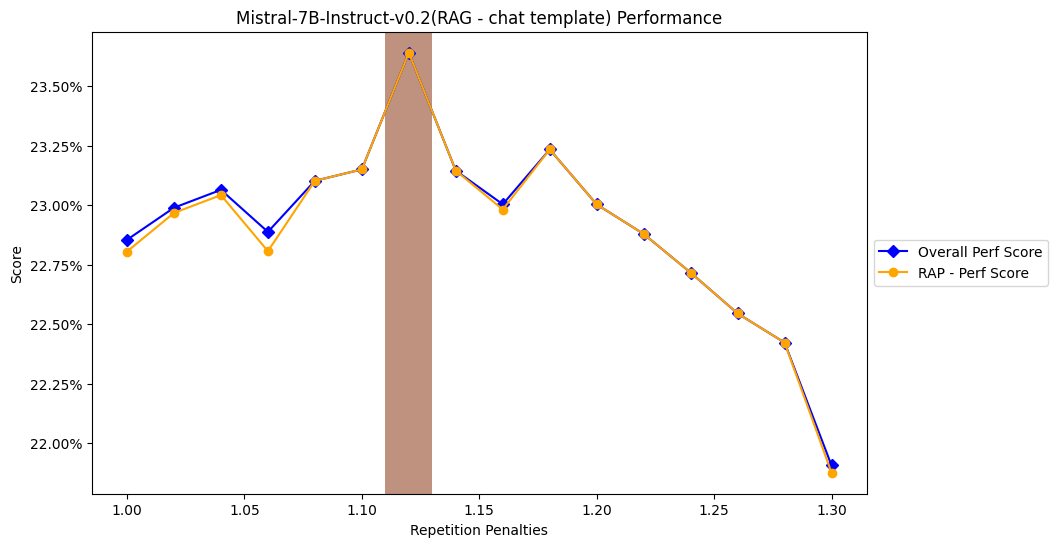

model: Mistral-7B-Instruct-v0.2(Non-RAG)


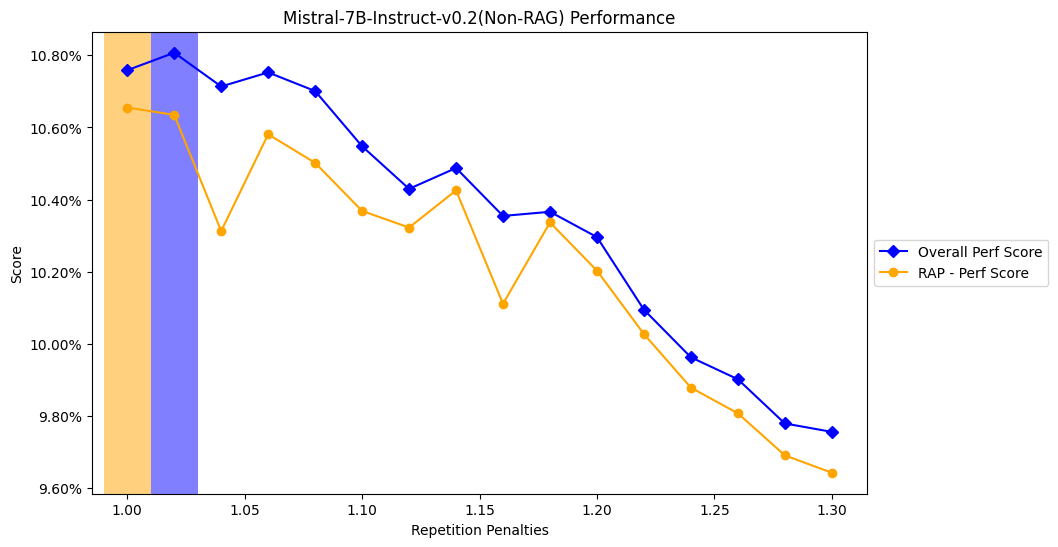

model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)


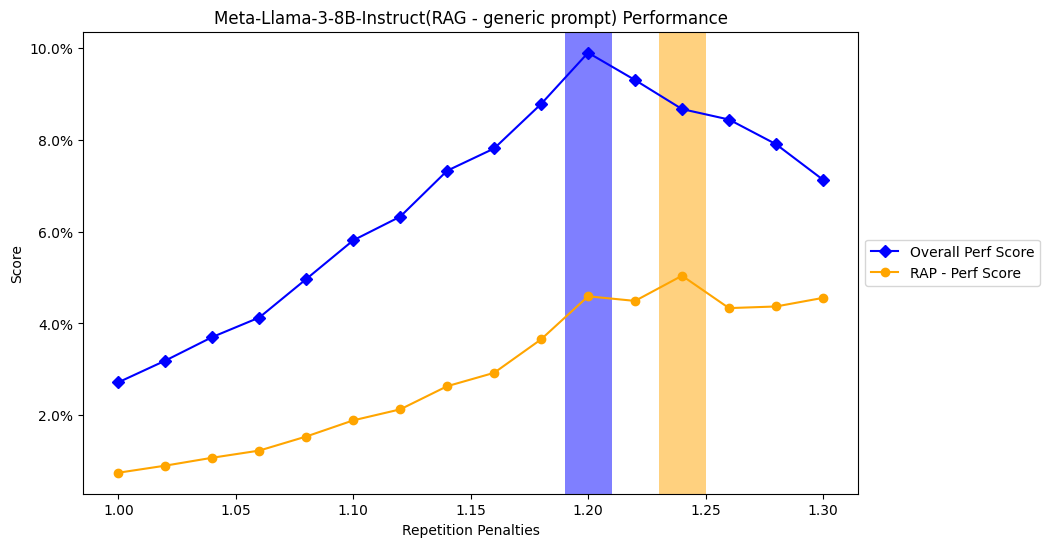

model: Meta-Llama-3-8B-Instruct(RAG - chat template)


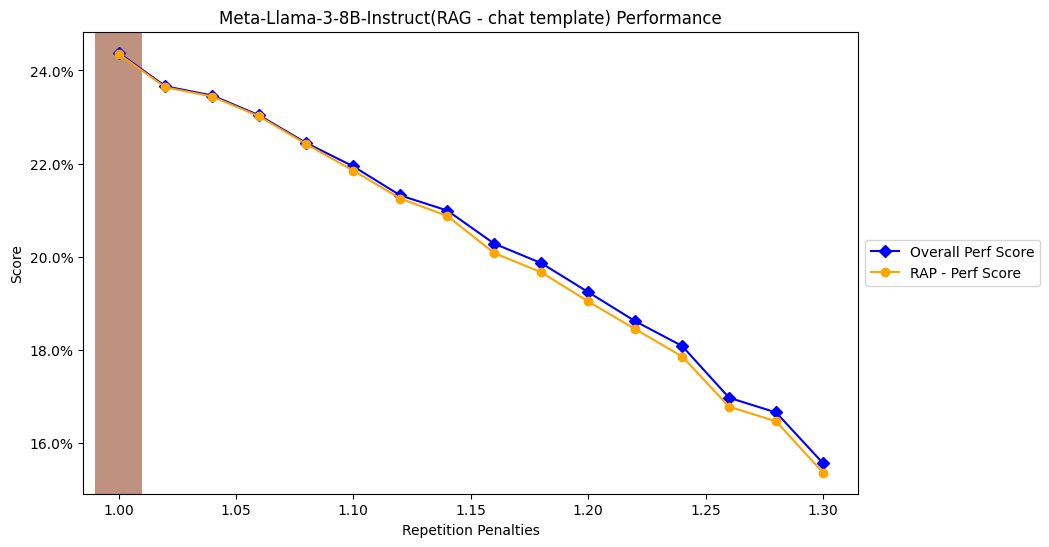

model: Meta-Llama-3-8B-Instruct(Non-RAG)


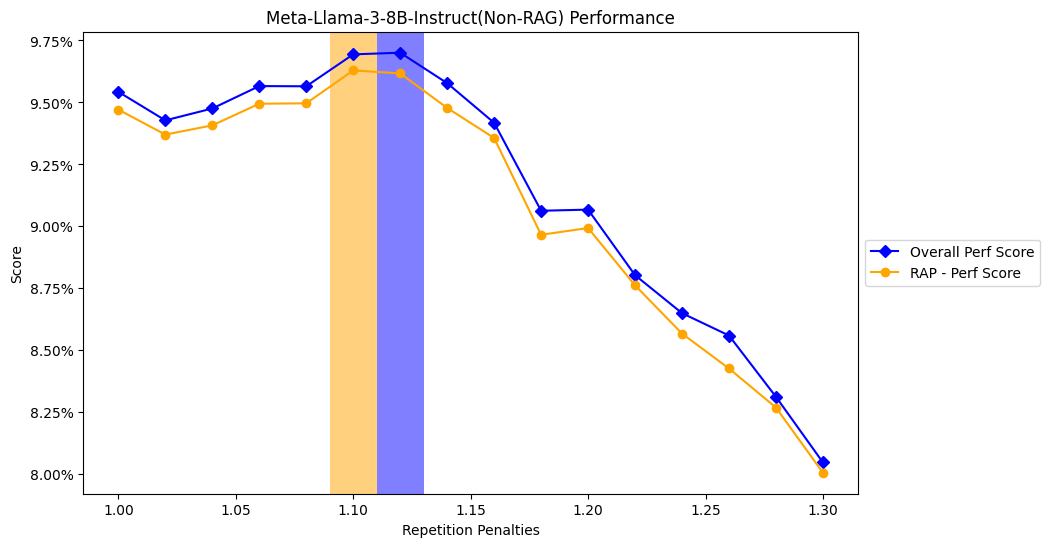

model: Llama-2-13b-chat-hf(RAG - generic prompt)


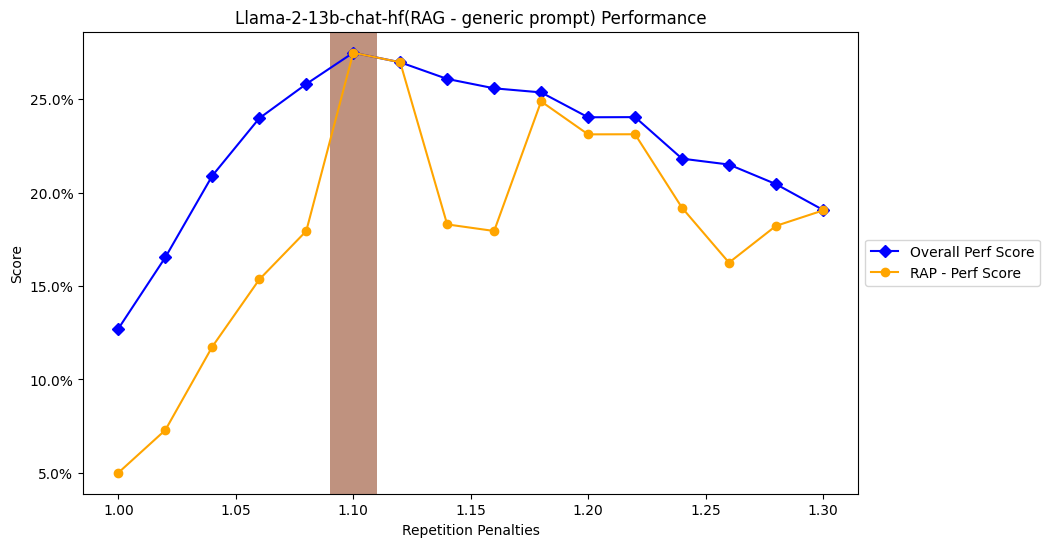

model: Llama-2-13b-chat-hf(RAG - chat template)


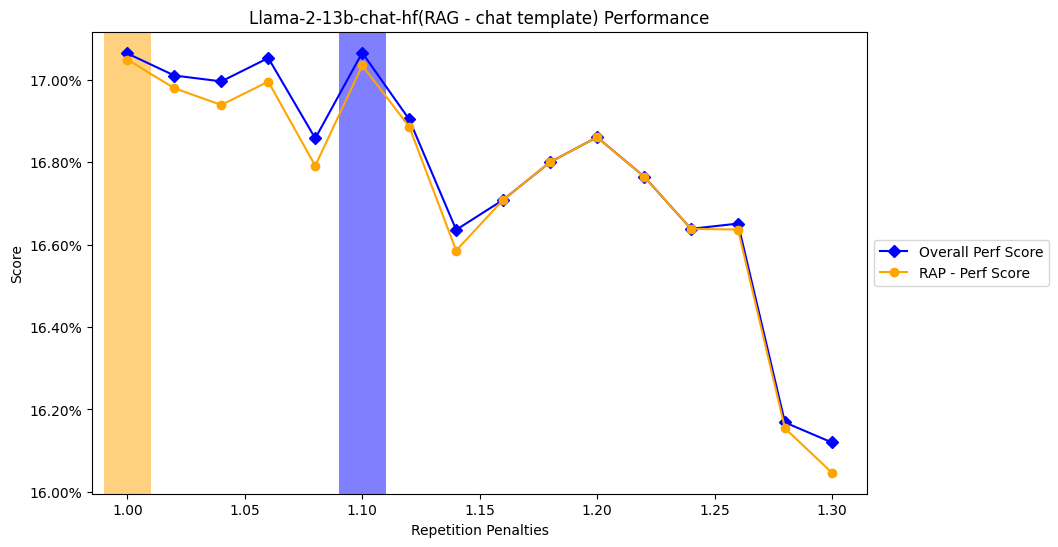

model: Llama-2-13b-chat-hf(Non-RAG)


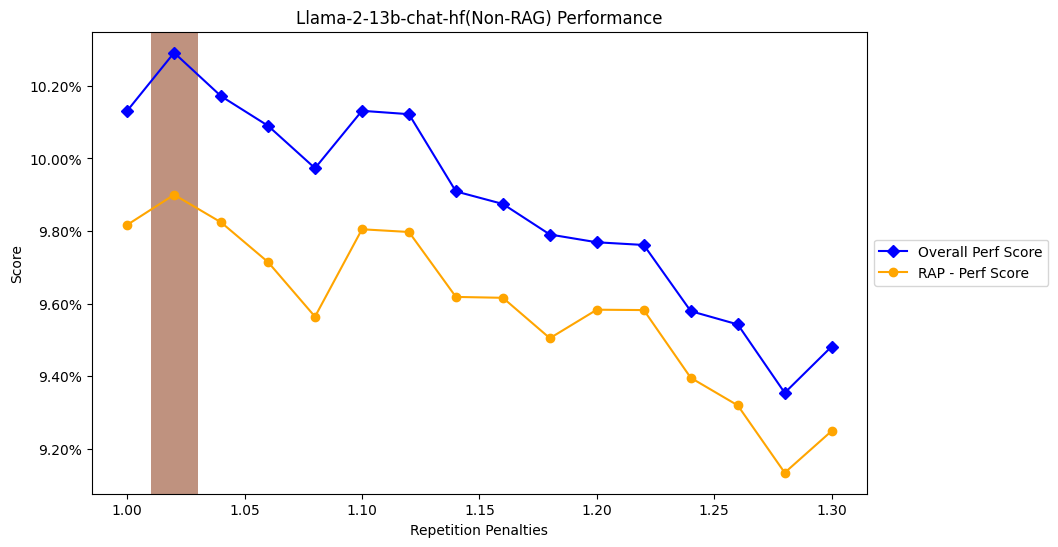

model: Llama-2-70b-chat-hf(RAG - generic prompt)


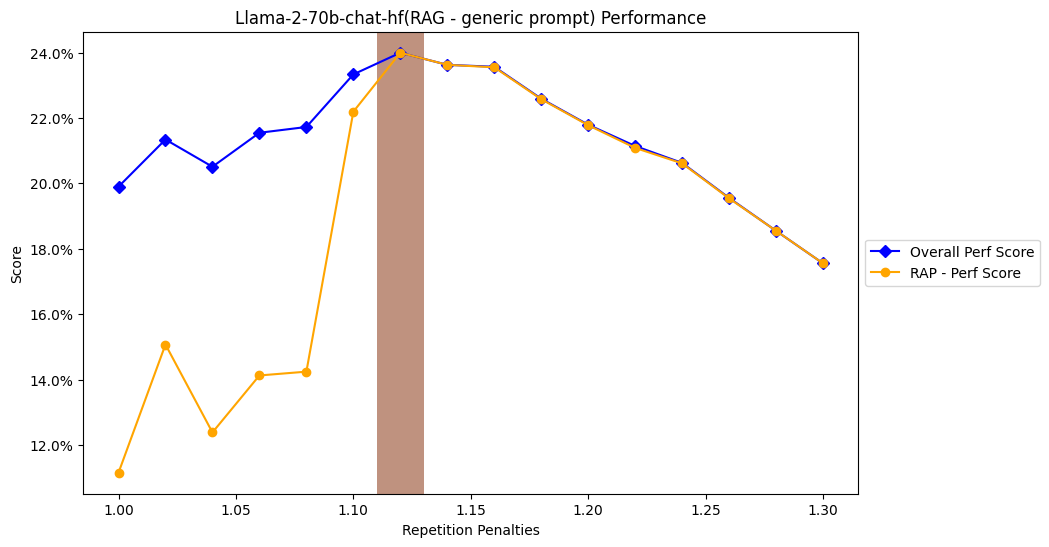

model: Llama-2-70b-chat-hf(RAG - chat template)


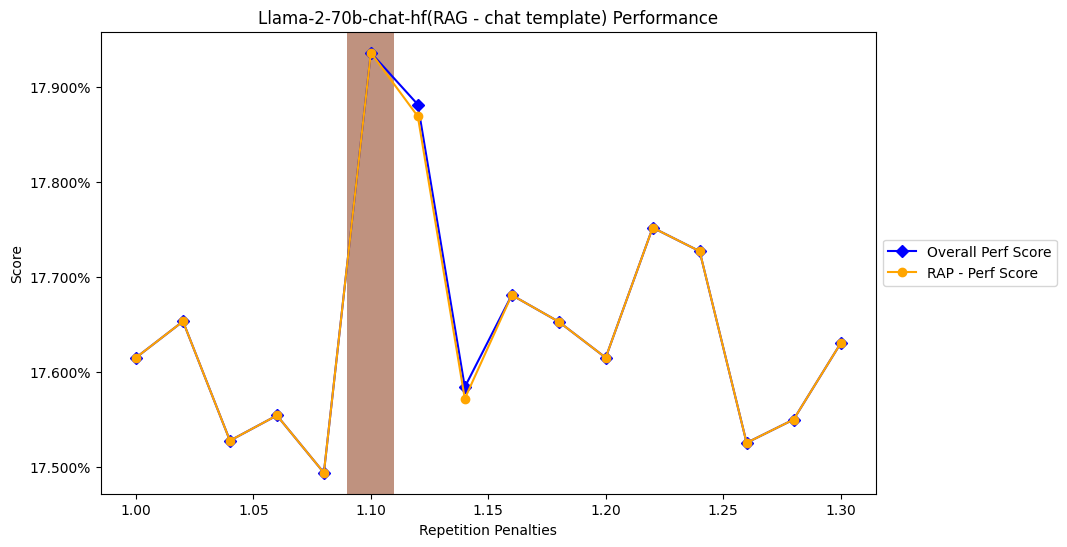

model: Llama-2-70b-chat-hf(Non-RAG)


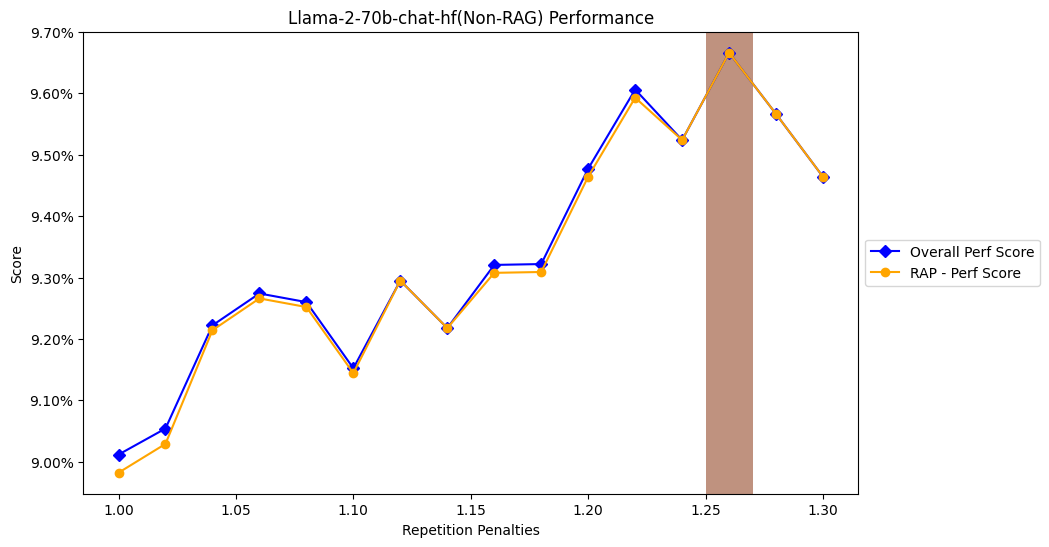

model: Meta-Llama-3-70B-Instruct(RAG - chat template)


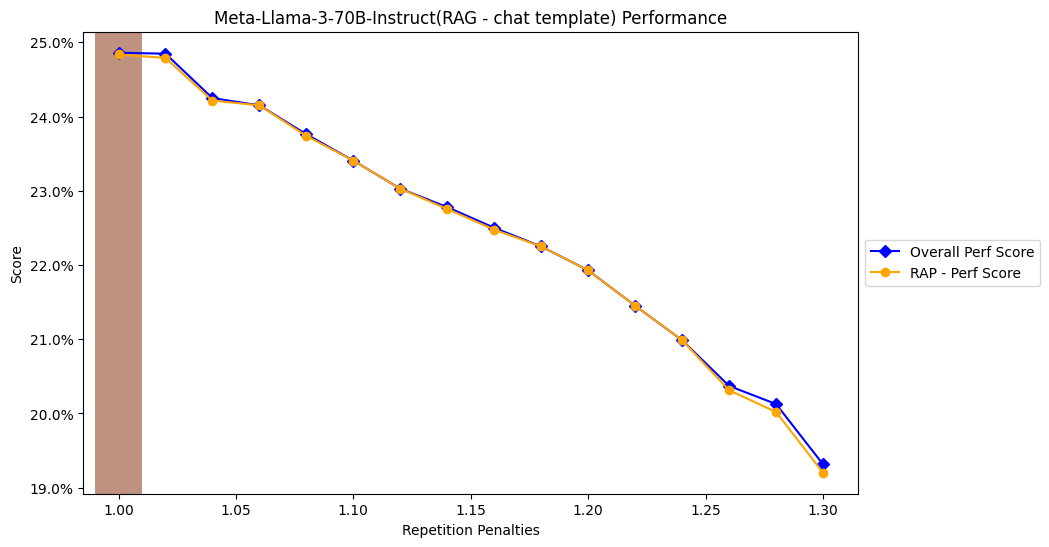

model: Meta-Llama-3-70B-Instruct(RAG - generic prompt)


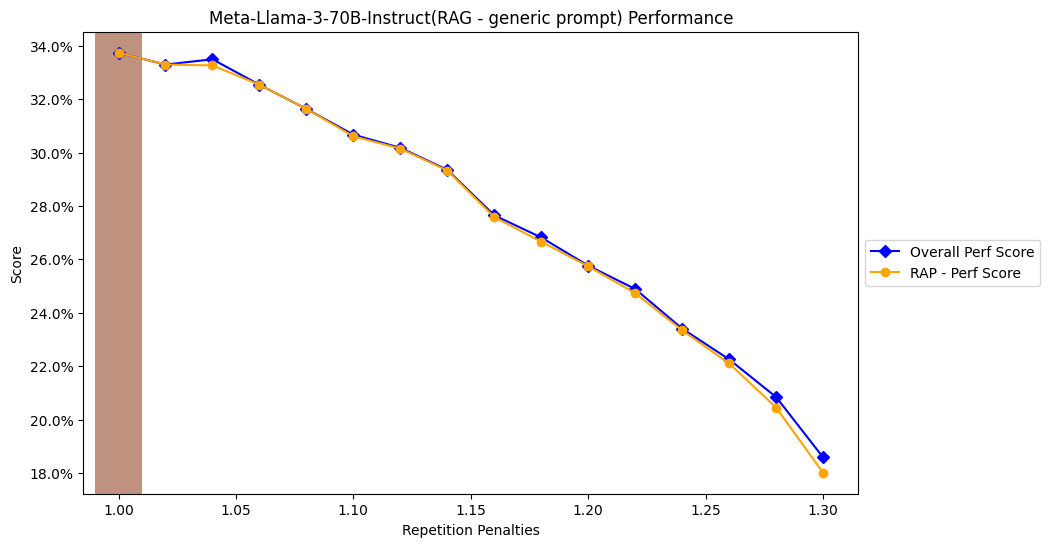

model: Meta-Llama-3-70B-Instruct(Non-RAG)


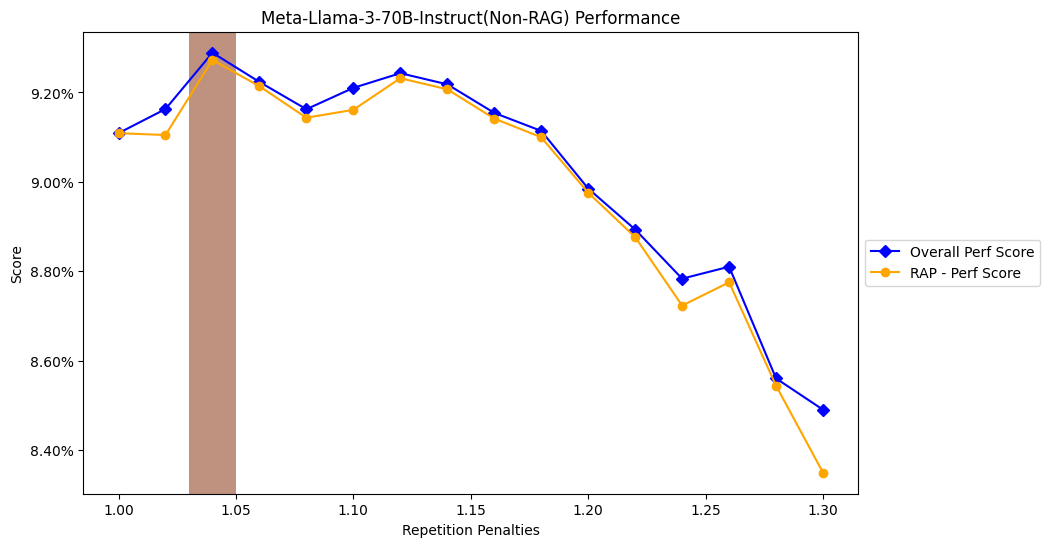

In [23]:
plot_performance_scores_ms_macro(result)

model: gemma-1.1-2b-it(RAG - generic prompt)
model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)
model: gemma-1.1-7b-it(RAG - generic prompt)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)
model: Llama-2-7b-chat-hf(RAG - generic prompt)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Mistral-7B-Instruct-v0.2(RAG - generic prompt)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)
model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - generic prompt)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non-RAG)
model: Llama-2-70b-chat-hf(RAG - generic prompt)
mo

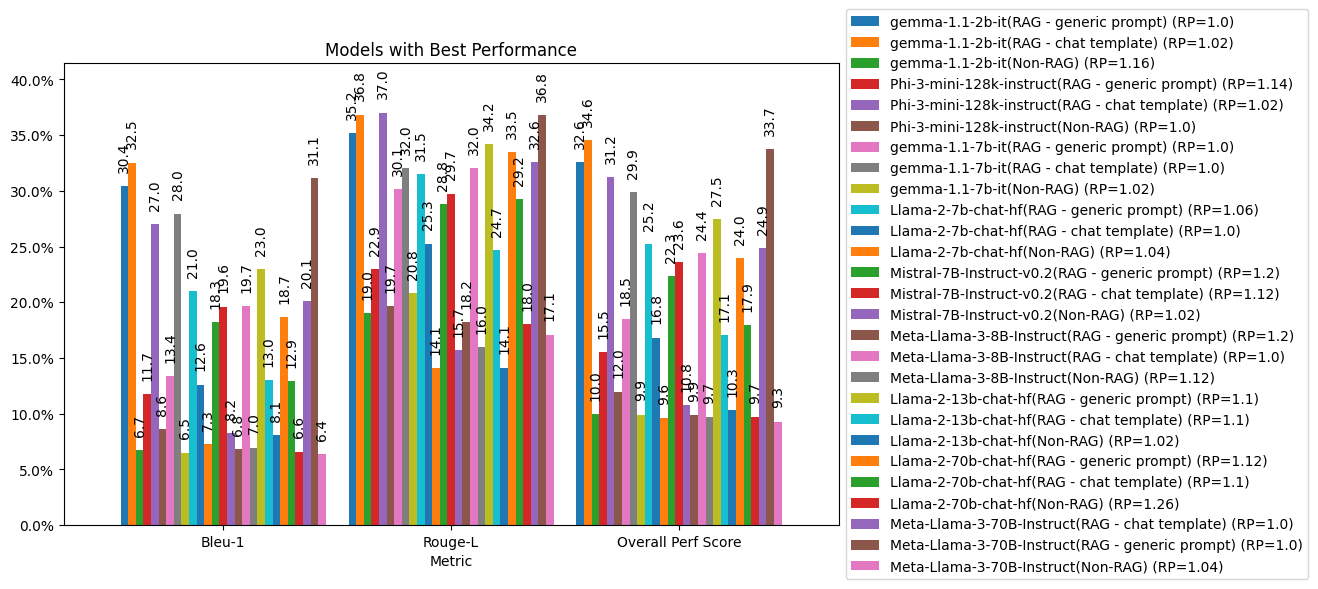

In [24]:
df, best_mtr = plot_best_performance_ms_macro(
    result, include_adjusted_performance=False, title="Models with Best Performance"
)

In [25]:
df = df.T
df["MTR"] = best_mtr
df["RAP-Overall Perf Score"] = df.apply(
    lambda x: x["Overall Perf Score"] / math.log10(10 + x["MTR"]), axis=1
)
df

Metric                                                Bleu-1   Rouge-L  \
Model                                                                    
gemma-1.1-2b-it(RAG - generic prompt) (RP=1.0)      0.303934  0.351767   
gemma-1.1-2b-it(RAG - chat template) (RP=1.02)      0.325423  0.368347   
gemma-1.1-2b-it(Non-RAG) (RP=1.16)                  0.067473  0.190389   
Phi-3-mini-128k-instruct(RAG - generic prompt) ...  0.117487  0.229443   
Phi-3-mini-128k-instruct(RAG - chat template) (...  0.270291  0.370175   
Phi-3-mini-128k-instruct(Non-RAG) (RP=1.0)          0.086192  0.196655   
gemma-1.1-7b-it(RAG - generic prompt) (RP=1.0)      0.133633  0.301303   
gemma-1.1-7b-it(RAG - chat template) (RP=1.0)       0.279658  0.320426   
gemma-1.1-7b-it(Non-RAG) (RP=1.02)                  0.065206  0.207977   
Llama-2-7b-chat-hf(RAG - generic prompt) (RP=1.06)  0.209906  0.315277   
Llama-2-7b-chat-hf(RAG - chat template) (RP=1.0)    0.126220  0.252577   
Llama-2-7b-chat-hf(Non-RAG) (RP=1.04)               0.072973  0.141226   
Mistral-7B-Instruct-v0.2(RAG - generic prompt) ...  0.182513  0.288050   
Mistral-7B-Instruct-v0.2(RAG - chat template) (...  0.196152  0.297454   
Mistral-7B-Instruct-v0.2(Non-RAG) (RP=1.02)         0.082391  0.157004   
Meta-Llama-3-8B-Instruct(RAG - generic prompt) ...  0.067948  0.182096   
Meta-Llama-3-8B-Instruct(RAG - chat template) (...  0.196769  0.320432   
Meta-Llama-3-8B-Instruct(Non-RAG) (RP=1.12)         0.069636  0.159823   
Llama-2-13b-chat-hf(RAG - generic prompt) (RP=1.1)  0.229853  0.341756   
Llama-2-13b-chat-hf(RAG - chat template) (RP=1.1)   0.130333  0.247138   
Llama-2-13b-chat-hf(Non-RAG) (RP=1.02)              0.080901  0.141367   
Llama-2-70b-chat-hf(RAG - generic prompt) (RP=1...  0.187001  0.334773   
Llama-2-70b-chat-hf(RAG - chat template) (RP=1.1)   0.129334  0.292478   
Llama-2-70b-chat-hf(Non-RAG) (RP=1.26)              0.066056  0.180120   
Meta-Llama-3-70B-Instruct(RAG - chat template) ...  0.201077  0.325536   
Meta-Llama-3-70B-Instruct(RAG - generic prompt)...  0.311293  0.368303   
Meta-Llama-3-70B-Instruct(Non-RAG) (RP=1.04)        0.063774  0.170912   

Metric                                              Overall Perf Score  \
Model                                                                    
gemma-1.1-2b-it(RAG - generic prompt) (RP=1.0)                0.326106   
gemma-1.1-2b-it(RAG - chat template) (RP=1.02)                0.345557   
gemma-1.1-2b-it(Non-RAG) (RP=1.16)                            0.099636   
Phi-3-mini-128k-instruct(RAG - generic prompt) ...            0.155400   
Phi-3-mini-128k-instruct(RAG - chat template) (...            0.312445   
Phi-3-mini-128k-instruct(Non-RAG) (RP=1.0)                    0.119853   
gemma-1.1-7b-it(RAG - generic prompt) (RP=1.0)                0.185149   
gemma-1.1-7b-it(RAG - chat template) (RP=1.0)                 0.298657   
gemma-1.1-7b-it(Non-RAG) (RP=1.02)                            0.099283   
Llama-2-7b-chat-hf(RAG - generic prompt) (RP=1.06)            0.252021   
Llama-2-7b-chat-hf(RAG - chat template) (RP=1.0)              0.168324   
Llama-2-7b-chat-hf(Non-RAG) (RP=1.04)                         0.096225   
Mistral-7B-Instruct-v0.2(RAG - generic prompt) ...            0.223447   
Mistral-7B-Instruct-v0.2(RAG - chat template) (...            0.236408   
Mistral-7B-Instruct-v0.2(Non-RAG) (RP=1.02)                   0.108070   
Meta-Llama-3-8B-Instruct(RAG - generic prompt) ...            0.098967   
Meta-Llama-3-8B-Instruct(RAG - chat template) (...            0.243816   
Meta-Llama-3-8B-Instruct(Non-RAG) (RP=1.12)                   0.097006   
Llama-2-13b-chat-hf(RAG - generic prompt) (RP=1.1)            0.274851   
Llama-2-13b-chat-hf(RAG - chat template) (RP=1.1)             0.170663   
Llama-2-13b-chat-hf(Non-RAG) (RP=1.02)                        0.102909   
Llama-2-70b-chat-hf(RAG - generic prompt) (RP=1...            0.239962   
Llama-2-70b-chat-hf(RAG - chat template) (RP=1.1)             0.179357   
Lla

In [26]:
ref_result = {
    "gpt-3.5-turbo(RAG)": "./data/results/gpt-3.5-turbo_mm.csv",
    "gpt-3.5-turbo(non RAG)": "./data/results/gpt-3.5-turbo_mm_non_rag.csv",
    "gpt-4-turbo(RAG)": "./data/results/gpt-4-turbo_mm.csv",
    "gpt-4-turbo(non RAG)": "./data/results/gpt-4-turbo_mm_non_rag.csv",
    "gpt-4o(RAG)": "./data/results/gpt-4o_mm.csv",
    "gpt-4o(non RAG)": "./data/results/gpt-4o_mm_non_rag.csv",
}

model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non-RAG)
model: Llama-2-70b-chat-hf(RAG - chat template)
model: Llama-2-70b-chat-hf(Non-RAG)
model: Meta-Llama-3-70B-Instruct(RAG - chat template)
model: Meta-Llama-3-70B-Instruct(Non-RAG)
ref_result: {'gpt-3.5-turbo(RAG)': './data/results/gpt-3.5-turbo_mm.csv', 'gpt-3.5-turbo(non RAG)': './data/results/gpt-3.5-turbo_mm_non_rag.csv', 'gpt-4-turbo(RAG)': './data/results/gpt-4-turbo_mm.csv', 'gpt-4-turbo(non

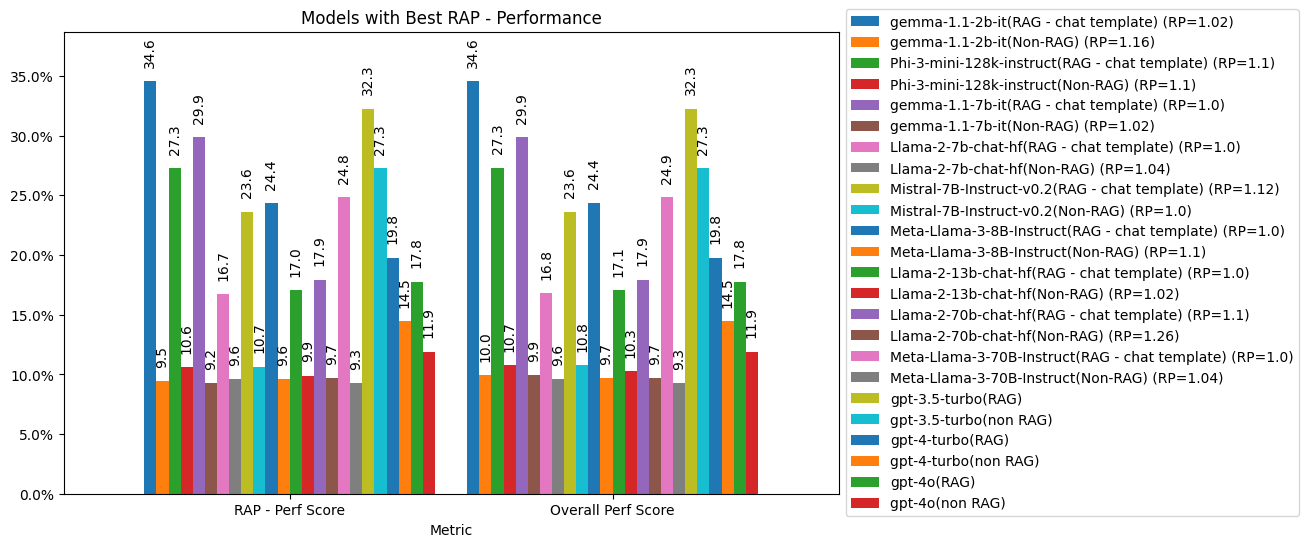

(Model               gemma-1.1-2b-it(RAG - chat template) (RP=1.02)  \
 Metric                                                               
 RAP - Perf Score                                          0.345557   
 Overall Perf Score                                        0.345557   
 
 Model               gemma-1.1-2b-it(Non-RAG) (RP=1.16)  \
 Metric                                                   
 RAP - Perf Score                              0.094683   
 Overall Perf Score                            0.099636   
 
 Model               Phi-3-mini-128k-instruct(RAG - chat template) (RP=1.1)  \
 Metric                                                                       
 RAP - Perf Score                                             0.272537        
 Overall Perf Score                                           0.273245        
 
 Model               Phi-3-mini-128k-instruct(Non-RAG) (RP=1.1)  \
 Metric                                                           
 RAP - Perf Score       

In [27]:
plot_best_performance_ms_macro(result, skip_generic_prompt=True, ref_result=ref_result)

model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non-RAG)
model: Llama-2-70b-chat-hf(RAG - chat template)
model: Llama-2-70b-chat-hf(Non-RAG)
model: Meta-Llama-3-70B-Instruct(RAG - chat template)
model: Meta-Llama-3-70B-Instruct(Non-RAG)
ref_result: {'gpt-3.5-turbo(RAG)': './data/results/gpt-3.5-turbo_mm.csv', 'gpt-3.5-turbo(non RAG)': './data/results/gpt-3.5-turbo_mm_non_rag.csv', 'gpt-4-turbo(RAG)': './data/results/gpt-4-turbo_mm.csv', 'gpt-4-turbo(non

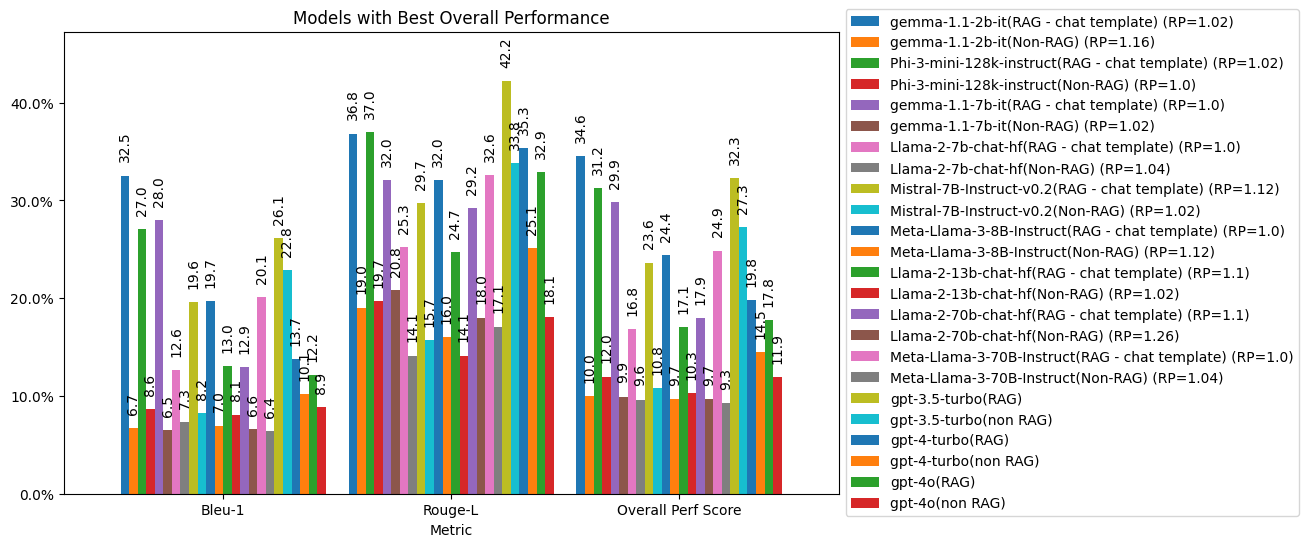

(Model               gemma-1.1-2b-it(RAG - chat template) (RP=1.02)  \
 Metric                                                               
 Bleu-1                                                    0.325423   
 Rouge-L                                                   0.368347   
 Overall Perf Score                                        0.345557   
 
 Model               gemma-1.1-2b-it(Non-RAG) (RP=1.16)  \
 Metric                                                   
 Bleu-1                                        0.067473   
 Rouge-L                                       0.190389   
 Overall Perf Score                            0.099636   
 
 Model               Phi-3-mini-128k-instruct(RAG - chat template) (RP=1.02)  \
 Metric                                                                        
 Bleu-1                                                       0.270291         
 Rouge-L                                                      0.370175         
 Overall Perf Score       

In [28]:
plot_best_performance_ms_macro(
    result,
    title="Models with Best Overall Performance",
    skip_generic_prompt=True,
    ref_result=ref_result,
    include_adjusted_performance=False,
)

model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non-RAG)
model: Llama-2-70b-chat-hf(RAG - chat template)
model: Llama-2-70b-chat-hf(Non-RAG)
model: Meta-Llama-3-70B-Instruct(RAG - chat template)
model: Meta-Llama-3-70B-Instruct(Non-RAG)
ref_result: {'gpt-3.5-turbo(RAG)': './data/results/gpt-3.5-turbo_mm.csv', 'gpt-3.5-turbo(non RAG)': './data/results/gpt-3.5-turbo_mm_non_rag.csv'}
max_value: 0.47254391477941504


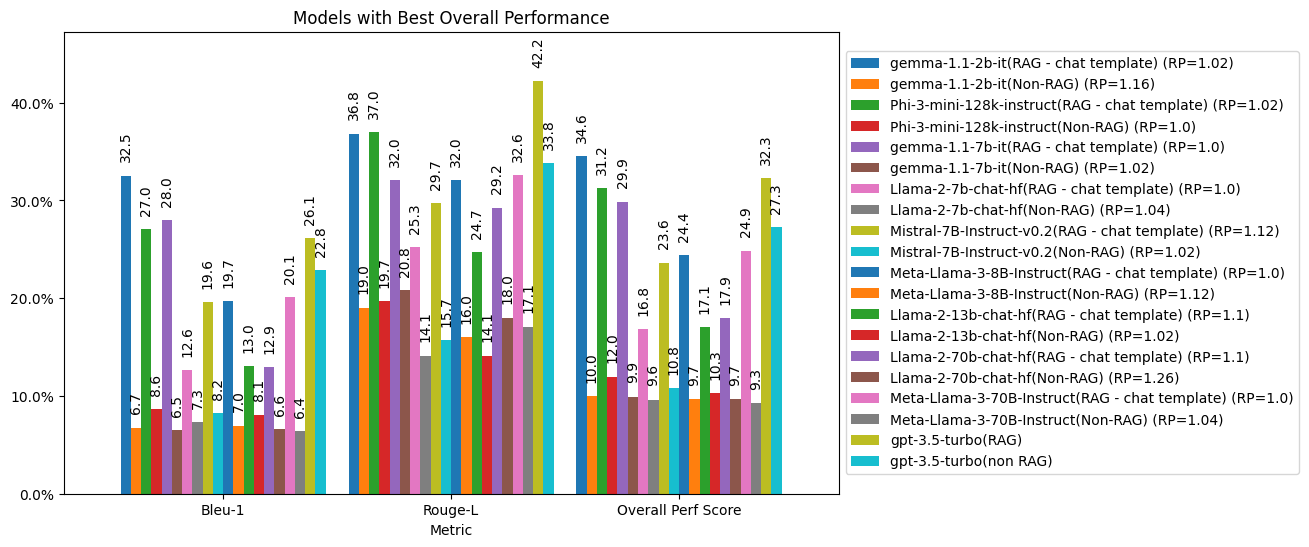

In [29]:
ref_result = {
    "gpt-3.5-turbo(RAG)": "./data/results/gpt-3.5-turbo_mm.csv",
    "gpt-3.5-turbo(non RAG)": "./data/results/gpt-3.5-turbo_mm_non_rag.csv",
}
df, best_mtr = plot_best_performance_ms_macro(
    result,
    title="Models with Best Overall Performance",
    skip_generic_prompt=True,
    include_adjusted_performance=False,
    ref_result=ref_result,
)

model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non-RAG)
model: Llama-2-70b-chat-hf(RAG - chat template)
model: Llama-2-70b-chat-hf(Non-RAG)
model: Meta-Llama-3-70B-Instruct(RAG - chat template)
model: Meta-Llama-3-70B-Instruct(Non-RAG)
ref_result: {'gpt-3.5-turbo(RAG)': './data/results/gpt-3.5-turbo_mm.csv', 'gpt-3.5-turbo(non RAG)': './data/results/gpt-3.5-turbo_mm_non_rag.csv'}
max_value: 0.38702373956782804


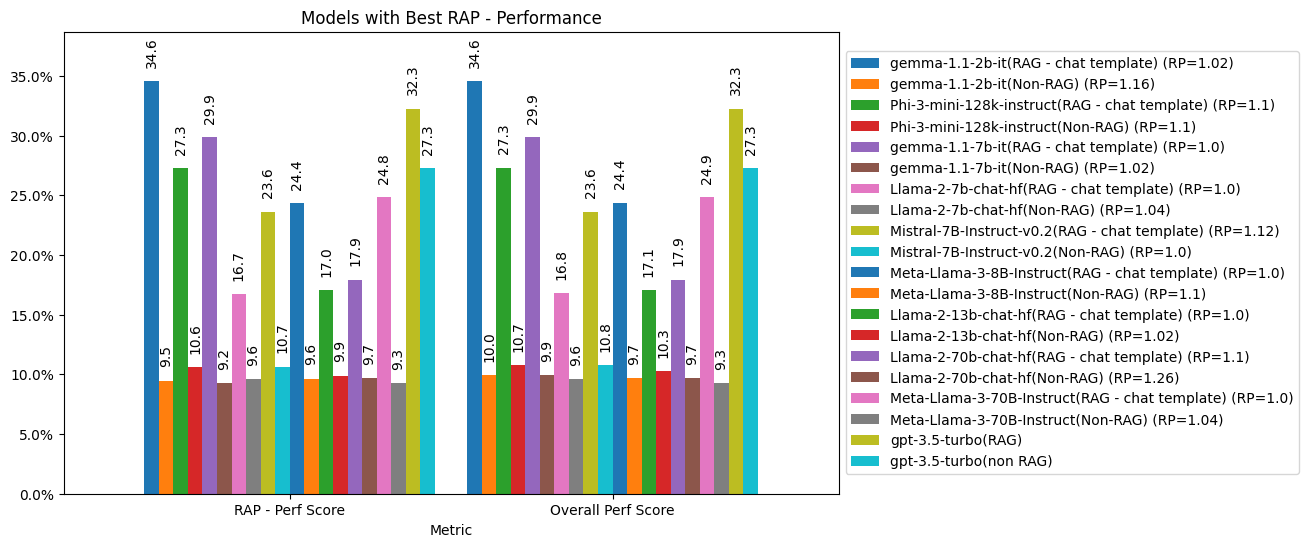

(Model               gemma-1.1-2b-it(RAG - chat template) (RP=1.02)  \
 Metric                                                               
 RAP - Perf Score                                          0.345557   
 Overall Perf Score                                        0.345557   
 
 Model               gemma-1.1-2b-it(Non-RAG) (RP=1.16)  \
 Metric                                                   
 RAP - Perf Score                              0.094683   
 Overall Perf Score                            0.099636   
 
 Model               Phi-3-mini-128k-instruct(RAG - chat template) (RP=1.1)  \
 Metric                                                                       
 RAP - Perf Score                                             0.272537        
 Overall Perf Score                                           0.273245        
 
 Model               Phi-3-mini-128k-instruct(Non-RAG) (RP=1.1)  \
 Metric                                                           
 RAP - Perf Score       

In [30]:
plot_best_performance_ms_macro(result, skip_generic_prompt=True, ref_result=ref_result)

model: gemma-1.1-2b-it(RAG - generic prompt)
model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)
model: gemma-1.1-7b-it(RAG - generic prompt)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)
model: Llama-2-7b-chat-hf(RAG - generic prompt)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Mistral-7B-Instruct-v0.2(RAG - generic prompt)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)
model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - generic prompt)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non-RAG)
model: Llama-2-70b-chat-hf(RAG - generic prompt)
mo

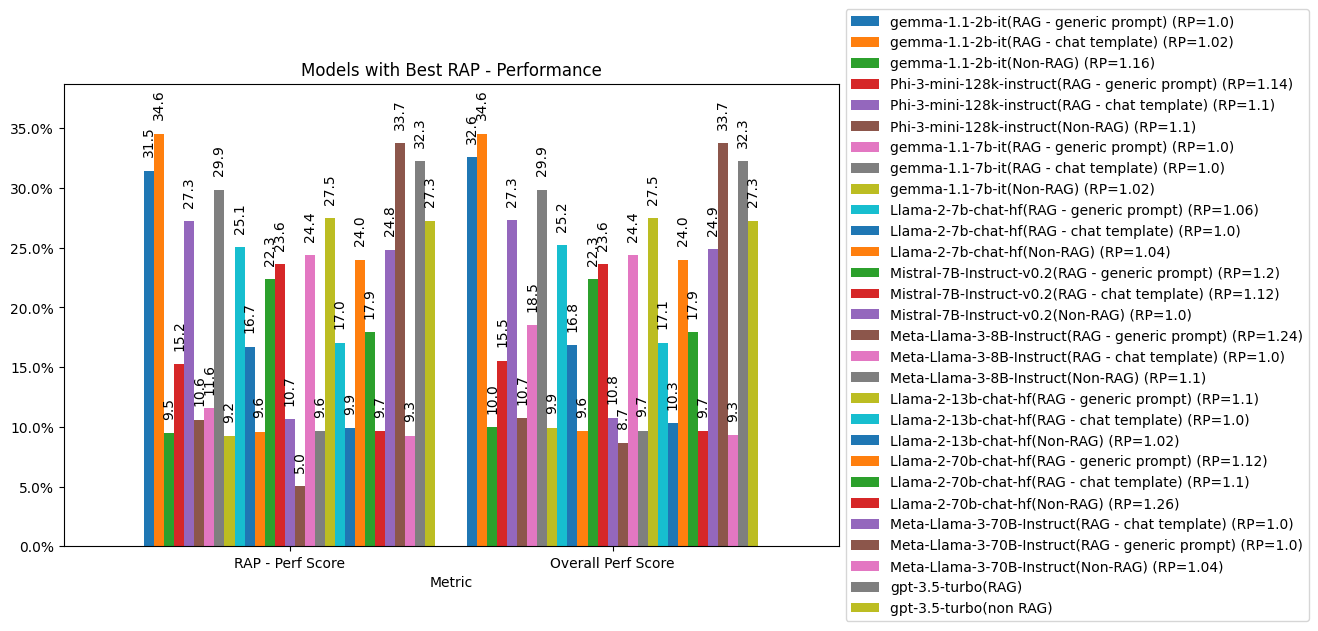

In [31]:
df, best_mtr = plot_best_performance_ms_macro(
    result,
    skip_generic_prompt=False,
    include_adjusted_performance=True,
    ref_result=ref_result,
)

In [32]:
df

Model               gemma-1.1-2b-it(RAG - generic prompt) (RP=1.0)  \
Metric                                                               
RAP - Perf Score                                          0.314729   
Overall Perf Score                                        0.326106   

Model               gemma-1.1-2b-it(RAG - chat template) (RP=1.02)  \
Metric                                                               
RAP - Perf Score                                          0.345557   
Overall Perf Score                                        0.345557   

Model               gemma-1.1-2b-it(Non-RAG) (RP=1.16)  \
Metric                                                   
RAP - Perf Score                              0.094683   
Overall Perf Score                            0.099636   

Model               Phi-3-mini-128k-instruct(RAG - generic prompt) (RP=1.14)  \
Metric                                                                         
RAP - Perf Score                                             0.152423          
Overall Perf Score                                           0.155400          

Model               Phi-3-mini-128k-instruct(RAG - chat template) (RP=1.1)  \
Metric                                                                       
RAP - Perf Score                                             0.272537        
Overall Perf Score                                           0.273245        

Model               Phi-3-mini-128k-instruct(Non-RAG) (RP=1.1)  \
Metric                                                           
RAP - Perf Score                                      0.105924   
Overall Perf Score                                    0.107470   

Model               gemma-1.1-7b-it(RAG - generic prompt) (RP=1.0)  \
Metric                                                               
RAP - Perf Score                                          0.115760   
Overall Perf Score                                        0.185149   

Model               gemma-1.1-7b-it(RAG - chat template) (RP=1.0)  \
Metric                                                              
RAP - Perf Score                                         0.298657   
Overall Perf Score                                       0.298657   

Model               gemma-1.1-7b-it(Non-RAG) (RP=1.02)  \
Metric                                                   
RAP - Perf Score                              0.092360   
Overall Perf Score                            0.099283   

Model               Llama-2-7b-chat-hf(RAG - generic prompt) (RP=1.06)  ...  \
Metric                                                                  ...   
RAP - Perf Score                                             0.250572   ...   
Overall Perf Score                                           0.252021   ...   

Model               Llama-2-13b-chat-hf(RAG - chat template) (RP=1.0)  \
Metric                                                                  
RAP - Perf Score                                             0.170497   
Overall Perf Score                                           0.170645   

Model               Llama-2-13b-chat-hf(Non-RAG) (RP=1.02)  \
Metric                                                       
RAP - Perf Score                                  0.099000   
Overall Perf Score                                0.102909   

Model               Llama-2-70b-chat-hf(RAG - generic prompt) (RP=1.12)  \
Metric                                                                    
RAP - Perf Score                                             0.239962     
Overall Perf Score                                           0.239962     

Model               Llama-2-70b-chat-hf(RAG - chat template) (RP=1.1)  \
Metric                                                                  
RAP - Perf Score                                             0.179357   
Overall Perf Score                                           0.179357   

Model               Llama-2-70b-chat-hf(Non-RAG) (RP=1.26)  \


In [33]:
df = df.T
df["MTR"] = best_mtr
df["RAP-Overall Perf Score"] = df.apply(
    lambda x: x["Overall Perf Score"] / math.log10(10 + x["MTR"]), axis=1
)
df

Metric                                              RAP - Perf Score  \
Model                                                                  
gemma-1.1-2b-it(RAG - generic prompt) (RP=1.0)              0.314729   
gemma-1.1-2b-it(RAG - chat template) (RP=1.02)              0.345557   
gemma-1.1-2b-it(Non-RAG) (RP=1.16)                          0.094683   
Phi-3-mini-128k-instruct(RAG - generic prompt) ...          0.152423   
Phi-3-mini-128k-instruct(RAG - chat template) (...          0.272537   
Phi-3-mini-128k-instruct(Non-RAG) (RP=1.1)                  0.105924   
gemma-1.1-7b-it(RAG - generic prompt) (RP=1.0)              0.115760   
gemma-1.1-7b-it(RAG - chat template) (RP=1.0)               0.298657   
gemma-1.1-7b-it(Non-RAG) (RP=1.02)                          0.092360   
Llama-2-7b-chat-hf(RAG - generic prompt) (RP=1.06)          0.250572   
Llama-2-7b-chat-hf(RAG - chat template) (RP=1.0)            0.167257   
Llama-2-7b-chat-hf(Non-RAG) (RP=1.04)                       0.095869   
Mistral-7B-Instruct-v0.2(RAG - generic prompt) ...          0.223447   
Mistral-7B-Instruct-v0.2(RAG - chat template) (...          0.236408   
Mistral-7B-Instruct-v0.2(Non-RAG) (RP=1.0)                  0.106551   
Meta-Llama-3-8B-Instruct(RAG - generic prompt) ...          0.050402   
Meta-Llama-3-8B-Instruct(RAG - chat template) (...          0.243584   
Meta-Llama-3-8B-Instruct(Non-RAG) (RP=1.1)                  0.096293   
Llama-2-13b-chat-hf(RAG - generic prompt) (RP=1.1)          0.274851   
Llama-2-13b-chat-hf(RAG - chat template) (RP=1.0)           0.170497   
Llama-2-13b-chat-hf(Non-RAG) (RP=1.02)                      0.099000   
Llama-2-70b-chat-hf(RAG - generic prompt) (RP=1...          0.239962   
Llama-2-70b-chat-hf(RAG - chat template) (RP=1.1)           0.179357   
Llama-2-70b-chat-hf(Non-RAG) (RP=1.26)                      0.096662   
Meta-Llama-3-70B-Instruct(RAG - chat template) ...          0.248362   
Meta-Llama-3-70B-Instruct(RAG - generic prompt)...          0.337407   
Meta-Llama-3-70B-Instruct(Non-RAG) (RP=1.04)                0.092727   
gpt-3.5-turbo(RAG)                                          0.322618   
gpt-3.5-turbo(non RAG)                                      0.272730   

Metric                                              Overall Perf Score  \
Model                                                                    
gemma-1.1-2b-it(RAG - generic prompt) (RP=1.0)                0.326106   
gemma-1.1-2b-it(RAG - chat template) (RP=1.02)                0.345557   
gemma-1.1-2b-it(Non-RAG) (RP=1.16)                            0.099636   
Phi-3-mini-128k-instruct(RAG - generic prompt) ...            0.155400   
Phi-3-mini-128k-instruct(RAG - chat template) (...            0.273245   
Phi-3-mini-128k-instruct(Non-RAG) (RP=1.1)                    0.107470   
gemma-1.1-7b-it(RAG - generic prompt) (RP=1.0)                0.185149   
gemma-1.1-7b-it(RAG - chat template) (RP=1.0)                 0.298657   
gemma-1.1-7b-it(Non-RAG) (RP=1.02)                            0.099283   
Llama-2-7b-chat-hf(RAG - generic prompt) (RP=1.06)            0.252021   
Llama-2-7b-chat-hf(RAG - chat template) (RP=1.0)              0.168324   
Llama-2-7b-chat-hf(Non-RAG) (RP=1.04)                         0.096225   
Mistral-7B-Instruct-v0.2(RAG - generic prompt) ...            0.223447   
Mistral-7B-Instruct-v0.2(RAG - chat template) (...            0.236408   
Mistral-7B-Instruct-v0.2(Non-RAG) (RP=1.0)                    0.107585   
Meta-Llama-3-8B-Instruct(RAG - generic prompt) ...            0.086695   
Meta-Llama-3-8B-Instruct(RAG - chat template) (...            0.243816   
Meta-Llama-3-8B-Instruct(Non-RAG) (RP=1.1)                    0.096940   
Llama-2-13b-chat-hf(RAG - generic prompt) (RP=1.1)            0.274851   
Llama-2-13b-chat-hf(RAG - chat template) (RP=1.0)             0.170645   
Llama-2-13b-chat-hf(Non-RAG) (RP=1.02)                        0.102909   
Llama-2-70b-chat-hf(RAG - generic prompt) (RP=1...            0.2

model: Phi-3-mini-128k-instruct(RAG - chat template)


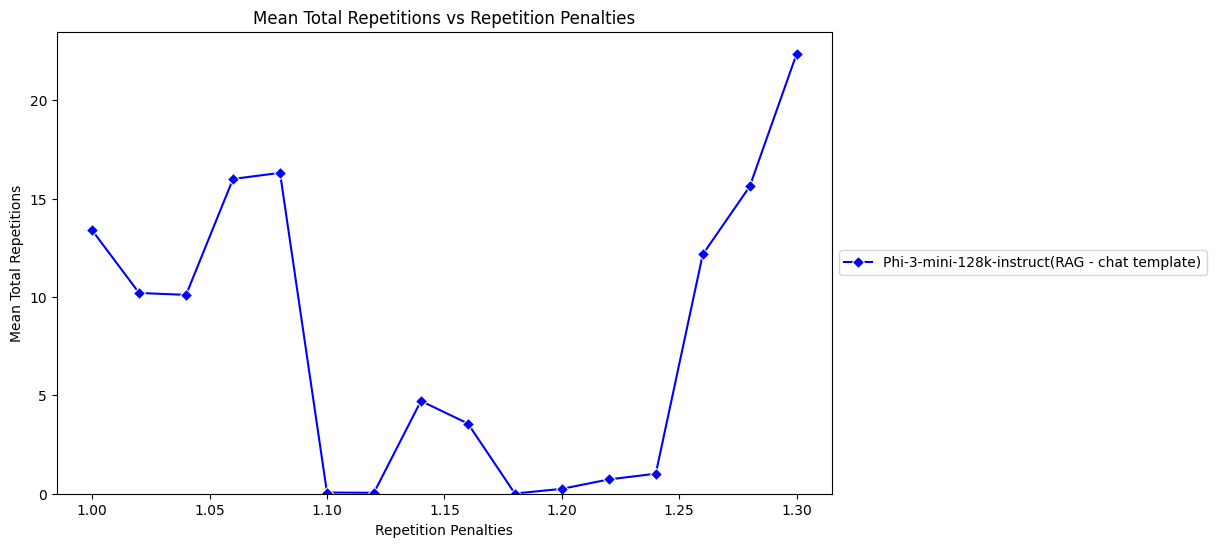

In [34]:
plot_repetition_factors_by_group(
    result, "Phi-3-mini-128k-instruct(RAG - chat template)"
)

model: Phi-3-mini-128k-instruct(Non-RAG)


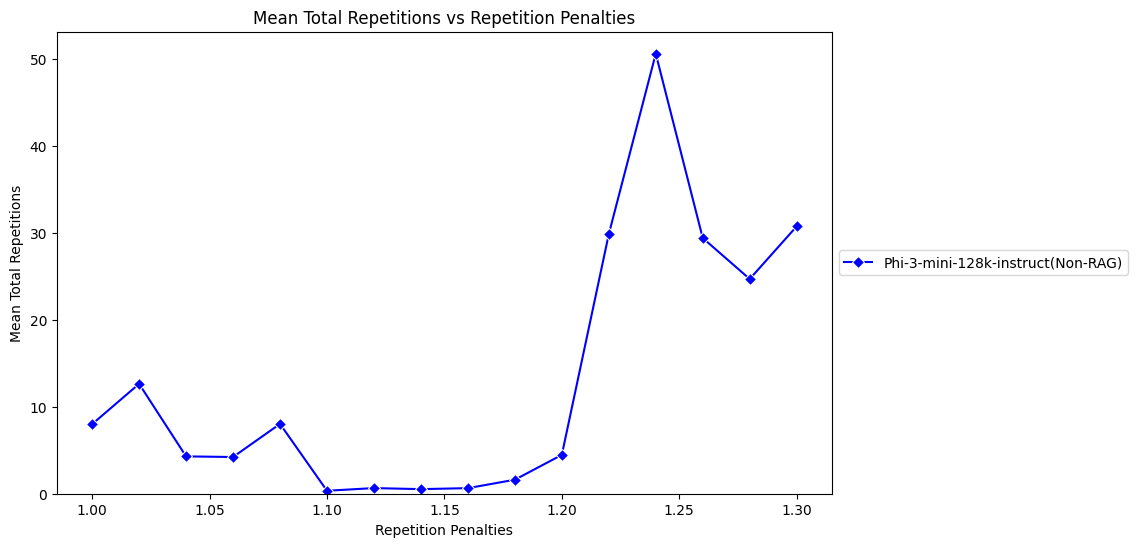

In [35]:
plot_repetition_factors_by_group(result, "Phi-3-mini-128k-instruct(Non-RAG)")

model: gemma-1.1-2b-it(RAG - generic prompt)
model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)


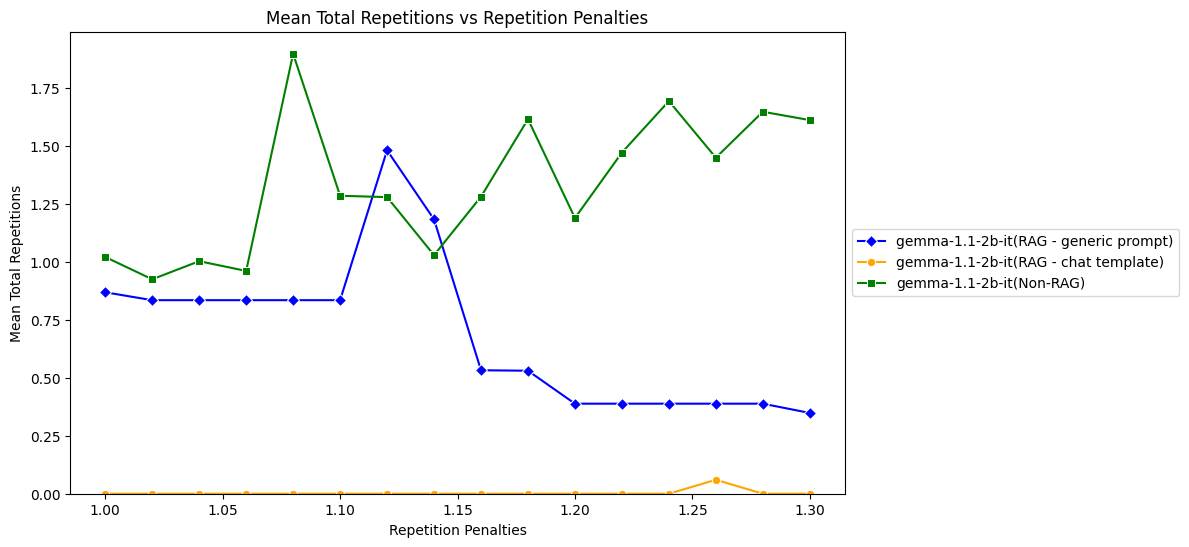

model: Phi-3-mini-128k-instruct(RAG - generic prompt)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)


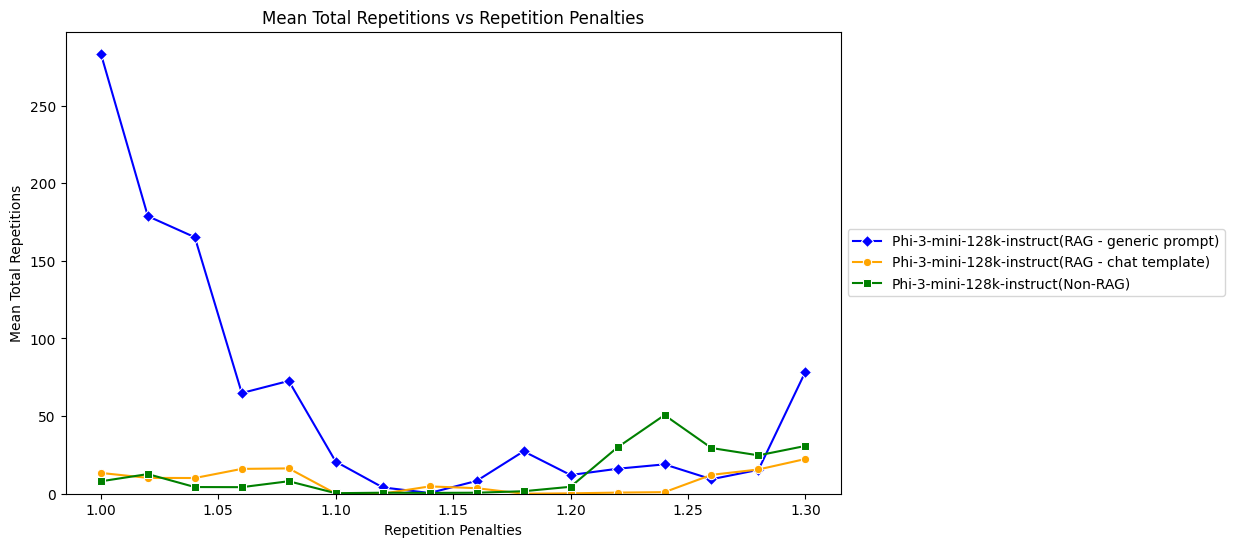

model: gemma-1.1-7b-it(RAG - generic prompt)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)


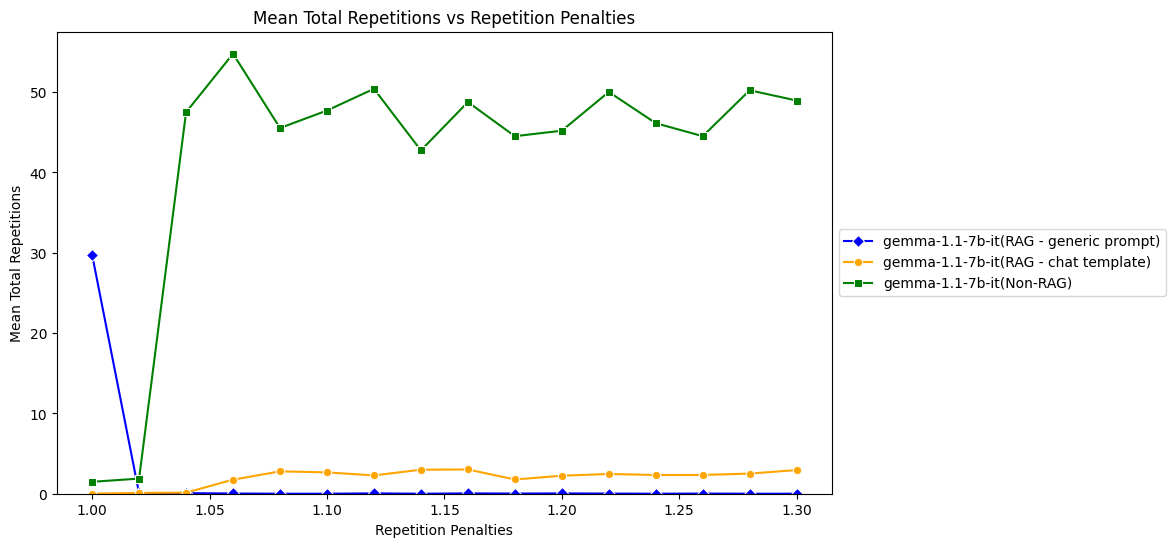

model: Llama-2-7b-chat-hf(RAG - generic prompt)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)


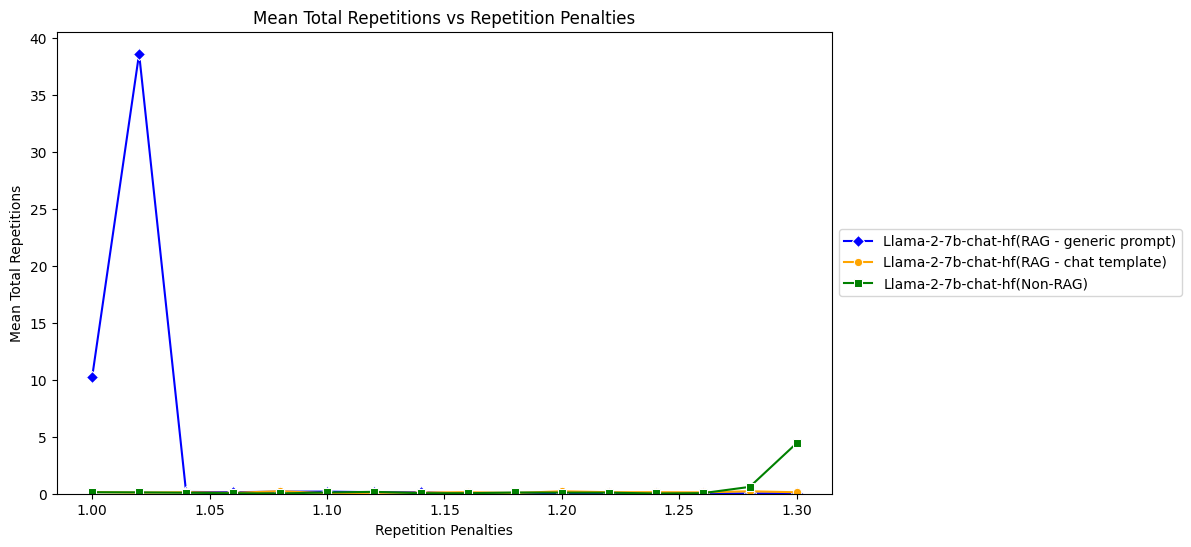

model: Mistral-7B-Instruct-v0.2(RAG - generic prompt)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)


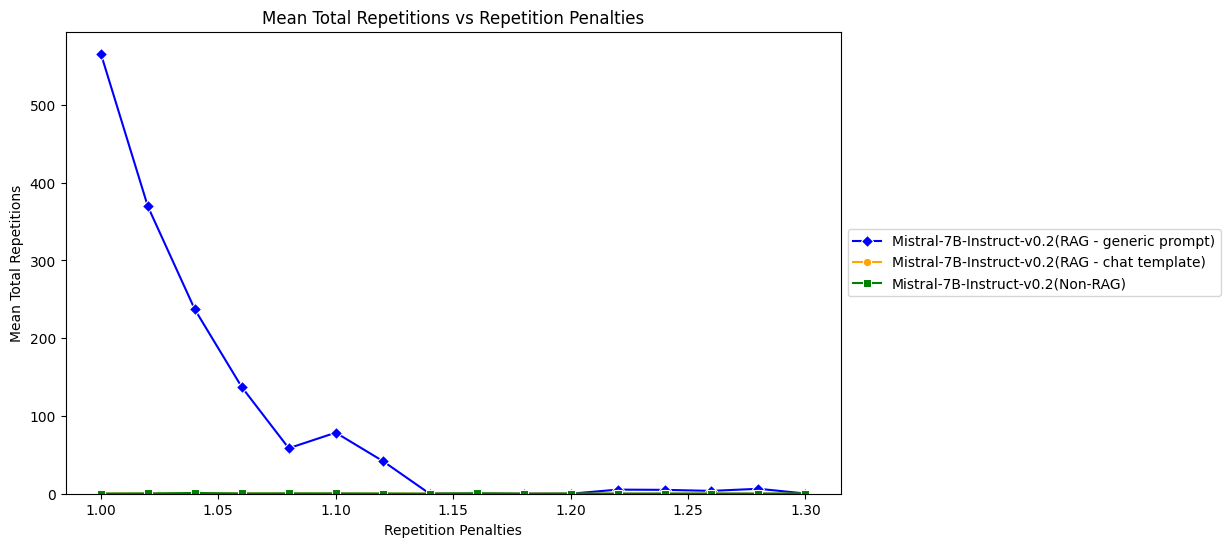

model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(Non-RAG)


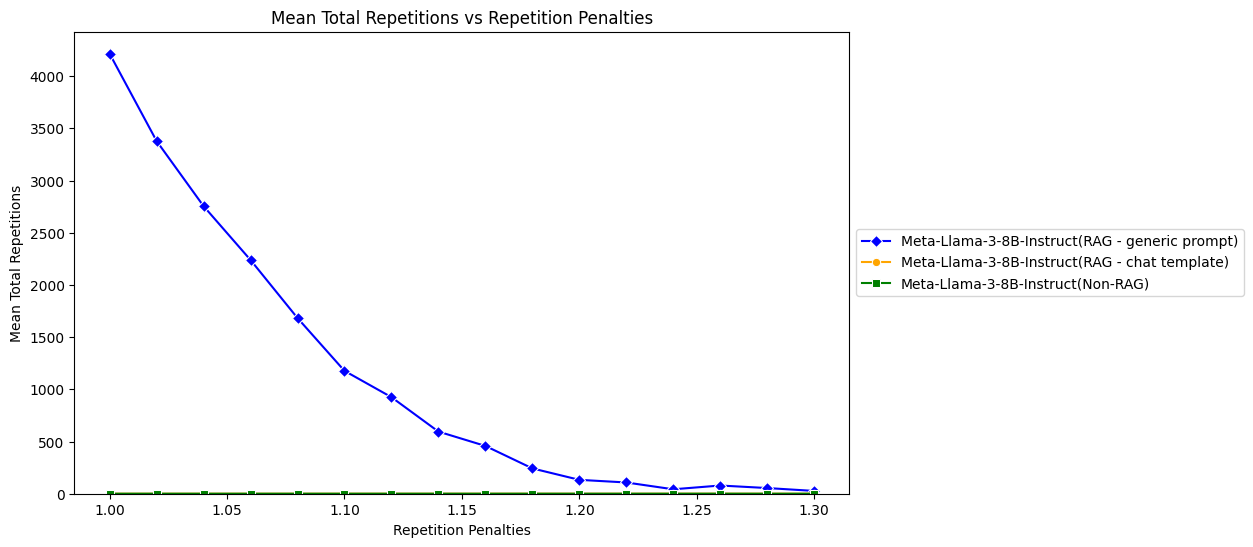

model: Llama-2-13b-chat-hf(RAG - generic prompt)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non-RAG)


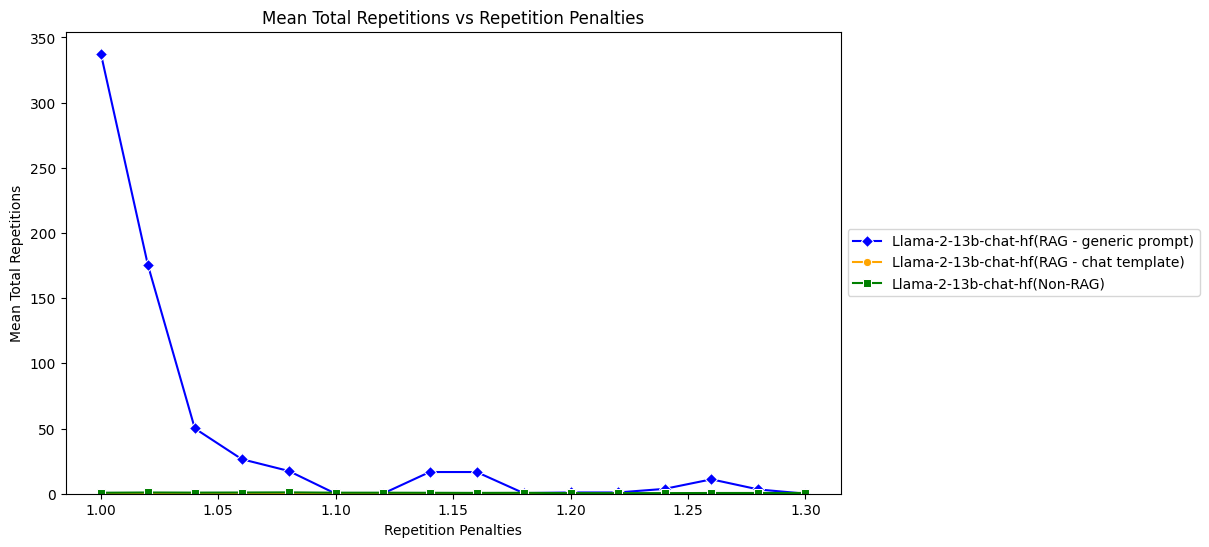

model: Llama-2-70b-chat-hf(RAG - generic prompt)
model: Llama-2-70b-chat-hf(RAG - chat template)
model: Llama-2-70b-chat-hf(Non-RAG)


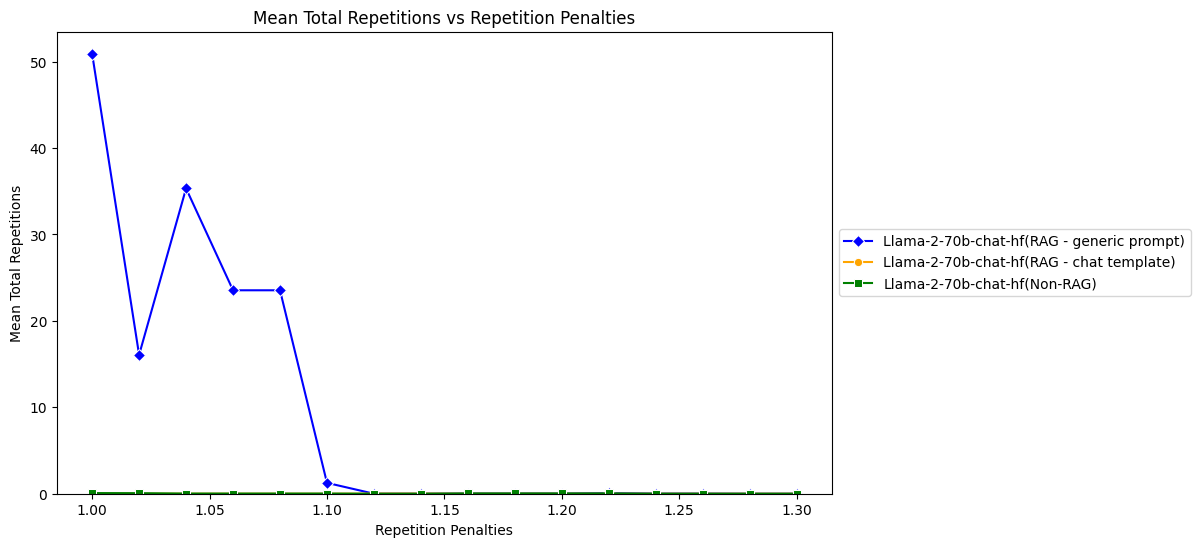

model: Meta-Llama-3-70B-Instruct(RAG - chat template)
model: Meta-Llama-3-70B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-70B-Instruct(Non-RAG)


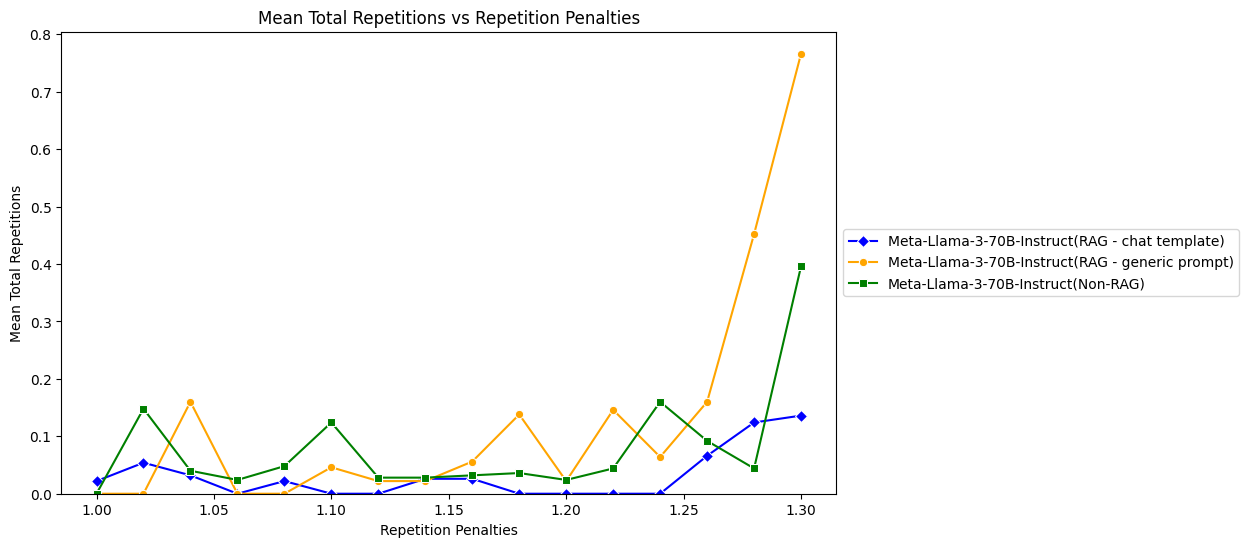

In [36]:
for model_prefix in all_open_source_models:
    plot_repetition_factors_by_group(result, model_prefix)